In [1]:
import time, os, json
import numpy as np
import matplotlib.pyplot as plt

from cs231n.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
%load_ext autoreload
%autoreload 2

import pickle
from tqdm import tqdm

from EKFNet import EKFNet_layers 
from EKFNet import EKFNet 
from EKFNet import EKF_solver
from EKFNet import config

from EKFNet import uncertaintyNet


In [2]:
#training_file_name = "/media/liangxu/ArmyData/nuscenes/Tracking_result/tracking_tmp/training_data_moving"
correcte_measurement_file_name = "/media/liangxu/ArmyData/nuscenes/Tracking_result/tracking_tmp/training_data_moving_heading_corrected"
GT_data_file_name = "/media/liangxu/ArmyData/nuscenes/Tracking_result/tracking_tmp/training_data_moving_GT"

training_data = pickle.load(open(correcte_measurement_file_name , 'rb'))
GT_data       = pickle.load(open(GT_data_file_name , 'rb'))

In [3]:
print("Total Length of the data ", len(training_data), len(GT_data))

Total Length of the data  934 934


In [4]:
training_detection    = training_data[0:600]
validation_detection  = training_data[600:800]
test_detection        = training_data[800:934]

training_gt    = GT_data[0:600]
validation_gt  = GT_data[600:800]
test_gt        = GT_data[800:934]

training_data = {
    "data" : training_detection,
    "gt"   : training_gt
}

validation_data = {
    "data" : validation_detection,
    "gt"   : validation_gt
}

test_data = {
    "data" : test_detection,
    "gt"   : test_gt
}

Length of the filter states 40
Length of the detection  40


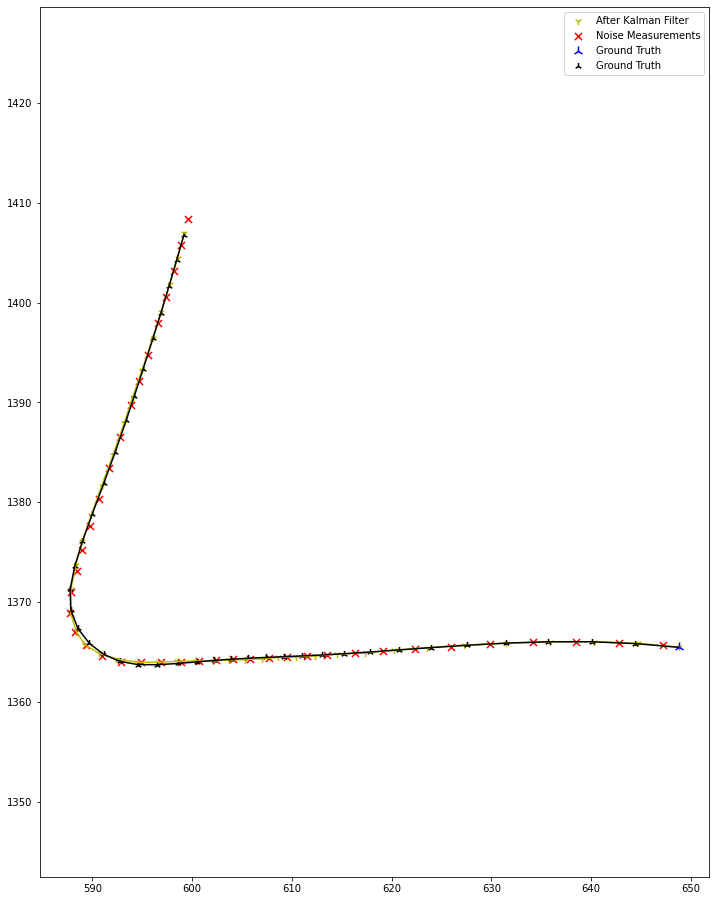

dR is 
 [[0.02 0.00 0.02 0.00 0.01]
 [0.00 0.01 -0.01 -0.00 -0.01]
 [-0.03 -0.02 2.21 -0.02 -0.02]
 [0.00 -0.00 -0.01 21.98 -0.42]
 [0.01 -0.01 -0.00 -0.40 49.14]]
dQ_acc is 
 [[-0.01 -0.00]
 [-0.01 0.00]]
dQ_other is 
 [[0.03 0.00 0.00 -0.01 0.00 -0.00 -0.01]
 [0.01 0.02 -0.00 -0.00 0.00 -0.00 -0.00]
 [-0.04 -0.01 -0.02 0.00 -0.02 -0.00 -0.00]
 [0.06 -0.03 0.01 -0.02 -0.01 0.00 0.00]
 [0.05 0.00 -0.02 -0.01 0.03 0.00 0.01]
 [-0.00 0.00 -0.00 0.00 -0.00 -0.10 0.00]
 [-0.00 0.00 -0.00 0.00 -0.00 0.00 -0.10]]
RMS_state  :  0.8963852514591344
RMS_meas  :  0.7343200966375654
logLikelihood_state  :  6.3804647973485755
logLikelihood_meas  :  11.0840729952586


In [5]:
uncertainty_net = uncertaintyNet.uncertaintyNet()

EKF_filter = EKFNet.EKFNet(network = uncertainty_net)
# TODO: working on the loaddata
testing_index = 100

EKF_filter.load_data_set(datasets = training_data['data'][testing_index], 
                         gt =  training_data['gt'][testing_index] )

EKF_filter.run_EKF_NET_forward()
EKF_filter.plot_overview()

EKF_filter.generate_grad()

# TODO: working on the total loss
loss = EKF_filter.totalLoss()
dR, dQ_acc, dQ_other = EKF_filter.run_backward()

print("dR is \n", dR)
print("dQ_acc is \n", dQ_acc)
print("dQ_other is \n", dQ_other)

for k, v in loss.items():
    print(k, " : " ,v)

# TODO: program the generating the grad
#EKF_filter.generate_fake_grad()

# TODO: working on the backward part
#EKF_filter.run_backward()

#EKF_filter.generate_grad()

In [5]:
uncertainty_net = uncertaintyNet.uncertaintyNet()
solver = EKF_solver.EKFSolver(
    data        = training_data,
    val_data    = validation_data, 
    test_data   = test_data,
    network     = uncertaintyNet.uncertaintyNet(),
    update_rule = config.config["update_rule"],
    lr_decay    = config.config["lr_decay"],
    batch_size  = config.config["batch_size"],
    num_epochs  = config.config["num_epochs"], 
    print_every = config.config["print_every"], 
    verbose     = config.config["verbose"],
    lr          = config.config["lr"]
)
#solver.draw()
solver.training()

  0%|          | 1/600 [00:00<01:05,  9.16it/s]

Building the new EKF solver
Begin training, initial setup Finish total training  600


  0%|          | 1/200 [00:00<00:21,  9.08it/s]

600
[[-0.49 -0.65 -4.64 -1.43 -1.57]]


  0%|          | 2/600 [00:00<00:54, 10.98it/s]

(Iteration {1} / {600}) 
 Post RMS: 0.243400 , 
 Meas RMS: 0.250526 ,
 Post Like: -0.428920, 
 Meas Like 3.417863
(Validation) 
 Post RMS: 0.212844 , 
 Meas RMS: 0.208319 ,
 Post Like: -0.500836, 
 Meas Like 3.368380


  1%|          | 2/200 [00:00<00:14, 14.12it/s]

600
[[-0.49 -0.64 -4.48 -1.42 -1.56]]


  0%|          | 2/600 [00:00<00:54, 10.94it/s]

(Iteration {2} / {600}) 
 Post RMS: 0.243935 , 
 Meas RMS: 0.250738 ,
 Post Like: -0.403726, 
 Meas Like 3.439894
(Validation) 
 Post RMS: 0.213282 , 
 Meas RMS: 0.208578 ,
 Post Like: -0.476061, 
 Meas Like 3.389814


  1%|          | 2/200 [00:00<00:14, 14.01it/s]

600
[[-0.48 -0.64 -4.33 -1.41 -1.56]]


  0%|          | 2/600 [00:00<00:54, 11.01it/s]

(Iteration {3} / {600}) 
 Post RMS: 0.244468 , 
 Meas RMS: 0.250960 ,
 Post Like: -0.379310, 
 Meas Like 3.461359
(Validation) 
 Post RMS: 0.213717 , 
 Meas RMS: 0.208842 ,
 Post Like: -0.452023, 
 Meas Like 3.410709


  1%|          | 2/200 [00:00<00:14, 13.95it/s]

600
[[-0.48 -0.64 -4.19 -1.41 -1.55]]


  0%|          | 2/600 [00:00<00:54, 11.02it/s]

(Iteration {4} / {600}) 
 Post RMS: 0.244996 , 
 Meas RMS: 0.251191 ,
 Post Like: -0.355625, 
 Meas Like 3.482285
(Validation) 
 Post RMS: 0.214148 , 
 Meas RMS: 0.209110 ,
 Post Like: -0.428677, 
 Meas Like 3.431091


  1%|          | 2/200 [00:00<00:14, 14.07it/s]

600
[[-0.48 -0.64 -4.06 -1.40 -1.54]]


  0%|          | 2/600 [00:00<00:54, 10.94it/s]

(Iteration {5} / {600}) 
 Post RMS: 0.245522 , 
 Meas RMS: 0.251430 ,
 Post Like: -0.332628, 
 Meas Like 3.502697
(Validation) 
 Post RMS: 0.214576 , 
 Meas RMS: 0.209381 ,
 Post Like: -0.405984, 
 Meas Like 3.450982


  1%|          | 2/200 [00:00<00:14, 13.79it/s]

600
[[-0.48 -0.64 -3.94 -1.39 -1.54]]


  0%|          | 2/600 [00:00<00:54, 10.97it/s]

(Iteration {6} / {600}) 
 Post RMS: 0.246044 , 
 Meas RMS: 0.251678 ,
 Post Like: -0.310278, 
 Meas Like 3.522616
(Validation) 
 Post RMS: 0.215002 , 
 Meas RMS: 0.209655 ,
 Post Like: -0.383902, 
 Meas Like 3.470408


  1%|          | 2/200 [00:00<00:15, 12.60it/s]

600
[[-0.48 -0.64 -3.83 -1.38 -1.53]]


  0%|          | 2/600 [00:00<00:54, 10.94it/s]

(Iteration {7} / {600}) 
 Post RMS: 0.246563 , 
 Meas RMS: 0.251933 ,
 Post Like: -0.288539, 
 Meas Like 3.542065
(Validation) 
 Post RMS: 0.215424 , 
 Meas RMS: 0.209932 ,
 Post Like: -0.362401, 
 Meas Like 3.489390


  1%|          | 2/200 [00:00<00:15, 12.63it/s]

600
[[-0.48 -0.63 -3.72 -1.38 -1.53]]


  0%|          | 2/600 [00:00<00:55, 10.86it/s]

(Iteration {8} / {600}) 
 Post RMS: 0.247079 , 
 Meas RMS: 0.252195 ,
 Post Like: -0.267375, 
 Meas Like 3.561066
(Validation) 
 Post RMS: 0.215843 , 
 Meas RMS: 0.210212 ,
 Post Like: -0.341449, 
 Meas Like 3.507944


  0%|          | 1/200 [00:00<00:21,  9.10it/s]

600
[[-0.48 -0.63 -3.62 -1.37 -1.52]]


  0%|          | 2/600 [00:00<00:53, 11.09it/s]

(Iteration {9} / {600}) 
 Post RMS: 0.247591 , 
 Meas RMS: 0.252462 ,
 Post Like: -0.246755, 
 Meas Like 3.579636
(Validation) 
 Post RMS: 0.216259 , 
 Meas RMS: 0.210493 ,
 Post Like: -0.321015, 
 Meas Like 3.526091


  1%|          | 2/200 [00:00<00:14, 14.03it/s]

600
[[-0.48 -0.63 -3.52 -1.36 -1.51]]


  0%|          | 2/600 [00:00<00:55, 10.73it/s]

(Iteration {10} / {600}) 
 Post RMS: 0.248100 , 
 Meas RMS: 0.252736 ,
 Post Like: -0.226649, 
 Meas Like 3.597797
(Validation) 
 Post RMS: 0.216673 , 
 Meas RMS: 0.210777 ,
 Post Like: -0.301070, 
 Meas Like 3.543849


  1%|          | 2/200 [00:00<00:16, 11.96it/s]

600
[[-0.48 -0.63 -3.43 -1.36 -1.51]]


  0%|          | 2/600 [00:00<00:54, 11.04it/s]

(Iteration {11} / {600}) 
 Post RMS: 0.248606 , 
 Meas RMS: 0.253014 ,
 Post Like: -0.207027, 
 Meas Like 3.615566
(Validation) 
 Post RMS: 0.217084 , 
 Meas RMS: 0.211062 ,
 Post Like: -0.281588, 
 Meas Like 3.561234


  1%|          | 2/200 [00:00<00:14, 13.95it/s]

600
[[-0.48 -0.63 -3.35 -1.35 -1.50]]


  0%|          | 2/600 [00:00<00:54, 11.06it/s]

(Iteration {12} / {600}) 
 Post RMS: 0.249109 , 
 Meas RMS: 0.253297 ,
 Post Like: -0.187861, 
 Meas Like 3.632962
(Validation) 
 Post RMS: 0.217492 , 
 Meas RMS: 0.211349 ,
 Post Like: -0.262542, 
 Meas Like 3.578265


  1%|          | 2/200 [00:00<00:14, 14.03it/s]

600
[[-0.47 -0.63 -3.27 -1.34 -1.49]]


  0%|          | 2/600 [00:00<00:54, 10.93it/s]

(Iteration {13} / {600}) 
 Post RMS: 0.249609 , 
 Meas RMS: 0.253584 ,
 Post Like: -0.169127, 
 Meas Like 3.650002
(Validation) 
 Post RMS: 0.217899 , 
 Meas RMS: 0.211638 ,
 Post Like: -0.243907, 
 Meas Like 3.594960


  1%|          | 2/200 [00:00<00:14, 14.06it/s]

600
[[-0.47 -0.62 -3.19 -1.34 -1.49]]


  0%|          | 2/600 [00:00<00:54, 11.06it/s]

(Iteration {14} / {600}) 
 Post RMS: 0.250107 , 
 Meas RMS: 0.253876 ,
 Post Like: -0.150798, 
 Meas Like 3.666704
(Validation) 
 Post RMS: 0.218303 , 
 Meas RMS: 0.211928 ,
 Post Like: -0.225662, 
 Meas Like 3.611335


  1%|          | 2/200 [00:00<00:14, 13.93it/s]

600
[[-0.47 -0.62 -3.12 -1.33 -1.48]]


  0%|          | 2/600 [00:00<00:55, 10.83it/s]

(Iteration {15} / {600}) 
 Post RMS: 0.250602 , 
 Meas RMS: 0.254171 ,
 Post Like: -0.132851, 
 Meas Like 3.683084
(Validation) 
 Post RMS: 0.218706 , 
 Meas RMS: 0.212220 ,
 Post Like: -0.207783, 
 Meas Like 3.627404


  1%|          | 2/200 [00:00<00:15, 12.39it/s]

600
[[-0.47 -0.62 -3.05 -1.32 -1.48]]


  0%|          | 2/600 [00:00<00:55, 10.86it/s]

(Iteration {16} / {600}) 
 Post RMS: 0.251094 , 
 Meas RMS: 0.254470 ,
 Post Like: -0.115262, 
 Meas Like 3.699159
(Validation) 
 Post RMS: 0.219107 , 
 Meas RMS: 0.212513 ,
 Post Like: -0.190248, 
 Meas Like 3.643185


  1%|          | 2/200 [00:00<00:14, 13.78it/s]

600
[[-0.47 -0.62 -2.98 -1.32 -1.47]]


  0%|          | 2/600 [00:00<00:54, 11.06it/s]

(Iteration {17} / {600}) 
 Post RMS: 0.251584 , 
 Meas RMS: 0.254772 ,
 Post Like: -0.098010, 
 Meas Like 3.714945
(Validation) 
 Post RMS: 0.219506 , 
 Meas RMS: 0.212808 ,
 Post Like: -0.173037, 
 Meas Like 3.658694


  1%|          | 2/200 [00:00<00:15, 13.07it/s]

600
[[-0.47 -0.62 -2.92 -1.31 -1.47]]


  0%|          | 2/600 [00:00<00:54, 10.91it/s]

(Iteration {18} / {600}) 
 Post RMS: 0.252073 , 
 Meas RMS: 0.255078 ,
 Post Like: -0.081073, 
 Meas Like 3.730459
(Validation) 
 Post RMS: 0.219904 , 
 Meas RMS: 0.213104 ,
 Post Like: -0.156128, 
 Meas Like 3.673947


  1%|          | 2/200 [00:00<00:14, 13.98it/s]

600
[[-0.47 -0.62 -2.86 -1.30 -1.46]]


  0%|          | 2/600 [00:00<00:54, 10.90it/s]

(Iteration {19} / {600}) 
 Post RMS: 0.252559 , 
 Meas RMS: 0.255387 ,
 Post Like: -0.064431, 
 Meas Like 3.745716
(Validation) 
 Post RMS: 0.220301 , 
 Meas RMS: 0.213401 ,
 Post Like: -0.139505, 
 Meas Like 3.688955


  1%|          | 2/200 [00:00<00:14, 14.11it/s]

600
[[-0.47 -0.61 -2.80 -1.30 -1.45]]


  0%|          | 2/600 [00:00<00:54, 11.05it/s]

(Iteration {20} / {600}) 
 Post RMS: 0.253044 , 
 Meas RMS: 0.255700 ,
 Post Like: -0.048067, 
 Meas Like 3.760728
(Validation) 
 Post RMS: 0.220698 , 
 Meas RMS: 0.213700 ,
 Post Like: -0.123147, 
 Meas Like 3.703733


  1%|          | 2/200 [00:00<00:14, 13.85it/s]

600
[[-0.47 -0.61 -2.75 -1.29 -1.45]]


  0%|          | 2/600 [00:00<00:55, 10.86it/s]

(Iteration {21} / {600}) 
 Post RMS: 0.253527 , 
 Meas RMS: 0.256015 ,
 Post Like: -0.031964, 
 Meas Like 3.775510
(Validation) 
 Post RMS: 0.221093 , 
 Meas RMS: 0.214000 ,
 Post Like: -0.107040, 
 Meas Like 3.718295


  1%|          | 2/200 [00:00<00:14, 14.00it/s]

600
[[-0.47 -0.61 -2.70 -1.29 -1.44]]


  0%|          | 2/600 [00:00<00:56, 10.68it/s]

(Iteration {22} / {600}) 
 Post RMS: 0.254009 , 
 Meas RMS: 0.256333 ,
 Post Like: -0.016106, 
 Meas Like 3.790073
(Validation) 
 Post RMS: 0.221488 , 
 Meas RMS: 0.214302 ,
 Post Like: -0.091168, 
 Meas Like 3.732651


  1%|          | 2/200 [00:00<00:14, 13.92it/s]

600
[[-0.46 -0.61 -2.65 -1.28 -1.44]]


  0%|          | 2/600 [00:00<00:55, 10.81it/s]

(Iteration {23} / {600}) 
 Post RMS: 0.254490 , 
 Meas RMS: 0.256654 ,
 Post Like: -0.000478, 
 Meas Like 3.804429
(Validation) 
 Post RMS: 0.221883 , 
 Meas RMS: 0.214605 ,
 Post Like: -0.075519, 
 Meas Like 3.746813


  1%|          | 2/200 [00:00<00:16, 12.28it/s]

600
[[-0.46 -0.61 -2.60 -1.27 -1.43]]


  0%|          | 2/600 [00:00<00:54, 10.94it/s]

(Iteration {24} / {600}) 
 Post RMS: 0.254971 , 
 Meas RMS: 0.256977 ,
 Post Like: 0.014933, 
 Meas Like 3.818588
(Validation) 
 Post RMS: 0.222277 , 
 Meas RMS: 0.214909 ,
 Post Like: -0.060079, 
 Meas Like 3.760791


  1%|          | 2/200 [00:00<00:15, 12.71it/s]

600
[[-0.46 -0.61 -2.55 -1.27 -1.42]]


  0%|          | 2/600 [00:00<00:54, 10.89it/s]

(Iteration {25} / {600}) 
 Post RMS: 0.255450 , 
 Meas RMS: 0.257303 ,
 Post Like: 0.030139, 
 Meas Like 3.832560
(Validation) 
 Post RMS: 0.222671 , 
 Meas RMS: 0.215216 ,
 Post Like: -0.044837, 
 Meas Like 3.774592


  1%|          | 2/200 [00:00<00:14, 13.96it/s]

600
[[-0.46 -0.60 -2.51 -1.26 -1.42]]


  0%|          | 2/600 [00:00<00:54, 10.93it/s]

(Iteration {26} / {600}) 
 Post RMS: 0.255928 , 
 Meas RMS: 0.257632 ,
 Post Like: 0.045151, 
 Meas Like 3.846355
(Validation) 
 Post RMS: 0.223065 , 
 Meas RMS: 0.215523 ,
 Post Like: -0.029782, 
 Meas Like 3.788226


  0%|          | 1/200 [00:00<00:22,  9.04it/s]

600
[[-0.46 -0.60 -2.47 -1.25 -1.41]]


  0%|          | 2/600 [00:00<00:54, 11.06it/s]

(Iteration {27} / {600}) 
 Post RMS: 0.256406 , 
 Meas RMS: 0.257963 ,
 Post Like: 0.059980, 
 Meas Like 3.859981
(Validation) 
 Post RMS: 0.223459 , 
 Meas RMS: 0.215832 ,
 Post Like: -0.014905, 
 Meas Like 3.801701


  1%|          | 2/200 [00:00<00:14, 13.56it/s]

600
[[-0.46 -0.60 -2.42 -1.25 -1.41]]


  0%|          | 2/600 [00:00<00:54, 11.02it/s]

(Iteration {28} / {600}) 
 Post RMS: 0.256883 , 
 Meas RMS: 0.258296 ,
 Post Like: 0.074636, 
 Meas Like 3.873446
(Validation) 
 Post RMS: 0.223853 , 
 Meas RMS: 0.216143 ,
 Post Like: -0.000197, 
 Meas Like 3.815023


  1%|          | 2/200 [00:00<00:14, 13.81it/s]

600
[[-0.46 -0.60 -2.39 -1.24 -1.40]]


  0%|          | 2/600 [00:00<00:55, 10.81it/s]

(Iteration {29} / {600}) 
 Post RMS: 0.257360 , 
 Meas RMS: 0.258632 ,
 Post Like: 0.089127, 
 Meas Like 3.886757
(Validation) 
 Post RMS: 0.224248 , 
 Meas RMS: 0.216455 ,
 Post Like: 0.014350, 
 Meas Like 3.828200


  1%|          | 2/200 [00:00<00:14, 14.02it/s]

600
[[-0.46 -0.60 -2.35 -1.24 -1.40]]


  0%|          | 2/600 [00:00<00:55, 10.82it/s]

(Iteration {30} / {600}) 
 Post RMS: 0.257836 , 
 Meas RMS: 0.258970 ,
 Post Like: 0.103463, 
 Meas Like 3.899923
(Validation) 
 Post RMS: 0.224643 , 
 Meas RMS: 0.216769 ,
 Post Like: 0.028745, 
 Meas Like 3.841239


  1%|          | 2/200 [00:00<00:15, 12.39it/s]

600
[[-0.46 -0.60 -2.31 -1.23 -1.39]]


  0%|          | 2/600 [00:00<00:54, 10.95it/s]

(Iteration {31} / {600}) 
 Post RMS: 0.258312 , 
 Meas RMS: 0.259311 ,
 Post Like: 0.117650, 
 Meas Like 3.912949
(Validation) 
 Post RMS: 0.225038 , 
 Meas RMS: 0.217084 ,
 Post Like: 0.042995, 
 Meas Like 3.854145


  1%|          | 2/200 [00:00<00:14, 13.27it/s]

600
[[-0.46 -0.59 -2.27 -1.23 -1.38]]


  0%|          | 2/600 [00:00<00:55, 10.86it/s]

(Iteration {32} / {600}) 
 Post RMS: 0.258788 , 
 Meas RMS: 0.259653 ,
 Post Like: 0.131696, 
 Meas Like 3.925841
(Validation) 
 Post RMS: 0.225434 , 
 Meas RMS: 0.217401 ,
 Post Like: 0.057106, 
 Meas Like 3.866923


  1%|          | 2/200 [00:00<00:14, 13.93it/s]

600
[[-0.46 -0.59 -2.24 -1.22 -1.38]]


  0%|          | 2/600 [00:00<00:53, 11.08it/s]

(Iteration {33} / {600}) 
 Post RMS: 0.259263 , 
 Meas RMS: 0.259998 ,
 Post Like: 0.145610, 
 Meas Like 3.938606
(Validation) 
 Post RMS: 0.225830 , 
 Meas RMS: 0.217719 ,
 Post Like: 0.071085, 
 Meas Like 3.879580


  1%|          | 2/200 [00:00<00:14, 13.86it/s]

600
[[-0.45 -0.59 -2.21 -1.21 -1.37]]


  0%|          | 2/600 [00:00<00:54, 11.07it/s]

(Iteration {34} / {600}) 
 Post RMS: 0.259739 , 
 Meas RMS: 0.260345 ,
 Post Like: 0.159396, 
 Meas Like 3.951249
(Validation) 
 Post RMS: 0.226227 , 
 Meas RMS: 0.218039 ,
 Post Like: 0.084938, 
 Meas Like 3.892121


  1%|          | 2/200 [00:00<00:14, 13.86it/s]

600
[[-0.45 -0.59 -2.17 -1.21 -1.37]]


  0%|          | 2/600 [00:00<00:54, 10.95it/s]

(Iteration {35} / {600}) 
 Post RMS: 0.260215 , 
 Meas RMS: 0.260695 ,
 Post Like: 0.173060, 
 Meas Like 3.963775
(Validation) 
 Post RMS: 0.226625 , 
 Meas RMS: 0.218360 ,
 Post Like: 0.098671, 
 Meas Like 3.904549


  1%|          | 2/200 [00:00<00:14, 14.09it/s]

600
[[-0.45 -0.59 -2.14 -1.20 -1.36]]


  0%|          | 2/600 [00:00<00:54, 11.05it/s]

(Iteration {36} / {600}) 
 Post RMS: 0.260691 , 
 Meas RMS: 0.261046 ,
 Post Like: 0.186608, 
 Meas Like 3.976188
(Validation) 
 Post RMS: 0.227023 , 
 Meas RMS: 0.218683 ,
 Post Like: 0.112289, 
 Meas Like 3.916870


  1%|          | 2/200 [00:00<00:14, 13.91it/s]

600
[[-0.45 -0.59 -2.11 -1.20 -1.36]]


  0%|          | 2/600 [00:00<00:54, 11.05it/s]

(Iteration {37} / {600}) 
 Post RMS: 0.261167 , 
 Meas RMS: 0.261399 ,
 Post Like: 0.200045, 
 Meas Like 3.988493
(Validation) 
 Post RMS: 0.227422 , 
 Meas RMS: 0.219008 ,
 Post Like: 0.125798, 
 Meas Like 3.929089


  1%|          | 2/200 [00:00<00:14, 13.96it/s]

600
[[-0.45 -0.58 -2.08 -1.19 -1.35]]


  0%|          | 2/600 [00:00<00:54, 10.94it/s]

(Iteration {38} / {600}) 
 Post RMS: 0.261644 , 
 Meas RMS: 0.261755 ,
 Post Like: 0.213376, 
 Meas Like 4.000693
(Validation) 
 Post RMS: 0.227823 , 
 Meas RMS: 0.219334 ,
 Post Like: 0.139202, 
 Meas Like 3.941209


  1%|          | 2/200 [00:00<00:14, 13.98it/s]

600
[[-0.45 -0.58 -2.06 -1.19 -1.35]]


  0%|          | 2/600 [00:00<00:54, 10.91it/s]

(Iteration {39} / {600}) 
 Post RMS: 0.262121 , 
 Meas RMS: 0.262113 ,
 Post Like: 0.226605, 
 Meas Like 4.012794
(Validation) 
 Post RMS: 0.228224 , 
 Meas RMS: 0.219662 ,
 Post Like: 0.152506, 
 Meas Like 3.953234


  1%|          | 2/200 [00:00<00:14, 14.00it/s]

600
[[-0.45 -0.58 -2.03 -1.18 -1.34]]


  0%|          | 2/600 [00:00<00:54, 10.99it/s]

(Iteration {40} / {600}) 
 Post RMS: 0.262598 , 
 Meas RMS: 0.262473 ,
 Post Like: 0.239738, 
 Meas Like 4.024800
(Validation) 
 Post RMS: 0.228627 , 
 Meas RMS: 0.219991 ,
 Post Like: 0.165714, 
 Meas Like 3.965168


  1%|          | 2/200 [00:00<00:14, 13.90it/s]

600
[[-0.45 -0.58 -2.00 -1.18 -1.33]]


  0%|          | 2/600 [00:00<00:55, 10.86it/s]

(Iteration {41} / {600}) 
 Post RMS: 0.263076 , 
 Meas RMS: 0.262835 ,
 Post Like: 0.252778, 
 Meas Like 4.036713
(Validation) 
 Post RMS: 0.229030 , 
 Meas RMS: 0.220322 ,
 Post Like: 0.178833, 
 Meas Like 3.977016


  1%|          | 2/200 [00:00<00:14, 14.03it/s]

600
[[-0.45 -0.58 -1.98 -1.17 -1.33]]


  0%|          | 2/600 [00:00<00:54, 11.03it/s]

(Iteration {42} / {600}) 
 Post RMS: 0.263555 , 
 Meas RMS: 0.263199 ,
 Post Like: 0.265730, 
 Meas Like 4.048539
(Validation) 
 Post RMS: 0.229435 , 
 Meas RMS: 0.220655 ,
 Post Like: 0.191863, 
 Meas Like 3.988779


  1%|          | 2/200 [00:00<00:15, 12.75it/s]

600
[[-0.45 -0.57 -1.95 -1.17 -1.32]]


  0%|          | 2/600 [00:00<00:55, 10.85it/s]

(Iteration {43} / {600}) 
 Post RMS: 0.264034 , 
 Meas RMS: 0.263566 ,
 Post Like: 0.278598, 
 Meas Like 4.060280
(Validation) 
 Post RMS: 0.229841 , 
 Meas RMS: 0.220990 ,
 Post Like: 0.204809, 
 Meas Like 4.000462


  1%|          | 2/200 [00:00<00:14, 14.11it/s]

600
[[-0.45 -0.57 -1.93 -1.16 -1.32]]


  0%|          | 2/600 [00:00<00:54, 10.88it/s]

(Iteration {44} / {600}) 
 Post RMS: 0.264515 , 
 Meas RMS: 0.263935 ,
 Post Like: 0.291386, 
 Meas Like 4.071941
(Validation) 
 Post RMS: 0.230249 , 
 Meas RMS: 0.221327 ,
 Post Like: 0.217676, 
 Meas Like 4.012067


  1%|          | 2/200 [00:00<00:15, 13.02it/s]

600
[[-0.44 -0.57 -1.90 -1.16 -1.31]]


  0%|          | 2/600 [00:00<00:54, 11.03it/s]

(Iteration {45} / {600}) 
 Post RMS: 0.264996 , 
 Meas RMS: 0.264305 ,
 Post Like: 0.304097, 
 Meas Like 4.083523
(Validation) 
 Post RMS: 0.230657 , 
 Meas RMS: 0.221665 ,
 Post Like: 0.230470, 
 Meas Like 4.023601


  1%|          | 2/200 [00:00<00:15, 12.74it/s]

600
[[-0.44 -0.57 -1.88 -1.15 -1.31]]


  0%|          | 2/600 [00:00<00:54, 10.94it/s]

(Iteration {46} / {600}) 
 Post RMS: 0.265478 , 
 Meas RMS: 0.264679 ,
 Post Like: 0.316735, 
 Meas Like 4.095031
(Validation) 
 Post RMS: 0.231068 , 
 Meas RMS: 0.222005 ,
 Post Like: 0.243195, 
 Meas Like 4.035068


  1%|          | 2/200 [00:00<00:14, 13.95it/s]

600
[[-0.44 -0.57 -1.86 -1.15 -1.30]]


  0%|          | 2/600 [00:00<00:54, 10.88it/s]

(Iteration {47} / {600}) 
 Post RMS: 0.265961 , 
 Meas RMS: 0.265054 ,
 Post Like: 0.329304, 
 Meas Like 4.106467
(Validation) 
 Post RMS: 0.231480 , 
 Meas RMS: 0.222347 ,
 Post Like: 0.255851, 
 Meas Like 4.046466


  1%|          | 2/200 [00:00<00:14, 13.94it/s]

600
[[-0.44 -0.57 -1.84 -1.14 -1.29]]


  0%|          | 2/600 [00:00<00:54, 10.87it/s]

(Iteration {48} / {600}) 
 Post RMS: 0.266445 , 
 Meas RMS: 0.265431 ,
 Post Like: 0.341804, 
 Meas Like 4.117833
(Validation) 
 Post RMS: 0.231893 , 
 Meas RMS: 0.222691 ,
 Post Like: 0.268441, 
 Meas Like 4.057800


  1%|          | 2/200 [00:00<00:16, 11.93it/s]

600
[[-0.44 -0.56 -1.81 -1.14 -1.29]]


  0%|          | 2/600 [00:00<00:54, 11.03it/s]

(Iteration {49} / {600}) 
 Post RMS: 0.266930 , 
 Meas RMS: 0.265811 ,
 Post Like: 0.354240, 
 Meas Like 4.129132
(Validation) 
 Post RMS: 0.232308 , 
 Meas RMS: 0.223037 ,
 Post Like: 0.280968, 
 Meas Like 4.069072


  1%|          | 2/200 [00:00<00:16, 12.04it/s]

600
[[-0.44 -0.56 -1.79 -1.13 -1.28]]


  0%|          | 2/600 [00:00<00:54, 10.91it/s]

(Iteration {50} / {600}) 
 Post RMS: 0.267416 , 
 Meas RMS: 0.266193 ,
 Post Like: 0.366615, 
 Meas Like 4.140367
(Validation) 
 Post RMS: 0.232725 , 
 Meas RMS: 0.223385 ,
 Post Like: 0.293437, 
 Meas Like 4.080285


  1%|          | 2/200 [00:00<00:14, 13.92it/s]

600
[[-0.44 -0.56 -1.77 -1.13 -1.28]]


  0%|          | 2/600 [00:00<00:55, 10.79it/s]

(Iteration {51} / {600}) 
 Post RMS: 0.267903 , 
 Meas RMS: 0.266577 ,
 Post Like: 0.378932, 
 Meas Like 4.151541
(Validation) 
 Post RMS: 0.233143 , 
 Meas RMS: 0.223735 ,
 Post Like: 0.305849, 
 Meas Like 4.091440


  1%|          | 2/200 [00:00<00:14, 13.79it/s]

600
[[-0.44 -0.56 -1.75 -1.12 -1.27]]


  0%|          | 2/600 [00:00<00:54, 11.04it/s]

(Iteration {52} / {600}) 
 Post RMS: 0.268392 , 
 Meas RMS: 0.266964 ,
 Post Like: 0.391196, 
 Meas Like 4.162659
(Validation) 
 Post RMS: 0.233563 , 
 Meas RMS: 0.224086 ,
 Post Like: 0.318209, 
 Meas Like 4.102543


  1%|          | 2/200 [00:00<00:15, 12.64it/s]

600
[[-0.44 -0.56 -1.73 -1.12 -1.27]]


  0%|          | 2/600 [00:00<00:55, 10.74it/s]

(Iteration {53} / {600}) 
 Post RMS: 0.268882 , 
 Meas RMS: 0.267354 ,
 Post Like: 0.403412, 
 Meas Like 4.173725
(Validation) 
 Post RMS: 0.233985 , 
 Meas RMS: 0.224441 ,
 Post Like: 0.330527, 
 Meas Like 4.113604


  1%|          | 2/200 [00:00<00:14, 14.00it/s]

600
[[-0.44 -0.55 -1.72 -1.11 -1.26]]


  0%|          | 2/600 [00:00<00:54, 10.93it/s]

(Iteration {54} / {600}) 
 Post RMS: 0.269374 , 
 Meas RMS: 0.267746 ,
 Post Like: 0.415581, 
 Meas Like 4.184741
(Validation) 
 Post RMS: 0.234410 , 
 Meas RMS: 0.224797 ,
 Post Like: 0.342801, 
 Meas Like 4.124618


  1%|          | 2/200 [00:00<00:15, 12.46it/s]

600
[[-0.43 -0.55 -1.70 -1.11 -1.26]]


  0%|          | 2/600 [00:00<00:54, 10.89it/s]

(Iteration {55} / {600}) 
 Post RMS: 0.269868 , 
 Meas RMS: 0.268140 ,
 Post Like: 0.427709, 
 Meas Like 4.195712
(Validation) 
 Post RMS: 0.234837 , 
 Meas RMS: 0.225156 ,
 Post Like: 0.355032, 
 Meas Like 4.135588


  1%|          | 2/200 [00:00<00:14, 13.64it/s]

600
[[-0.43 -0.55 -1.68 -1.10 -1.25]]


  0%|          | 2/600 [00:00<00:54, 10.99it/s]

(Iteration {56} / {600}) 
 Post RMS: 0.270364 , 
 Meas RMS: 0.268538 ,
 Post Like: 0.439803, 
 Meas Like 4.206644
(Validation) 
 Post RMS: 0.235267 , 
 Meas RMS: 0.225518 ,
 Post Like: 0.367249, 
 Meas Like 4.146542


  1%|          | 2/200 [00:00<00:14, 13.94it/s]

600
[[-0.43 -0.55 -1.66 -1.10 -1.24]]


  0%|          | 2/600 [00:00<00:53, 11.10it/s]

(Iteration {57} / {600}) 
 Post RMS: 0.270862 , 
 Meas RMS: 0.268938 ,
 Post Like: 0.451861, 
 Meas Like 4.217537
(Validation) 
 Post RMS: 0.235699 , 
 Meas RMS: 0.225882 ,
 Post Like: 0.379443, 
 Meas Like 4.157470


  1%|          | 2/200 [00:00<00:14, 13.96it/s]

600
[[-0.43 -0.55 -1.64 -1.09 -1.24]]


  0%|          | 2/600 [00:00<00:55, 10.84it/s]

(Iteration {58} / {600}) 
 Post RMS: 0.271362 , 
 Meas RMS: 0.269341 ,
 Post Like: 0.463888, 
 Meas Like 4.228394
(Validation) 
 Post RMS: 0.236134 , 
 Meas RMS: 0.226249 ,
 Post Like: 0.391631, 
 Meas Like 4.168385


  0%|          | 1/200 [00:00<00:21,  9.40it/s]

600
[[-0.43 -0.55 -1.63 -1.09 -1.23]]


  0%|          | 2/600 [00:00<00:54, 11.04it/s]

(Iteration {59} / {600}) 
 Post RMS: 0.271864 , 
 Meas RMS: 0.269747 ,
 Post Like: 0.475893, 
 Meas Like 4.239223
(Validation) 
 Post RMS: 0.236572 , 
 Meas RMS: 0.226618 ,
 Post Like: 0.403804, 
 Meas Like 4.179283


  1%|          | 2/200 [00:00<00:15, 12.77it/s]

600
[[-0.43 -0.54 -1.61 -1.08 -1.23]]


  0%|          | 2/600 [00:00<00:54, 11.03it/s]

(Iteration {60} / {600}) 
 Post RMS: 0.272368 , 
 Meas RMS: 0.270156 ,
 Post Like: 0.487884, 
 Meas Like 4.250033
(Validation) 
 Post RMS: 0.237012 , 
 Meas RMS: 0.226991 ,
 Post Like: 0.415954, 
 Meas Like 4.190156


  1%|          | 2/200 [00:00<00:14, 13.96it/s]

600
[[-0.43 -0.54 -1.60 -1.08 -1.22]]


  0%|          | 2/600 [00:00<00:54, 10.95it/s]

(Iteration {61} / {600}) 
 Post RMS: 0.272875 , 
 Meas RMS: 0.270568 ,
 Post Like: 0.499868, 
 Meas Like 4.260830
(Validation) 
 Post RMS: 0.237454 , 
 Meas RMS: 0.227365 ,
 Post Like: 0.428089, 
 Meas Like 4.201010


  0%|          | 1/200 [00:00<00:22,  8.88it/s]

600
[[-0.43 -0.54 -1.58 -1.07 -1.22]]


  0%|          | 2/600 [00:00<00:55, 10.77it/s]

(Iteration {62} / {600}) 
 Post RMS: 0.273385 , 
 Meas RMS: 0.270983 ,
 Post Like: 0.511834, 
 Meas Like 4.271603
(Validation) 
 Post RMS: 0.237899 , 
 Meas RMS: 0.227743 ,
 Post Like: 0.440220, 
 Meas Like 4.211859


  1%|          | 2/200 [00:00<00:14, 13.70it/s]

600
[[-0.43 -0.54 -1.56 -1.07 -1.21]]


  0%|          | 2/600 [00:00<00:54, 11.05it/s]

(Iteration {63} / {600}) 
 Post RMS: 0.273896 , 
 Meas RMS: 0.271401 ,
 Post Like: 0.523776, 
 Meas Like 4.282349
(Validation) 
 Post RMS: 0.238348 , 
 Meas RMS: 0.228123 ,
 Post Like: 0.452332, 
 Meas Like 4.222686


  1%|          | 2/200 [00:00<00:14, 14.01it/s]

600
[[-0.43 -0.54 -1.55 -1.06 -1.21]]


  0%|          | 2/600 [00:00<00:55, 10.72it/s]

(Iteration {64} / {600}) 
 Post RMS: 0.274411 , 
 Meas RMS: 0.271823 ,
 Post Like: 0.535702, 
 Meas Like 4.293072
(Validation) 
 Post RMS: 0.238798 , 
 Meas RMS: 0.228506 ,
 Post Like: 0.464428, 
 Meas Like 4.233496


  1%|          | 2/200 [00:00<00:15, 12.39it/s]

600
[[-0.42 -0.53 -1.53 -1.06 -1.20]]


  0%|          | 2/600 [00:00<00:54, 11.02it/s]

(Iteration {65} / {600}) 
 Post RMS: 0.274928 , 
 Meas RMS: 0.272248 ,
 Post Like: 0.547620, 
 Meas Like 4.303782
(Validation) 
 Post RMS: 0.239251 , 
 Meas RMS: 0.228892 ,
 Post Like: 0.476489, 
 Meas Like 4.244269


  1%|          | 2/200 [00:00<00:15, 12.74it/s]

600
[[-0.42 -0.53 -1.52 -1.06 -1.19]]


  0%|          | 2/600 [00:00<00:54, 10.95it/s]

(Iteration {66} / {600}) 
 Post RMS: 0.275447 , 
 Meas RMS: 0.272676 ,
 Post Like: 0.559509, 
 Meas Like 4.314460
(Validation) 
 Post RMS: 0.239707 , 
 Meas RMS: 0.229280 ,
 Post Like: 0.488514, 
 Meas Like 4.255005


  1%|          | 2/200 [00:00<00:14, 13.92it/s]

600
[[-0.42 -0.53 -1.51 -1.05 -1.19]]


  0%|          | 2/600 [00:00<00:54, 10.95it/s]

(Iteration {67} / {600}) 
 Post RMS: 0.275968 , 
 Meas RMS: 0.273107 ,
 Post Like: 0.571367, 
 Meas Like 4.325102
(Validation) 
 Post RMS: 0.240165 , 
 Meas RMS: 0.229671 ,
 Post Like: 0.500505, 
 Meas Like 4.265706


  1%|          | 2/200 [00:00<00:14, 13.94it/s]

600
[[-0.42 -0.53 -1.49 -1.05 -1.18]]


  0%|          | 2/600 [00:00<00:54, 10.94it/s]

(Iteration {68} / {600}) 
 Post RMS: 0.276492 , 
 Meas RMS: 0.273541 ,
 Post Like: 0.583192, 
 Meas Like 4.335707
(Validation) 
 Post RMS: 0.240626 , 
 Meas RMS: 0.230065 ,
 Post Like: 0.512463, 
 Meas Like 4.276371


  1%|          | 2/200 [00:00<00:14, 13.77it/s]

600
[[-0.42 -0.53 -1.48 -1.04 -1.18]]


  0%|          | 2/600 [00:00<00:54, 11.03it/s]

(Iteration {69} / {600}) 
 Post RMS: 0.277017 , 
 Meas RMS: 0.273978 ,
 Post Like: 0.594986, 
 Meas Like 4.346276
(Validation) 
 Post RMS: 0.241089 , 
 Meas RMS: 0.230461 ,
 Post Like: 0.524388, 
 Meas Like 4.287002


  1%|          | 2/200 [00:00<00:14, 13.93it/s]

600
[[-0.42 -0.52 -1.46 -1.04 -1.17]]


  0%|          | 2/600 [00:00<00:54, 11.02it/s]

(Iteration {70} / {600}) 
 Post RMS: 0.277545 , 
 Meas RMS: 0.274418 ,
 Post Like: 0.606748, 
 Meas Like 4.356810
(Validation) 
 Post RMS: 0.241554 , 
 Meas RMS: 0.230859 ,
 Post Like: 0.536278, 
 Meas Like 4.297598


  1%|          | 2/200 [00:00<00:14, 14.05it/s]

600
[[-0.42 -0.52 -1.45 -1.03 -1.17]]


  0%|          | 2/600 [00:00<00:54, 10.93it/s]

(Iteration {71} / {600}) 
 Post RMS: 0.278075 , 
 Meas RMS: 0.274861 ,
 Post Like: 0.618480, 
 Meas Like 4.367309
(Validation) 
 Post RMS: 0.242022 , 
 Meas RMS: 0.231261 ,
 Post Like: 0.548136, 
 Meas Like 4.308160


  1%|          | 2/200 [00:00<00:16, 12.09it/s]

600
[[-0.42 -0.52 -1.44 -1.03 -1.16]]


  0%|          | 2/600 [00:00<00:54, 11.07it/s]

(Iteration {72} / {600}) 
 Post RMS: 0.278607 , 
 Meas RMS: 0.275306 ,
 Post Like: 0.630182, 
 Meas Like 4.377775
(Validation) 
 Post RMS: 0.242492 , 
 Meas RMS: 0.231665 ,
 Post Like: 0.559962, 
 Meas Like 4.318688


  1%|          | 2/200 [00:00<00:15, 12.41it/s]

600
[[-0.42 -0.52 -1.43 -1.02 -1.15]]


  0%|          | 2/600 [00:00<00:55, 10.85it/s]

(Iteration {73} / {600}) 
 Post RMS: 0.279142 , 
 Meas RMS: 0.275755 ,
 Post Like: 0.641855, 
 Meas Like 4.388208
(Validation) 
 Post RMS: 0.242965 , 
 Meas RMS: 0.232071 ,
 Post Like: 0.571755, 
 Meas Like 4.329182


  1%|          | 2/200 [00:00<00:14, 13.95it/s]

600
[[-0.42 -0.51 -1.41 -1.02 -1.15]]


  0%|          | 2/600 [00:00<00:54, 10.90it/s]

(Iteration {74} / {600}) 
 Post RMS: 0.279678 , 
 Meas RMS: 0.276207 ,
 Post Like: 0.653500, 
 Meas Like 4.398609
(Validation) 
 Post RMS: 0.243441 , 
 Meas RMS: 0.232480 ,
 Post Like: 0.583518, 
 Meas Like 4.339644


  1%|          | 2/200 [00:00<00:14, 14.04it/s]

600
[[-0.41 -0.51 -1.40 -1.02 -1.14]]


  0%|          | 2/600 [00:00<00:53, 11.08it/s]

(Iteration {75} / {600}) 
 Post RMS: 0.280217 , 
 Meas RMS: 0.276661 ,
 Post Like: 0.665116, 
 Meas Like 4.408978
(Validation) 
 Post RMS: 0.243918 , 
 Meas RMS: 0.232892 ,
 Post Like: 0.595248, 
 Meas Like 4.350072


  1%|          | 2/200 [00:00<00:14, 13.77it/s]

600
[[-0.41 -0.51 -1.39 -1.01 -1.14]]


  0%|          | 2/600 [00:00<00:55, 10.87it/s]

(Iteration {76} / {600}) 
 Post RMS: 0.280759 , 
 Meas RMS: 0.277119 ,
 Post Like: 0.676706, 
 Meas Like 4.419317
(Validation) 
 Post RMS: 0.244406 , 
 Meas RMS: 0.233312 ,
 Post Like: 0.607213, 
 Meas Like 4.360705


  1%|          | 2/200 [00:00<00:14, 13.93it/s]

600
[[-0.41 -0.51 -1.38 -1.01 -1.13]]


  0%|          | 2/600 [00:00<00:54, 10.94it/s]

(Iteration {77} / {600}) 
 Post RMS: 0.281312 , 
 Meas RMS: 0.277587 ,
 Post Like: 0.688519, 
 Meas Like 4.429848
(Validation) 
 Post RMS: 0.244900 , 
 Meas RMS: 0.233739 ,
 Post Like: 0.619305, 
 Meas Like 4.371447


  0%|          | 1/200 [00:00<00:20,  9.92it/s]

600
[[-0.41 -0.51 -1.37 -1.00 -1.13]]


  0%|          | 2/600 [00:00<00:55, 10.86it/s]

(Iteration {78} / {600}) 
 Post RMS: 0.281873 , 
 Meas RMS: 0.278062 ,
 Post Like: 0.700460, 
 Meas Like 4.440488
(Validation) 
 Post RMS: 0.245401 , 
 Meas RMS: 0.234172 ,
 Post Like: 0.631504, 
 Meas Like 4.382284


  1%|          | 2/200 [00:00<00:14, 13.95it/s]

600
[[-0.41 -0.50 -1.36 -1.00 -1.12]]


  0%|          | 2/600 [00:00<00:55, 10.86it/s]

(Iteration {79} / {600}) 
 Post RMS: 0.282442 , 
 Meas RMS: 0.278544 ,
 Post Like: 0.712537, 
 Meas Like 4.451245
(Validation) 
 Post RMS: 0.245910 , 
 Meas RMS: 0.234613 ,
 Post Like: 0.643823, 
 Meas Like 4.393227


  1%|          | 2/200 [00:00<00:15, 13.01it/s]

600
[[-0.41 -0.50 -1.34 -0.99 -1.11]]


  0%|          | 2/600 [00:00<00:54, 11.07it/s]

(Iteration {80} / {600}) 
 Post RMS: 0.283021 , 
 Meas RMS: 0.279035 ,
 Post Like: 0.724750, 
 Meas Like 4.462118
(Validation) 
 Post RMS: 0.246425 , 
 Meas RMS: 0.235060 ,
 Post Like: 0.656251, 
 Meas Like 4.404267


  0%|          | 1/200 [00:00<00:20,  9.87it/s]

600
[[-0.41 -0.50 -1.33 -0.99 -1.11]]


  0%|          | 2/600 [00:00<00:54, 11.07it/s]

(Iteration {81} / {600}) 
 Post RMS: 0.283608 , 
 Meas RMS: 0.279533 ,
 Post Like: 0.737089, 
 Meas Like 4.473101
(Validation) 
 Post RMS: 0.246948 , 
 Meas RMS: 0.235515 ,
 Post Like: 0.668783, 
 Meas Like 4.415402


  1%|          | 2/200 [00:00<00:14, 13.92it/s]

600
[[-0.41 -0.50 -1.32 -0.99 -1.10]]


  0%|          | 2/600 [00:00<00:54, 11.03it/s]

(Iteration {82} / {600}) 
 Post RMS: 0.284204 , 
 Meas RMS: 0.280040 ,
 Post Like: 0.749550, 
 Meas Like 4.484192
(Validation) 
 Post RMS: 0.247479 , 
 Meas RMS: 0.235978 ,
 Post Like: 0.681426, 
 Meas Like 4.426637


  1%|          | 2/200 [00:00<00:14, 13.92it/s]

600
[[-0.41 -0.50 -1.31 -0.98 -1.10]]


  0%|          | 2/600 [00:00<00:55, 10.86it/s]

(Iteration {83} / {600}) 
 Post RMS: 0.284808 , 
 Meas RMS: 0.280555 ,
 Post Like: 0.762137, 
 Meas Like 4.495395
(Validation) 
 Post RMS: 0.248017 , 
 Meas RMS: 0.236448 ,
 Post Like: 0.694172, 
 Meas Like 4.437966


  1%|          | 2/200 [00:00<00:14, 13.92it/s]

600
[[-0.40 -0.49 -1.30 -0.98 -1.09]]


  0%|          | 2/600 [00:00<00:55, 10.68it/s]

(Iteration {84} / {600}) 
 Post RMS: 0.285422 , 
 Meas RMS: 0.281077 ,
 Post Like: 0.774842, 
 Meas Like 4.506701
(Validation) 
 Post RMS: 0.248563 , 
 Meas RMS: 0.236926 ,
 Post Like: 0.707024, 
 Meas Like 4.449392


  1%|          | 2/200 [00:00<00:16, 12.01it/s]

600
[[-0.40 -0.49 -1.29 -0.97 -1.08]]


  0%|          | 2/600 [00:00<00:54, 10.99it/s]

(Iteration {85} / {600}) 
 Post RMS: 0.286044 , 
 Meas RMS: 0.281607 ,
 Post Like: 0.787655, 
 Meas Like 4.518104
(Validation) 
 Post RMS: 0.249117 , 
 Meas RMS: 0.237409 ,
 Post Like: 0.719959, 
 Meas Like 4.460893


  1%|          | 2/200 [00:00<00:15, 13.03it/s]

600
[[-0.40 -0.49 -1.28 -0.97 -1.08]]


  0%|          | 2/600 [00:00<00:54, 10.89it/s]

(Iteration {86} / {600}) 
 Post RMS: 0.286675 , 
 Meas RMS: 0.282146 ,
 Post Like: 0.800574, 
 Meas Like 4.529601
(Validation) 
 Post RMS: 0.249678 , 
 Meas RMS: 0.237901 ,
 Post Like: 0.732983, 
 Meas Like 4.472472


  1%|          | 2/200 [00:00<00:14, 13.72it/s]

600
[[-0.40 -0.49 -1.27 -0.96 -1.07]]


  0%|          | 2/600 [00:00<00:54, 11.02it/s]

(Iteration {87} / {600}) 
 Post RMS: 0.287314 , 
 Meas RMS: 0.282692 ,
 Post Like: 0.813593, 
 Meas Like 4.541186
(Validation) 
 Post RMS: 0.250245 , 
 Meas RMS: 0.238398 ,
 Post Like: 0.746061, 
 Meas Like 4.484101


  0%|          | 1/200 [00:00<00:20,  9.78it/s]

600
[[-0.40 -0.49 -1.26 -0.96 -1.06]]


  0%|          | 2/600 [00:00<00:55, 10.86it/s]

(Iteration {88} / {600}) 
 Post RMS: 0.287961 , 
 Meas RMS: 0.283246 ,
 Post Like: 0.826694, 
 Meas Like 4.552846
(Validation) 
 Post RMS: 0.250818 , 
 Meas RMS: 0.238903 ,
 Post Like: 0.759188, 
 Meas Like 4.495774


  1%|          | 2/200 [00:00<00:15, 13.04it/s]

600
[[-0.40 -0.48 -1.25 -0.95 -1.06]]


  0%|          | 2/600 [00:00<00:54, 11.01it/s]

(Iteration {89} / {600}) 
 Post RMS: 0.288615 , 
 Meas RMS: 0.283806 ,
 Post Like: 0.839854, 
 Meas Like 4.564559
(Validation) 
 Post RMS: 0.251399 , 
 Meas RMS: 0.239414 ,
 Post Like: 0.772364, 
 Meas Like 4.507492


  0%|          | 1/200 [00:00<00:19, 10.00it/s]

600
[[-0.40 -0.48 -1.23 -0.95 -1.05]]


  0%|          | 2/600 [00:00<00:55, 10.78it/s]

(Iteration {90} / {600}) 
 Post RMS: 0.289277 , 
 Meas RMS: 0.284373 ,
 Post Like: 0.853073, 
 Meas Like 4.576324
(Validation) 
 Post RMS: 0.251986 , 
 Meas RMS: 0.239931 ,
 Post Like: 0.785603, 
 Meas Like 4.519269


  1%|          | 2/200 [00:00<00:14, 13.84it/s]

600
[[-0.40 -0.48 -1.22 -0.95 -1.04]]


  0%|          | 2/600 [00:00<00:54, 10.94it/s]

(Iteration {91} / {600}) 
 Post RMS: 0.289947 , 
 Meas RMS: 0.284948 ,
 Post Like: 0.866369, 
 Meas Like 4.588158
(Validation) 
 Post RMS: 0.252581 , 
 Meas RMS: 0.240456 ,
 Post Like: 0.798947, 
 Meas Like 4.531143


  1%|          | 2/200 [00:00<00:16, 12.23it/s]

600
[[-0.39 -0.48 -1.21 -0.94 -1.04]]


  0%|          | 2/600 [00:00<00:55, 10.72it/s]

(Iteration {92} / {600}) 
 Post RMS: 0.290626 , 
 Meas RMS: 0.285532 ,
 Post Like: 0.879746, 
 Meas Like 4.600066
(Validation) 
 Post RMS: 0.253185 , 
 Meas RMS: 0.240987 ,
 Post Like: 0.812420, 
 Meas Like 4.543134


  1%|          | 2/200 [00:00<00:14, 14.03it/s]

600
[[-0.39 -0.47 -1.20 -0.94 -1.03]]


  0%|          | 2/600 [00:00<00:54, 10.99it/s]

(Iteration {93} / {600}) 
 Post RMS: 0.291316 , 
 Meas RMS: 0.286125 ,
 Post Like: 0.893248, 
 Meas Like 4.612088
(Validation) 
 Post RMS: 0.253801 , 
 Meas RMS: 0.241528 ,
 Post Like: 0.826190, 
 Meas Like 4.555383


  1%|          | 2/200 [00:00<00:16, 12.36it/s]

600
[[-0.39 -0.47 -1.19 -0.93 -1.02]]


  0%|          | 2/600 [00:00<00:54, 10.88it/s]

(Iteration {94} / {600}) 
 Post RMS: 0.292017 , 
 Meas RMS: 0.286728 ,
 Post Like: 0.906937, 
 Meas Like 4.624275
(Validation) 
 Post RMS: 0.254427 , 
 Meas RMS: 0.242078 ,
 Post Like: 0.840218, 
 Meas Like 4.567862


  1%|          | 2/200 [00:00<00:14, 13.90it/s]

600
[[-0.39 -0.47 -1.18 -0.93 -1.02]]


  0%|          | 2/600 [00:00<00:54, 11.06it/s]

(Iteration {95} / {600}) 
 Post RMS: 0.292730 , 
 Meas RMS: 0.287341 ,
 Post Like: 0.920856, 
 Meas Like 4.636667
(Validation) 
 Post RMS: 0.255059 , 
 Meas RMS: 0.242634 ,
 Post Like: 0.854283, 
 Meas Like 4.580380


  1%|          | 2/200 [00:00<00:14, 13.87it/s]

600
[[-0.39 -0.47 -1.17 -0.92 -1.01]]


  0%|          | 2/600 [00:00<00:55, 10.85it/s]

(Iteration {96} / {600}) 
 Post RMS: 0.293448 , 
 Meas RMS: 0.287961 ,
 Post Like: 0.934814, 
 Meas Like 4.649097
(Validation) 
 Post RMS: 0.255694 , 
 Meas RMS: 0.243194 ,
 Post Like: 0.868295, 
 Meas Like 4.592855


  1%|          | 2/200 [00:00<00:15, 12.44it/s]

600
[[-0.39 -0.47 -1.16 -0.92 -1.00]]


  0%|          | 2/600 [00:00<00:54, 10.99it/s]

(Iteration {97} / {600}) 
 Post RMS: 0.294170 , 
 Meas RMS: 0.288586 ,
 Post Like: 0.948721, 
 Meas Like 4.661486
(Validation) 
 Post RMS: 0.256333 , 
 Meas RMS: 0.243757 ,
 Post Like: 0.882247, 
 Meas Like 4.605282


  1%|          | 2/200 [00:00<00:14, 13.97it/s]

600
[[-0.38 -0.46 -1.15 -0.91 -1.00]]


  0%|          | 2/600 [00:00<00:55, 10.83it/s]

(Iteration {98} / {600}) 
 Post RMS: 0.294895 , 
 Meas RMS: 0.289215 ,
 Post Like: 0.962572, 
 Meas Like 4.673828
(Validation) 
 Post RMS: 0.256974 , 
 Meas RMS: 0.244323 ,
 Post Like: 0.896130, 
 Meas Like 4.617652


  1%|          | 2/200 [00:00<00:14, 13.69it/s]

600
[[-0.38 -0.46 -1.14 -0.91 -0.99]]


  0%|          | 2/600 [00:00<00:53, 11.08it/s]

(Iteration {99} / {600}) 
 Post RMS: 0.295622 , 
 Meas RMS: 0.289847 ,
 Post Like: 0.976360, 
 Meas Like 4.686115
(Validation) 
 Post RMS: 0.257618 , 
 Meas RMS: 0.244893 ,
 Post Like: 0.909943, 
 Meas Like 4.629965


  1%|          | 2/200 [00:00<00:14, 14.03it/s]

600
[[-0.38 -0.46 -1.14 -0.90 -0.98]]


  0%|          | 2/600 [00:00<00:54, 10.97it/s]

(Iteration {100} / {600}) 
 Post RMS: 0.296353 , 
 Meas RMS: 0.290484 ,
 Post Like: 0.990078, 
 Meas Like 4.698343
(Validation) 
 Post RMS: 0.258264 , 
 Meas RMS: 0.245465 ,
 Post Like: 0.923677, 
 Meas Like 4.642212


  1%|          | 2/200 [00:00<00:14, 13.88it/s]

600
[[-0.38 -0.46 -1.13 -0.90 -0.97]]


  0%|          | 2/600 [00:00<00:54, 11.07it/s]

(Iteration {101} / {600}) 
 Post RMS: 0.297085 , 
 Meas RMS: 0.291123 ,
 Post Like: 1.003720, 
 Meas Like 4.710506
(Validation) 
 Post RMS: 0.258913 , 
 Meas RMS: 0.246040 ,
 Post Like: 0.937327, 
 Meas Like 4.654389


  1%|          | 2/200 [00:00<00:16, 12.26it/s]

600
[[-0.38 -0.45 -1.12 -0.90 -0.97]]


  0%|          | 2/600 [00:00<00:55, 10.87it/s]

(Iteration {102} / {600}) 
 Post RMS: 0.297819 , 
 Meas RMS: 0.291766 ,
 Post Like: 1.017282, 
 Meas Like 4.722599
(Validation) 
 Post RMS: 0.259563 , 
 Meas RMS: 0.246617 ,
 Post Like: 0.950901, 
 Meas Like 4.666500


  1%|          | 2/200 [00:00<00:14, 14.07it/s]

600
[[-0.38 -0.45 -1.11 -0.89 -0.96]]


  0%|          | 2/600 [00:00<00:54, 10.98it/s]

(Iteration {103} / {600}) 
 Post RMS: 0.298555 , 
 Meas RMS: 0.292411 ,
 Post Like: 1.030758, 
 Meas Like 4.734619
(Validation) 
 Post RMS: 0.260215 , 
 Meas RMS: 0.247197 ,
 Post Like: 0.964382, 
 Meas Like 4.678532


  1%|          | 2/200 [00:00<00:14, 13.79it/s]

600
[[-0.38 -0.45 -1.10 -0.89 -0.96]]


  0%|          | 2/600 [00:00<00:55, 10.81it/s]

(Iteration {104} / {600}) 
 Post RMS: 0.299291 , 
 Meas RMS: 0.293059 ,
 Post Like: 1.044143, 
 Meas Like 4.746561
(Validation) 
 Post RMS: 0.260868 , 
 Meas RMS: 0.247779 ,
 Post Like: 0.977765, 
 Meas Like 4.690480


  1%|          | 2/200 [00:00<00:14, 13.88it/s]

600
[[-0.37 -0.45 -1.09 -0.88 -0.95]]


  0%|          | 2/600 [00:00<00:54, 11.03it/s]

(Iteration {105} / {600}) 
 Post RMS: 0.300028 , 
 Meas RMS: 0.293708 ,
 Post Like: 1.057434, 
 Meas Like 4.758421
(Validation) 
 Post RMS: 0.261523 , 
 Meas RMS: 0.248362 ,
 Post Like: 0.991048, 
 Meas Like 4.702342


  0%|          | 1/200 [00:00<00:20,  9.57it/s]

600
[[-0.37 -0.45 -1.08 -0.88 -0.94]]


  0%|          | 2/600 [00:00<00:56, 10.66it/s]

(Iteration {106} / {600}) 
 Post RMS: 0.300766 , 
 Meas RMS: 0.294360 ,
 Post Like: 1.070627, 
 Meas Like 4.770197
(Validation) 
 Post RMS: 0.262178 , 
 Meas RMS: 0.248947 ,
 Post Like: 1.004227, 
 Meas Like 4.714114


  1%|          | 2/200 [00:00<00:15, 13.00it/s]

600
[[-0.37 -0.44 -1.08 -0.87 -0.94]]


  0%|          | 2/600 [00:00<00:54, 10.90it/s]

(Iteration {107} / {600}) 
 Post RMS: 0.301503 , 
 Meas RMS: 0.295013 ,
 Post Like: 1.083720, 
 Meas Like 4.781886
(Validation) 
 Post RMS: 0.262834 , 
 Meas RMS: 0.249533 ,
 Post Like: 1.017301, 
 Meas Like 4.725797


  1%|          | 2/200 [00:00<00:15, 12.44it/s]

600
[[-0.37 -0.44 -1.07 -0.87 -0.93]]


  0%|          | 2/600 [00:00<00:54, 10.97it/s]

(Iteration {108} / {600}) 
 Post RMS: 0.302241 , 
 Meas RMS: 0.295667 ,
 Post Like: 1.096708, 
 Meas Like 4.793485
(Validation) 
 Post RMS: 0.263490 , 
 Meas RMS: 0.250120 ,
 Post Like: 1.030267, 
 Meas Like 4.737387


  1%|          | 2/200 [00:00<00:16, 12.08it/s]

600
[[-0.37 -0.44 -1.06 -0.87 -0.92]]


  0%|          | 2/600 [00:00<00:56, 10.63it/s]

(Iteration {109} / {600}) 
 Post RMS: 0.302978 , 
 Meas RMS: 0.296323 ,
 Post Like: 1.109590, 
 Meas Like 4.804991
(Validation) 
 Post RMS: 0.264146 , 
 Meas RMS: 0.250708 ,
 Post Like: 1.043124, 
 Meas Like 4.748881


  1%|          | 2/200 [00:00<00:14, 13.33it/s]

600
[[-0.37 -0.44 -1.05 -0.86 -0.92]]


  0%|          | 2/600 [00:00<00:55, 10.82it/s]

(Iteration {110} / {600}) 
 Post RMS: 0.303714 , 
 Meas RMS: 0.296979 ,
 Post Like: 1.122362, 
 Meas Like 4.816401
(Validation) 
 Post RMS: 0.264803 , 
 Meas RMS: 0.251297 ,
 Post Like: 1.055866, 
 Meas Like 4.760276


  1%|          | 2/200 [00:00<00:14, 14.02it/s]

600
[[-0.37 -0.43 -1.05 -0.86 -0.91]]


  0%|          | 2/600 [00:00<00:54, 10.95it/s]

(Iteration {111} / {600}) 
 Post RMS: 0.304450 , 
 Meas RMS: 0.297636 ,
 Post Like: 1.135023, 
 Meas Like 4.827714
(Validation) 
 Post RMS: 0.265459 , 
 Meas RMS: 0.251886 ,
 Post Like: 1.068493, 
 Meas Like 4.771570


  1%|          | 2/200 [00:00<00:15, 12.92it/s]

600
[[-0.36 -0.43 -1.04 -0.85 -0.91]]


  0%|          | 2/600 [00:00<00:55, 10.80it/s]

(Iteration {112} / {600}) 
 Post RMS: 0.305184 , 
 Meas RMS: 0.298293 ,
 Post Like: 1.147570, 
 Meas Like 4.838927
(Validation) 
 Post RMS: 0.266115 , 
 Meas RMS: 0.252475 ,
 Post Like: 1.081003, 
 Meas Like 4.782763


  0%|          | 1/200 [00:00<00:19,  9.99it/s]

600
[[-0.36 -0.43 -1.03 -0.85 -0.90]]


  0%|          | 2/600 [00:00<00:54, 11.02it/s]

(Iteration {113} / {600}) 
 Post RMS: 0.305917 , 
 Meas RMS: 0.298950 ,
 Post Like: 1.160001, 
 Meas Like 4.850039
(Validation) 
 Post RMS: 0.266770 , 
 Meas RMS: 0.253065 ,
 Post Like: 1.093394, 
 Meas Like 4.793850


  1%|          | 2/200 [00:00<00:15, 12.60it/s]

600
[[-0.36 -0.43 -1.03 -0.85 -0.89]]


  0%|          | 2/600 [00:00<00:55, 10.74it/s]

(Iteration {114} / {600}) 
 Post RMS: 0.306649 , 
 Meas RMS: 0.299608 ,
 Post Like: 1.172315, 
 Meas Like 4.861047
(Validation) 
 Post RMS: 0.267424 , 
 Meas RMS: 0.253654 ,
 Post Like: 1.105662, 
 Meas Like 4.804830


  0%|          | 1/200 [00:00<00:19,  9.99it/s]

600
[[-0.36 -0.43 -1.02 -0.84 -0.89]]


  0%|          | 2/600 [00:00<00:56, 10.56it/s]

(Iteration {115} / {600}) 
 Post RMS: 0.307379 , 
 Meas RMS: 0.300264 ,
 Post Like: 1.184508, 
 Meas Like 4.871950
(Validation) 
 Post RMS: 0.268076 , 
 Meas RMS: 0.254243 ,
 Post Like: 1.117807, 
 Meas Like 4.815701


  1%|          | 2/200 [00:00<00:14, 13.89it/s]

600
[[-0.36 -0.42 -1.01 -0.84 -0.88]]


  0%|          | 2/600 [00:00<00:54, 10.90it/s]

(Iteration {116} / {600}) 
 Post RMS: 0.308107 , 
 Meas RMS: 0.300921 ,
 Post Like: 1.196580, 
 Meas Like 4.882746
(Validation) 
 Post RMS: 0.268728 , 
 Meas RMS: 0.254831 ,
 Post Like: 1.129824, 
 Meas Like 4.826462


  0%|          | 1/200 [00:00<00:20,  9.92it/s]

600
[[-0.36 -0.42 -1.01 -0.83 -0.88]]


  0%|          | 2/600 [00:00<00:54, 10.99it/s]

(Iteration {117} / {600}) 
 Post RMS: 0.308832 , 
 Meas RMS: 0.301577 ,
 Post Like: 1.208527, 
 Meas Like 4.893433
(Validation) 
 Post RMS: 0.269377 , 
 Meas RMS: 0.255419 ,
 Post Like: 1.141713, 
 Meas Like 4.837109


  1%|          | 2/200 [00:00<00:14, 14.03it/s]

600
[[-0.36 -0.42 -1.00 -0.83 -0.87]]


  0%|          | 2/600 [00:00<00:54, 10.96it/s]

(Iteration {118} / {600}) 
 Post RMS: 0.309555 , 
 Meas RMS: 0.302231 ,
 Post Like: 1.220348, 
 Meas Like 4.904008
(Validation) 
 Post RMS: 0.270025 , 
 Meas RMS: 0.256005 ,
 Post Like: 1.153474, 
 Meas Like 4.847643


  1%|          | 2/200 [00:00<00:15, 12.54it/s]

600
[[-0.36 -0.42 -1.00 -0.83 -0.87]]


  0%|          | 2/600 [00:00<00:55, 10.81it/s]

(Iteration {119} / {600}) 
 Post RMS: 0.310275 , 
 Meas RMS: 0.302884 ,
 Post Like: 1.232042, 
 Meas Like 4.914471
(Validation) 
 Post RMS: 0.270671 , 
 Meas RMS: 0.256590 ,
 Post Like: 1.165104, 
 Meas Like 4.858063


  1%|          | 2/200 [00:00<00:14, 13.94it/s]

600
[[-0.35 -0.41 -0.99 -0.82 -0.86]]


  0%|          | 2/600 [00:00<00:54, 11.03it/s]

(Iteration {120} / {600}) 
 Post RMS: 0.310992 , 
 Meas RMS: 0.303536 ,
 Post Like: 1.243606, 
 Meas Like 4.924820
(Validation) 
 Post RMS: 0.271314 , 
 Meas RMS: 0.257174 ,
 Post Like: 1.176603, 
 Meas Like 4.868366


  1%|          | 2/200 [00:00<00:14, 13.84it/s]

600
[[-0.35 -0.41 -0.99 -0.82 -0.86]]


  0%|          | 2/600 [00:00<00:54, 11.01it/s]

(Iteration {121} / {600}) 
 Post RMS: 0.311706 , 
 Meas RMS: 0.304185 ,
 Post Like: 1.255042, 
 Meas Like 4.935054
(Validation) 
 Post RMS: 0.271955 , 
 Meas RMS: 0.257756 ,
 Post Like: 1.187969, 
 Meas Like 4.878552


  1%|          | 2/200 [00:00<00:14, 13.86it/s]

600
[[-0.35 -0.41 -0.98 -0.82 -0.85]]


  0%|          | 2/600 [00:00<00:55, 10.70it/s]

(Iteration {122} / {600}) 
 Post RMS: 0.312417 , 
 Meas RMS: 0.304833 ,
 Post Like: 1.266346, 
 Meas Like 4.945173
(Validation) 
 Post RMS: 0.272594 , 
 Meas RMS: 0.258336 ,
 Post Like: 1.199202, 
 Meas Like 4.888619


  1%|          | 2/200 [00:00<00:15, 13.05it/s]

600
[[-0.35 -0.41 -0.97 -0.81 -0.85]]


  0%|          | 2/600 [00:00<00:55, 10.85it/s]

(Iteration {123} / {600}) 
 Post RMS: 0.313123 , 
 Meas RMS: 0.305479 ,
 Post Like: 1.277519, 
 Meas Like 4.955175
(Validation) 
 Post RMS: 0.273229 , 
 Meas RMS: 0.258913 ,
 Post Like: 1.210301, 
 Meas Like 4.898569


  1%|          | 2/200 [00:00<00:14, 14.07it/s]

600
[[-0.35 -0.41 -0.97 -0.81 -0.84]]


  0%|          | 2/600 [00:00<00:55, 10.72it/s]

(Iteration {124} / {600}) 
 Post RMS: 0.313826 , 
 Meas RMS: 0.306122 ,
 Post Like: 1.288558, 
 Meas Like 4.965059
(Validation) 
 Post RMS: 0.273861 , 
 Meas RMS: 0.259489 ,
 Post Like: 1.221266, 
 Meas Like 4.908399


  1%|          | 2/200 [00:00<00:15, 12.64it/s]

600
[[-0.35 -0.40 -0.96 -0.81 -0.84]]


  0%|          | 2/600 [00:00<00:54, 11.04it/s]

(Iteration {125} / {600}) 
 Post RMS: 0.314525 , 
 Meas RMS: 0.306762 ,
 Post Like: 1.299462, 
 Meas Like 4.974823
(Validation) 
 Post RMS: 0.274490 , 
 Meas RMS: 0.260062 ,
 Post Like: 1.232094, 
 Meas Like 4.918108


  1%|          | 2/200 [00:00<00:16, 11.88it/s]

600
[[-0.35 -0.40 -0.96 -0.80 -0.83]]


  0%|          | 2/600 [00:00<00:56, 10.56it/s]

(Iteration {126} / {600}) 
 Post RMS: 0.315219 , 
 Meas RMS: 0.307399 ,
 Post Like: 1.310231, 
 Meas Like 4.984467
(Validation) 
 Post RMS: 0.275116 , 
 Meas RMS: 0.260633 ,
 Post Like: 1.242785, 
 Meas Like 4.927695


  1%|          | 2/200 [00:00<00:14, 13.66it/s]

600
[[-0.35 -0.40 -0.96 -0.80 -0.83]]


  0%|          | 2/600 [00:00<00:54, 10.88it/s]

(Iteration {127} / {600}) 
 Post RMS: 0.315909 , 
 Meas RMS: 0.308033 ,
 Post Like: 1.320863, 
 Meas Like 4.993990
(Validation) 
 Post RMS: 0.275737 , 
 Meas RMS: 0.261201 ,
 Post Like: 1.253338, 
 Meas Like 4.937159


  1%|          | 2/200 [00:00<00:14, 14.13it/s]

600
[[-0.34 -0.40 -0.95 -0.80 -0.83]]


  0%|          | 2/600 [00:00<00:55, 10.86it/s]

(Iteration {128} / {600}) 
 Post RMS: 0.316594 , 
 Meas RMS: 0.308664 ,
 Post Like: 1.331359, 
 Meas Like 5.003391
(Validation) 
 Post RMS: 0.276355 , 
 Meas RMS: 0.261765 ,
 Post Like: 1.263752, 
 Meas Like 4.946500


  1%|          | 2/200 [00:00<00:16, 12.22it/s]

600
[[-0.34 -0.40 -0.95 -0.79 -0.82]]


  0%|          | 2/600 [00:00<00:55, 10.81it/s]

(Iteration {129} / {600}) 
 Post RMS: 0.317274 , 
 Meas RMS: 0.309291 ,
 Post Like: 1.341716, 
 Meas Like 5.012671
(Validation) 
 Post RMS: 0.276969 , 
 Meas RMS: 0.262327 ,
 Post Like: 1.274027, 
 Meas Like 4.955718


  1%|          | 2/200 [00:00<00:14, 13.99it/s]

600
[[-0.34 -0.39 -0.94 -0.79 -0.82]]


  0%|          | 2/600 [00:00<00:54, 10.99it/s]

(Iteration {130} / {600}) 
 Post RMS: 0.317949 , 
 Meas RMS: 0.309915 ,
 Post Like: 1.351936, 
 Meas Like 5.021827
(Validation) 
 Post RMS: 0.277578 , 
 Meas RMS: 0.262884 ,
 Post Like: 1.284164, 
 Meas Like 4.964813


  1%|          | 2/200 [00:00<00:14, 13.60it/s]

600
[[-0.34 -0.39 -0.94 -0.79 -0.81]]


  0%|          | 2/600 [00:00<00:54, 10.88it/s]

(Iteration {131} / {600}) 
 Post RMS: 0.318619 , 
 Meas RMS: 0.310534 ,
 Post Like: 1.362017, 
 Meas Like 5.030861
(Validation) 
 Post RMS: 0.278182 , 
 Meas RMS: 0.263439 ,
 Post Like: 1.294160, 
 Meas Like 4.973783


  1%|          | 2/200 [00:00<00:14, 13.84it/s]

600
[[-0.34 -0.39 -0.93 -0.78 -0.81]]


  0%|          | 2/600 [00:00<00:54, 10.90it/s]

(Iteration {132} / {600}) 
 Post RMS: 0.319283 , 
 Meas RMS: 0.311150 ,
 Post Like: 1.371959, 
 Meas Like 5.039771
(Validation) 
 Post RMS: 0.278783 , 
 Meas RMS: 0.263989 ,
 Post Like: 1.304016, 
 Meas Like 4.982628


  1%|          | 2/200 [00:00<00:14, 13.75it/s]

600
[[-0.34 -0.39 -0.93 -0.78 -0.81]]


  0%|          | 2/600 [00:00<00:54, 11.01it/s]

(Iteration {133} / {600}) 
 Post RMS: 0.319942 , 
 Meas RMS: 0.311761 ,
 Post Like: 1.381762, 
 Meas Like 5.048556
(Validation) 
 Post RMS: 0.279378 , 
 Meas RMS: 0.264536 ,
 Post Like: 1.313730, 
 Meas Like 4.991348


  1%|          | 2/200 [00:00<00:14, 13.65it/s]

600
[[-0.34 -0.39 -0.93 -0.78 -0.80]]


  0%|          | 2/600 [00:00<00:54, 11.02it/s]

(Iteration {134} / {600}) 
 Post RMS: 0.320595 , 
 Meas RMS: 0.312367 ,
 Post Like: 1.391425, 
 Meas Like 5.057219
(Validation) 
 Post RMS: 0.279968 , 
 Meas RMS: 0.265078 ,
 Post Like: 1.323304, 
 Meas Like 4.999942


  1%|          | 2/200 [00:00<00:14, 13.97it/s]

600
[[-0.34 -0.39 -0.92 -0.78 -0.80]]


  0%|          | 2/600 [00:00<00:54, 11.02it/s]

(Iteration {135} / {600}) 
 Post RMS: 0.321242 , 
 Meas RMS: 0.312969 ,
 Post Like: 1.400950, 
 Meas Like 5.065757
(Validation) 
 Post RMS: 0.280553 , 
 Meas RMS: 0.265616 ,
 Post Like: 1.332738, 
 Meas Like 5.008412


  1%|          | 2/200 [00:00<00:14, 13.89it/s]

600
[[-0.34 -0.38 -0.92 -0.77 -0.79]]


  0%|          | 2/600 [00:00<00:55, 10.78it/s]

(Iteration {136} / {600}) 
 Post RMS: 0.321883 , 
 Meas RMS: 0.313566 ,
 Post Like: 1.410334, 
 Meas Like 5.074172
(Validation) 
 Post RMS: 0.281133 , 
 Meas RMS: 0.266150 ,
 Post Like: 1.342033, 
 Meas Like 5.016759


  1%|          | 2/200 [00:00<00:15, 12.43it/s]

600
[[-0.34 -0.38 -0.91 -0.77 -0.79]]


  0%|          | 2/600 [00:00<00:55, 10.87it/s]

(Iteration {137} / {600}) 
 Post RMS: 0.322518 , 
 Meas RMS: 0.314159 ,
 Post Like: 1.419579, 
 Meas Like 5.082462
(Validation) 
 Post RMS: 0.281707 , 
 Meas RMS: 0.266679 ,
 Post Like: 1.351191, 
 Meas Like 5.024982


  0%|          | 1/200 [00:00<00:21,  9.32it/s]

600
[[-0.33 -0.38 -0.91 -0.77 -0.79]]


  0%|          | 2/600 [00:00<00:54, 11.02it/s]

(Iteration {138} / {600}) 
 Post RMS: 0.323146 , 
 Meas RMS: 0.314746 ,
 Post Like: 1.428685, 
 Meas Like 5.090628
(Validation) 
 Post RMS: 0.282276 , 
 Meas RMS: 0.267204 ,
 Post Like: 1.360211, 
 Meas Like 5.033083


  1%|          | 2/200 [00:00<00:14, 13.82it/s]

600
[[-0.33 -0.38 -0.91 -0.77 -0.78]]


  0%|          | 2/600 [00:00<00:54, 11.04it/s]

(Iteration {139} / {600}) 
 Post RMS: 0.323768 , 
 Meas RMS: 0.315327 ,
 Post Like: 1.437652, 
 Meas Like 5.098670
(Validation) 
 Post RMS: 0.282839 , 
 Meas RMS: 0.267723 ,
 Post Like: 1.369092, 
 Meas Like 5.041061


  1%|          | 2/200 [00:00<00:14, 14.09it/s]

600
[[-0.33 -0.38 -0.90 -0.76 -0.78]]


  0%|          | 2/600 [00:00<00:55, 10.77it/s]

(Iteration {140} / {600}) 
 Post RMS: 0.324383 , 
 Meas RMS: 0.315903 ,
 Post Like: 1.446480, 
 Meas Like 5.106589
(Validation) 
 Post RMS: 0.283397 , 
 Meas RMS: 0.268238 ,
 Post Like: 1.377837, 
 Meas Like 5.048916


  1%|          | 2/200 [00:00<00:15, 12.64it/s]

600
[[-0.33 -0.37 -0.90 -0.76 -0.78]]


  0%|          | 2/600 [00:00<00:54, 10.90it/s]

(Iteration {141} / {600}) 
 Post RMS: 0.324992 , 
 Meas RMS: 0.316474 ,
 Post Like: 1.455171, 
 Meas Like 5.114386
(Validation) 
 Post RMS: 0.283948 , 
 Meas RMS: 0.268747 ,
 Post Like: 1.386445, 
 Meas Like 5.056649


  0%|          | 1/200 [00:00<00:20,  9.52it/s]

600
[[-0.33 -0.37 -0.90 -0.76 -0.77]]


  0%|          | 2/600 [00:00<00:55, 10.72it/s]

(Iteration {142} / {600}) 
 Post RMS: 0.325593 , 
 Meas RMS: 0.317039 ,
 Post Like: 1.463726, 
 Meas Like 5.122063
(Validation) 
 Post RMS: 0.284494 , 
 Meas RMS: 0.269252 ,
 Post Like: 1.394926, 
 Meas Like 5.064270


  1%|          | 2/200 [00:00<00:16, 11.97it/s]

600
[[-0.33 -0.37 -0.89 -0.76 -0.77]]


  0%|          | 2/600 [00:00<00:55, 10.84it/s]

(Iteration {143} / {600}) 
 Post RMS: 0.326189 , 
 Meas RMS: 0.317599 ,
 Post Like: 1.472154, 
 Meas Like 5.129625
(Validation) 
 Post RMS: 0.285036 , 
 Meas RMS: 0.269754 ,
 Post Like: 1.403303, 
 Meas Like 5.071797


  1%|          | 2/200 [00:00<00:14, 13.99it/s]

600
[[-0.33 -0.37 -0.89 -0.75 -0.77]]


  0%|          | 2/600 [00:00<00:53, 11.08it/s]

(Iteration {144} / {600}) 
 Post RMS: 0.326779 , 
 Meas RMS: 0.318155 ,
 Post Like: 1.480470, 
 Meas Like 5.137087
(Validation) 
 Post RMS: 0.285575 , 
 Meas RMS: 0.270252 ,
 Post Like: 1.411597, 
 Meas Like 5.079247


  1%|          | 2/200 [00:00<00:14, 14.02it/s]

600
[[-0.33 -0.37 -0.89 -0.75 -0.76]]


  0%|          | 2/600 [00:00<00:55, 10.83it/s]

(Iteration {145} / {600}) 
 Post RMS: 0.327365 , 
 Meas RMS: 0.318706 ,
 Post Like: 1.488692, 
 Meas Like 5.144465
(Validation) 
 Post RMS: 0.286109 , 
 Meas RMS: 0.270746 ,
 Post Like: 1.419806, 
 Meas Like 5.086620


  1%|          | 2/200 [00:00<00:16, 12.32it/s]

600
[[-0.33 -0.37 -0.88 -0.75 -0.76]]


  0%|          | 2/600 [00:00<00:54, 11.04it/s]

(Iteration {146} / {600}) 
 Post RMS: 0.327946 , 
 Meas RMS: 0.319254 ,
 Post Like: 1.496825, 
 Meas Like 5.151762
(Validation) 
 Post RMS: 0.286638 , 
 Meas RMS: 0.271237 ,
 Post Like: 1.427916, 
 Meas Like 5.093905


  1%|          | 2/200 [00:00<00:16, 12.27it/s]

600
[[-0.33 -0.37 -0.88 -0.75 -0.76]]


  0%|          | 2/600 [00:00<00:54, 11.02it/s]

(Iteration {147} / {600}) 
 Post RMS: 0.328522 , 
 Meas RMS: 0.319797 ,
 Post Like: 1.504858, 
 Meas Like 5.158971
(Validation) 
 Post RMS: 0.287161 , 
 Meas RMS: 0.271722 ,
 Post Like: 1.435891, 
 Meas Like 5.101071


  1%|          | 2/200 [00:00<00:15, 12.60it/s]

600
[[-0.33 -0.36 -0.88 -0.74 -0.75]]


  0%|          | 2/600 [00:00<00:54, 11.07it/s]

(Iteration {148} / {600}) 
 Post RMS: 0.329091 , 
 Meas RMS: 0.320335 ,
 Post Like: 1.512758, 
 Meas Like 5.166061
(Validation) 
 Post RMS: 0.287678 , 
 Meas RMS: 0.272202 ,
 Post Like: 1.443730, 
 Meas Like 5.108116


  1%|          | 2/200 [00:00<00:14, 13.89it/s]

600
[[-0.32 -0.36 -0.88 -0.74 -0.75]]


  0%|          | 2/600 [00:00<00:54, 10.89it/s]

(Iteration {149} / {600}) 
 Post RMS: 0.329653 , 
 Meas RMS: 0.320866 ,
 Post Like: 1.520523, 
 Meas Like 5.173031
(Validation) 
 Post RMS: 0.288187 , 
 Meas RMS: 0.272675 ,
 Post Like: 1.451432, 
 Meas Like 5.115039


  1%|          | 2/200 [00:00<00:16, 12.29it/s]

600
[[-0.32 -0.36 -0.87 -0.74 -0.75]]


  0%|          | 2/600 [00:00<00:54, 10.95it/s]

(Iteration {150} / {600}) 
 Post RMS: 0.330207 , 
 Meas RMS: 0.321390 ,
 Post Like: 1.528153, 
 Meas Like 5.179881
(Validation) 
 Post RMS: 0.288691 , 
 Meas RMS: 0.273143 ,
 Post Like: 1.458999, 
 Meas Like 5.121842


  1%|          | 2/200 [00:00<00:16, 11.78it/s]

600
[[-0.32 -0.36 -0.87 -0.74 -0.75]]


  0%|          | 2/600 [00:00<00:55, 10.82it/s]

(Iteration {151} / {600}) 
 Post RMS: 0.330753 , 
 Meas RMS: 0.321908 ,
 Post Like: 1.535650, 
 Meas Like 5.186614
(Validation) 
 Post RMS: 0.289187 , 
 Meas RMS: 0.273605 ,
 Post Like: 1.466432, 
 Meas Like 5.128526


  1%|          | 2/200 [00:00<00:14, 13.86it/s]

600
[[-0.32 -0.36 -0.87 -0.74 -0.74]]


  0%|          | 2/600 [00:00<00:54, 11.03it/s]

(Iteration {152} / {600}) 
 Post RMS: 0.331292 , 
 Meas RMS: 0.322419 ,
 Post Like: 1.543014, 
 Meas Like 5.193228
(Validation) 
 Post RMS: 0.289676 , 
 Meas RMS: 0.274060 ,
 Post Like: 1.473731, 
 Meas Like 5.135091


  1%|          | 2/200 [00:00<00:14, 13.91it/s]

600
[[-0.32 -0.36 -0.87 -0.73 -0.74]]


  0%|          | 2/600 [00:00<00:54, 10.99it/s]

(Iteration {153} / {600}) 
 Post RMS: 0.331824 , 
 Meas RMS: 0.322924 ,
 Post Like: 1.550247, 
 Meas Like 5.199725
(Validation) 
 Post RMS: 0.290159 , 
 Meas RMS: 0.274510 ,
 Post Like: 1.480898, 
 Meas Like 5.141538


  1%|          | 2/200 [00:00<00:16, 12.03it/s]

600
[[-0.32 -0.36 -0.86 -0.73 -0.74]]


  0%|          | 2/600 [00:00<00:54, 11.03it/s]

(Iteration {154} / {600}) 
 Post RMS: 0.332347 , 
 Meas RMS: 0.323421 ,
 Post Like: 1.557349, 
 Meas Like 5.206107
(Validation) 
 Post RMS: 0.290635 , 
 Meas RMS: 0.274954 ,
 Post Like: 1.487935, 
 Meas Like 5.147869


  1%|          | 2/200 [00:00<00:15, 12.68it/s]

600
[[-0.32 -0.35 -0.86 -0.73 -0.74]]


  0%|          | 2/600 [00:00<00:54, 10.97it/s]

(Iteration {155} / {600}) 
 Post RMS: 0.332863 , 
 Meas RMS: 0.323912 ,
 Post Like: 1.564322, 
 Meas Like 5.212373
(Validation) 
 Post RMS: 0.291104 , 
 Meas RMS: 0.275391 ,
 Post Like: 1.494841, 
 Meas Like 5.154085


  1%|          | 2/200 [00:00<00:14, 13.84it/s]

600
[[-0.32 -0.35 -0.86 -0.73 -0.73]]


  0%|          | 2/600 [00:00<00:54, 10.93it/s]

(Iteration {156} / {600}) 
 Post RMS: 0.333372 , 
 Meas RMS: 0.324396 ,
 Post Like: 1.571166, 
 Meas Like 5.218526
(Validation) 
 Post RMS: 0.291566 , 
 Meas RMS: 0.275822 ,
 Post Like: 1.501620, 
 Meas Like 5.160187


  1%|          | 2/200 [00:00<00:14, 13.98it/s]

600
[[-0.32 -0.35 -0.86 -0.73 -0.73]]


  0%|          | 2/600 [00:00<00:54, 10.93it/s]

(Iteration {157} / {600}) 
 Post RMS: 0.333872 , 
 Meas RMS: 0.324873 ,
 Post Like: 1.577884, 
 Meas Like 5.224566
(Validation) 
 Post RMS: 0.292021 , 
 Meas RMS: 0.276247 ,
 Post Like: 1.508272, 
 Meas Like 5.166176


  1%|          | 2/200 [00:00<00:14, 13.72it/s]

600
[[-0.32 -0.35 -0.85 -0.72 -0.73]]


  0%|          | 2/600 [00:00<00:54, 11.04it/s]

(Iteration {158} / {600}) 
 Post RMS: 0.334365 , 
 Meas RMS: 0.325344 ,
 Post Like: 1.584477, 
 Meas Like 5.230494
(Validation) 
 Post RMS: 0.292470 , 
 Meas RMS: 0.276666 ,
 Post Like: 1.514799, 
 Meas Like 5.172054


  1%|          | 2/200 [00:00<00:14, 13.48it/s]

600
[[-0.32 -0.35 -0.85 -0.72 -0.73]]


  0%|          | 2/600 [00:00<00:54, 11.06it/s]

(Iteration {159} / {600}) 
 Post RMS: 0.334851 , 
 Meas RMS: 0.325807 ,
 Post Like: 1.590945, 
 Meas Like 5.236313
(Validation) 
 Post RMS: 0.292911 , 
 Meas RMS: 0.277079 ,
 Post Like: 1.521203, 
 Meas Like 5.177821


  0%|          | 1/200 [00:00<00:20,  9.86it/s]

600
[[-0.32 -0.35 -0.85 -0.72 -0.72]]


  0%|          | 2/600 [00:00<00:54, 10.88it/s]

(Iteration {160} / {600}) 
 Post RMS: 0.335329 , 
 Meas RMS: 0.326263 ,
 Post Like: 1.597292, 
 Meas Like 5.242022
(Validation) 
 Post RMS: 0.293346 , 
 Meas RMS: 0.277485 ,
 Post Like: 1.527484, 
 Meas Like 5.183480


  1%|          | 2/200 [00:00<00:14, 13.93it/s]

600
[[-0.32 -0.35 -0.85 -0.72 -0.72]]


  0%|          | 2/600 [00:00<00:54, 11.05it/s]

(Iteration {161} / {600}) 
 Post RMS: 0.335799 , 
 Meas RMS: 0.326713 ,
 Post Like: 1.603518, 
 Meas Like 5.247624
(Validation) 
 Post RMS: 0.293774 , 
 Meas RMS: 0.277886 ,
 Post Like: 1.533646, 
 Meas Like 5.189032


  1%|          | 2/200 [00:00<00:14, 13.88it/s]

600
[[-0.32 -0.34 -0.85 -0.72 -0.72]]


  0%|          | 2/600 [00:00<00:54, 10.99it/s]

(Iteration {162} / {600}) 
 Post RMS: 0.336262 , 
 Meas RMS: 0.327156 ,
 Post Like: 1.609624, 
 Meas Like 5.253120
(Validation) 
 Post RMS: 0.294195 , 
 Meas RMS: 0.278280 ,
 Post Like: 1.539689, 
 Meas Like 5.194478


  1%|          | 2/200 [00:00<00:14, 14.08it/s]

600
[[-0.32 -0.34 -0.84 -0.71 -0.72]]


  0%|          | 2/600 [00:00<00:54, 11.04it/s]

(Iteration {163} / {600}) 
 Post RMS: 0.336717 , 
 Meas RMS: 0.327591 ,
 Post Like: 1.615614, 
 Meas Like 5.258512
(Validation) 
 Post RMS: 0.294609 , 
 Meas RMS: 0.278668 ,
 Post Like: 1.545615, 
 Meas Like 5.199820


  1%|          | 2/200 [00:00<00:14, 14.11it/s]

600
[[-0.31 -0.34 -0.84 -0.71 -0.71]]


  0%|          | 2/600 [00:00<00:55, 10.77it/s]

(Iteration {164} / {600}) 
 Post RMS: 0.337164 , 
 Meas RMS: 0.328020 ,
 Post Like: 1.621489, 
 Meas Like 5.263801
(Validation) 
 Post RMS: 0.295017 , 
 Meas RMS: 0.279050 ,
 Post Like: 1.551426, 
 Meas Like 5.205060


  1%|          | 2/200 [00:00<00:15, 12.77it/s]

600
[[-0.31 -0.34 -0.84 -0.71 -0.71]]


  0%|          | 2/600 [00:00<00:55, 10.85it/s]

(Iteration {165} / {600}) 
 Post RMS: 0.337605 , 
 Meas RMS: 0.328443 ,
 Post Like: 1.627249, 
 Meas Like 5.268989
(Validation) 
 Post RMS: 0.295418 , 
 Meas RMS: 0.279426 ,
 Post Like: 1.557123, 
 Meas Like 5.210198


  1%|          | 2/200 [00:00<00:14, 13.96it/s]

600
[[-0.31 -0.34 -0.84 -0.71 -0.71]]


  0%|          | 2/600 [00:00<00:54, 10.98it/s]

(Iteration {166} / {600}) 
 Post RMS: 0.338037 , 
 Meas RMS: 0.328858 ,
 Post Like: 1.632898, 
 Meas Like 5.274078
(Validation) 
 Post RMS: 0.295812 , 
 Meas RMS: 0.279796 ,
 Post Like: 1.562710, 
 Meas Like 5.215237


  1%|          | 2/200 [00:00<00:16, 12.03it/s]

600
[[-0.31 -0.34 -0.84 -0.71 -0.71]]


  0%|          | 2/600 [00:00<00:55, 10.73it/s]

(Iteration {167} / {600}) 
 Post RMS: 0.338463 , 
 Meas RMS: 0.329267 ,
 Post Like: 1.638437, 
 Meas Like 5.279068
(Validation) 
 Post RMS: 0.296200 , 
 Meas RMS: 0.280160 ,
 Post Like: 1.568186, 
 Meas Like 5.220179


  0%|          | 1/200 [00:00<00:20,  9.77it/s]

600
[[-0.31 -0.34 -0.83 -0.71 -0.71]]


  0%|          | 2/600 [00:00<00:55, 10.80it/s]

(Iteration {168} / {600}) 
 Post RMS: 0.338881 , 
 Meas RMS: 0.329669 ,
 Post Like: 1.643867, 
 Meas Like 5.283961
(Validation) 
 Post RMS: 0.296581 , 
 Meas RMS: 0.280518 ,
 Post Like: 1.573555, 
 Meas Like 5.225023


  1%|          | 2/200 [00:00<00:15, 12.46it/s]

600
[[-0.31 -0.34 -0.83 -0.71 -0.71]]


  0%|          | 2/600 [00:00<00:56, 10.66it/s]

(Iteration {169} / {600}) 
 Post RMS: 0.339292 , 
 Meas RMS: 0.330064 ,
 Post Like: 1.649190, 
 Meas Like 5.288760
(Validation) 
 Post RMS: 0.296955 , 
 Meas RMS: 0.280870 ,
 Post Like: 1.578817, 
 Meas Like 5.229774


  1%|          | 2/200 [00:00<00:14, 13.96it/s]

600
[[-0.31 -0.34 -0.83 -0.70 -0.70]]


  0%|          | 2/600 [00:00<00:54, 11.05it/s]

(Iteration {170} / {600}) 
 Post RMS: 0.339696 , 
 Meas RMS: 0.330453 ,
 Post Like: 1.654409, 
 Meas Like 5.293465
(Validation) 
 Post RMS: 0.297324 , 
 Meas RMS: 0.281216 ,
 Post Like: 1.583975, 
 Meas Like 5.234431


  1%|          | 2/200 [00:00<00:14, 13.78it/s]

600
[[-0.31 -0.34 -0.83 -0.70 -0.70]]


  0%|          | 2/600 [00:00<00:54, 10.96it/s]

(Iteration {171} / {600}) 
 Post RMS: 0.340093 , 
 Meas RMS: 0.330835 ,
 Post Like: 1.659524, 
 Meas Like 5.298078
(Validation) 
 Post RMS: 0.297686 , 
 Meas RMS: 0.281557 ,
 Post Like: 1.589031, 
 Meas Like 5.238997


  1%|          | 2/200 [00:00<00:14, 13.89it/s]

600
[[-0.31 -0.33 -0.83 -0.70 -0.70]]


  0%|          | 2/600 [00:00<00:54, 11.04it/s]

(Iteration {172} / {600}) 
 Post RMS: 0.340483 , 
 Meas RMS: 0.331211 ,
 Post Like: 1.664539, 
 Meas Like 5.302601
(Validation) 
 Post RMS: 0.298041 , 
 Meas RMS: 0.281891 ,
 Post Like: 1.593986, 
 Meas Like 5.243472


  1%|          | 2/200 [00:00<00:14, 13.92it/s]

600
[[-0.31 -0.33 -0.83 -0.70 -0.70]]


  0%|          | 2/600 [00:00<00:54, 11.01it/s]

(Iteration {173} / {600}) 
 Post RMS: 0.340866 , 
 Meas RMS: 0.331580 ,
 Post Like: 1.669454, 
 Meas Like 5.307035
(Validation) 
 Post RMS: 0.298391 , 
 Meas RMS: 0.282220 ,
 Post Like: 1.598842, 
 Meas Like 5.247860


  1%|          | 2/200 [00:00<00:14, 13.85it/s]

600
[[-0.31 -0.33 -0.83 -0.70 -0.70]]


  0%|          | 2/600 [00:00<00:54, 11.03it/s]

(Iteration {174} / {600}) 
 Post RMS: 0.341243 , 
 Meas RMS: 0.331943 ,
 Post Like: 1.674271, 
 Meas Like 5.311383
(Validation) 
 Post RMS: 0.298734 , 
 Meas RMS: 0.282544 ,
 Post Like: 1.603601, 
 Meas Like 5.252160


  1%|          | 2/200 [00:00<00:14, 13.88it/s]

600
[[-0.31 -0.33 -0.82 -0.70 -0.69]]


  0%|          | 2/600 [00:00<00:54, 11.03it/s]

(Iteration {175} / {600}) 
 Post RMS: 0.341612 , 
 Meas RMS: 0.332300 ,
 Post Like: 1.678992, 
 Meas Like 5.315644
(Validation) 
 Post RMS: 0.299071 , 
 Meas RMS: 0.282862 ,
 Post Like: 1.608265, 
 Meas Like 5.256376


  1%|          | 2/200 [00:00<00:14, 13.65it/s]

600
[[-0.31 -0.33 -0.82 -0.70 -0.69]]


  0%|          | 2/600 [00:00<00:55, 10.85it/s]

(Iteration {176} / {600}) 
 Post RMS: 0.341975 , 
 Meas RMS: 0.332650 ,
 Post Like: 1.683619, 
 Meas Like 5.319822
(Validation) 
 Post RMS: 0.299403 , 
 Meas RMS: 0.283174 ,
 Post Like: 1.612835, 
 Meas Like 5.260508


  0%|          | 1/200 [00:00<00:20,  9.75it/s]

600
[[-0.31 -0.33 -0.82 -0.69 -0.69]]


  0%|          | 2/600 [00:00<00:54, 11.01it/s]

(Iteration {177} / {600}) 
 Post RMS: 0.342331 , 
 Meas RMS: 0.332995 ,
 Post Like: 1.688153, 
 Meas Like 5.323917
(Validation) 
 Post RMS: 0.299728 , 
 Meas RMS: 0.283481 ,
 Post Like: 1.617313, 
 Meas Like 5.264557


  1%|          | 2/200 [00:00<00:16, 12.08it/s]

600
[[-0.31 -0.33 -0.82 -0.69 -0.69]]


  0%|          | 2/600 [00:00<00:54, 10.98it/s]

(Iteration {178} / {600}) 
 Post RMS: 0.342681 , 
 Meas RMS: 0.333333 ,
 Post Like: 1.692596, 
 Meas Like 5.327930
(Validation) 
 Post RMS: 0.300048 , 
 Meas RMS: 0.283782 ,
 Post Like: 1.621701, 
 Meas Like 5.268526


  1%|          | 2/200 [00:00<00:15, 12.39it/s]

600
[[-0.31 -0.33 -0.82 -0.69 -0.69]]


  0%|          | 2/600 [00:00<00:55, 10.84it/s]

(Iteration {179} / {600}) 
 Post RMS: 0.343025 , 
 Meas RMS: 0.333665 ,
 Post Like: 1.696950, 
 Meas Like 5.331865
(Validation) 
 Post RMS: 0.300361 , 
 Meas RMS: 0.284078 ,
 Post Like: 1.626000, 
 Meas Like 5.272416


  0%|          | 1/200 [00:00<00:20,  9.78it/s]

600
[[-0.31 -0.33 -0.82 -0.69 -0.69]]


  0%|          | 2/600 [00:00<00:54, 11.03it/s]

(Iteration {180} / {600}) 
 Post RMS: 0.343362 , 
 Meas RMS: 0.333992 ,
 Post Like: 1.701216, 
 Meas Like 5.335721
(Validation) 
 Post RMS: 0.300670 , 
 Meas RMS: 0.284369 ,
 Post Like: 1.630213, 
 Meas Like 5.276229


  1%|          | 2/200 [00:00<00:14, 13.89it/s]

600
[[-0.31 -0.33 -0.82 -0.69 -0.69]]


  0%|          | 2/600 [00:00<00:54, 10.95it/s]

(Iteration {181} / {600}) 
 Post RMS: 0.343693 , 
 Meas RMS: 0.334312 ,
 Post Like: 1.705397, 
 Meas Like 5.339500
(Validation) 
 Post RMS: 0.300972 , 
 Meas RMS: 0.284655 ,
 Post Like: 1.634341, 
 Meas Like 5.279965


  1%|          | 2/200 [00:00<00:16, 12.08it/s]

600
[[-0.31 -0.33 -0.81 -0.69 -0.68]]


  0%|          | 2/600 [00:00<00:54, 11.01it/s]

(Iteration {182} / {600}) 
 Post RMS: 0.344018 , 
 Meas RMS: 0.334627 ,
 Post Like: 1.709494, 
 Meas Like 5.343205
(Validation) 
 Post RMS: 0.301269 , 
 Meas RMS: 0.284936 ,
 Post Like: 1.638386, 
 Meas Like 5.283627


  1%|          | 2/200 [00:00<00:16, 12.27it/s]

600
[[-0.31 -0.32 -0.81 -0.69 -0.68]]


  0%|          | 2/600 [00:00<00:54, 11.04it/s]

(Iteration {183} / {600}) 
 Post RMS: 0.344337 , 
 Meas RMS: 0.334936 ,
 Post Like: 1.713508, 
 Meas Like 5.346835
(Validation) 
 Post RMS: 0.301561 , 
 Meas RMS: 0.285211 ,
 Post Like: 1.642348, 
 Meas Like 5.287216


  0%|          | 1/200 [00:00<00:20,  9.68it/s]

600
[[-0.30 -0.32 -0.81 -0.69 -0.68]]


  0%|          | 2/600 [00:00<00:55, 10.81it/s]

(Iteration {184} / {600}) 
 Post RMS: 0.344650 , 
 Meas RMS: 0.335240 ,
 Post Like: 1.717441, 
 Meas Like 5.350394
(Validation) 
 Post RMS: 0.301847 , 
 Meas RMS: 0.285482 ,
 Post Like: 1.646231, 
 Meas Like 5.290733


  1%|          | 2/200 [00:00<00:14, 13.82it/s]

600
[[-0.30 -0.32 -0.81 -0.69 -0.68]]


  0%|          | 2/600 [00:00<00:55, 10.79it/s]

(Iteration {185} / {600}) 
 Post RMS: 0.344957 , 
 Meas RMS: 0.335538 ,
 Post Like: 1.721295, 
 Meas Like 5.353881
(Validation) 
 Post RMS: 0.302128 , 
 Meas RMS: 0.285748 ,
 Post Like: 1.650036, 
 Meas Like 5.294180


  1%|          | 2/200 [00:00<00:14, 13.81it/s]

600
[[-0.30 -0.32 -0.81 -0.68 -0.68]]


  0%|          | 2/600 [00:00<00:54, 10.88it/s]

(Iteration {186} / {600}) 
 Post RMS: 0.345259 , 
 Meas RMS: 0.335831 ,
 Post Like: 1.725071, 
 Meas Like 5.357299
(Validation) 
 Post RMS: 0.302404 , 
 Meas RMS: 0.286008 ,
 Post Like: 1.653763, 
 Meas Like 5.297558


  1%|          | 2/200 [00:00<00:14, 14.01it/s]

600
[[-0.30 -0.32 -0.81 -0.68 -0.68]]


  0%|          | 2/600 [00:00<00:55, 10.86it/s]

(Iteration {187} / {600}) 
 Post RMS: 0.345554 , 
 Meas RMS: 0.336118 ,
 Post Like: 1.728771, 
 Meas Like 5.360649
(Validation) 
 Post RMS: 0.302674 , 
 Meas RMS: 0.286265 ,
 Post Like: 1.657416, 
 Meas Like 5.300869


  1%|          | 2/200 [00:00<00:14, 13.84it/s]

600
[[-0.30 -0.32 -0.81 -0.68 -0.68]]


  0%|          | 2/600 [00:00<00:54, 11.05it/s]

(Iteration {188} / {600}) 
 Post RMS: 0.345845 , 
 Meas RMS: 0.336400 ,
 Post Like: 1.732396, 
 Meas Like 5.363933
(Validation) 
 Post RMS: 0.302940 , 
 Meas RMS: 0.286516 ,
 Post Like: 1.660994, 
 Meas Like 5.304114


  1%|          | 2/200 [00:00<00:14, 13.98it/s]

600
[[-0.30 -0.32 -0.81 -0.68 -0.68]]


  0%|          | 2/600 [00:00<00:55, 10.79it/s]

(Iteration {189} / {600}) 
 Post RMS: 0.346130 , 
 Meas RMS: 0.336677 ,
 Post Like: 1.735948, 
 Meas Like 5.367151
(Validation) 
 Post RMS: 0.303201 , 
 Meas RMS: 0.286763 ,
 Post Like: 1.664501, 
 Meas Like 5.307295


  1%|          | 2/200 [00:00<00:14, 13.83it/s]

600
[[-0.30 -0.32 -0.81 -0.68 -0.67]]


  0%|          | 2/600 [00:00<00:54, 11.00it/s]

(Iteration {190} / {600}) 
 Post RMS: 0.346409 , 
 Meas RMS: 0.336949 ,
 Post Like: 1.739429, 
 Meas Like 5.370305
(Validation) 
 Post RMS: 0.303457 , 
 Meas RMS: 0.287006 ,
 Post Like: 1.667937, 
 Meas Like 5.310412


  1%|          | 2/200 [00:00<00:14, 13.94it/s]

600
[[-0.30 -0.32 -0.81 -0.68 -0.67]]


  0%|          | 2/600 [00:00<00:54, 10.94it/s]

(Iteration {191} / {600}) 
 Post RMS: 0.346683 , 
 Meas RMS: 0.337215 ,
 Post Like: 1.742840, 
 Meas Like 5.373396
(Validation) 
 Post RMS: 0.303708 , 
 Meas RMS: 0.287244 ,
 Post Like: 1.671304, 
 Meas Like 5.313467


  1%|          | 2/200 [00:00<00:14, 13.93it/s]

600
[[-0.30 -0.32 -0.80 -0.68 -0.67]]


  0%|          | 2/600 [00:00<00:54, 11.04it/s]

(Iteration {192} / {600}) 
 Post RMS: 0.346952 , 
 Meas RMS: 0.337477 ,
 Post Like: 1.746182, 
 Meas Like 5.376426
(Validation) 
 Post RMS: 0.303955 , 
 Meas RMS: 0.287477 ,
 Post Like: 1.674603, 
 Meas Like 5.316462


  1%|          | 2/200 [00:00<00:14, 13.71it/s]

600
[[-0.30 -0.32 -0.80 -0.68 -0.67]]


  0%|          | 2/600 [00:00<00:54, 10.95it/s]

(Iteration {193} / {600}) 
 Post RMS: 0.347216 , 
 Meas RMS: 0.337734 ,
 Post Like: 1.749457, 
 Meas Like 5.379396
(Validation) 
 Post RMS: 0.304197 , 
 Meas RMS: 0.287707 ,
 Post Like: 1.677836, 
 Meas Like 5.319397


  1%|          | 2/200 [00:00<00:14, 13.86it/s]

600
[[-0.30 -0.32 -0.80 -0.68 -0.67]]


  0%|          | 2/600 [00:00<00:55, 10.80it/s]

(Iteration {194} / {600}) 
 Post RMS: 0.347475 , 
 Meas RMS: 0.337987 ,
 Post Like: 1.752667, 
 Meas Like 5.382307
(Validation) 
 Post RMS: 0.304434 , 
 Meas RMS: 0.287932 ,
 Post Like: 1.681005, 
 Meas Like 5.322274


  1%|          | 2/200 [00:00<00:14, 13.78it/s]

600
[[-0.30 -0.32 -0.80 -0.68 -0.67]]


  0%|          | 2/600 [00:00<00:54, 10.97it/s]

(Iteration {195} / {600}) 
 Post RMS: 0.347730 , 
 Meas RMS: 0.338234 ,
 Post Like: 1.755812, 
 Meas Like 5.385161
(Validation) 
 Post RMS: 0.304667 , 
 Meas RMS: 0.288153 ,
 Post Like: 1.684110, 
 Meas Like 5.325094


  1%|          | 2/200 [00:00<00:14, 14.10it/s]

600
[[-0.30 -0.32 -0.80 -0.68 -0.67]]


  0%|          | 2/600 [00:00<00:54, 11.03it/s]

(Iteration {196} / {600}) 
 Post RMS: 0.347979 , 
 Meas RMS: 0.338477 ,
 Post Like: 1.758894, 
 Meas Like 5.387959
(Validation) 
 Post RMS: 0.304896 , 
 Meas RMS: 0.288370 ,
 Post Like: 1.687153, 
 Meas Like 5.327859


  1%|          | 2/200 [00:00<00:15, 12.50it/s]

600
[[-0.30 -0.32 -0.80 -0.67 -0.67]]


  0%|          | 2/600 [00:00<00:55, 10.83it/s]

(Iteration {197} / {600}) 
 Post RMS: 0.348224 , 
 Meas RMS: 0.338716 ,
 Post Like: 1.761915, 
 Meas Like 5.390701
(Validation) 
 Post RMS: 0.305120 , 
 Meas RMS: 0.288583 ,
 Post Like: 1.690135, 
 Meas Like 5.330569


  1%|          | 2/200 [00:00<00:14, 13.85it/s]

600
[[-0.30 -0.32 -0.80 -0.67 -0.67]]


  0%|          | 2/600 [00:00<00:53, 11.09it/s]

(Iteration {198} / {600}) 
 Post RMS: 0.348464 , 
 Meas RMS: 0.338950 ,
 Post Like: 1.764876, 
 Meas Like 5.393389
(Validation) 
 Post RMS: 0.305340 , 
 Meas RMS: 0.288792 ,
 Post Like: 1.693058, 
 Meas Like 5.333226


  1%|          | 2/200 [00:00<00:14, 14.03it/s]

600
[[-0.30 -0.31 -0.80 -0.67 -0.67]]


  0%|          | 2/600 [00:00<00:54, 10.96it/s]

(Iteration {199} / {600}) 
 Post RMS: 0.348699 , 
 Meas RMS: 0.339180 ,
 Post Like: 1.767778, 
 Meas Like 5.396025
(Validation) 
 Post RMS: 0.305556 , 
 Meas RMS: 0.288997 ,
 Post Like: 1.695923, 
 Meas Like 5.335831


  1%|          | 2/200 [00:00<00:14, 13.93it/s]

600
[[-0.30 -0.31 -0.80 -0.67 -0.66]]


  0%|          | 2/600 [00:00<00:55, 10.85it/s]

(Iteration {200} / {600}) 
 Post RMS: 0.348930 , 
 Meas RMS: 0.339405 ,
 Post Like: 1.770622, 
 Meas Like 5.398609
(Validation) 
 Post RMS: 0.305768 , 
 Meas RMS: 0.289198 ,
 Post Like: 1.698731, 
 Meas Like 5.338385


  1%|          | 2/200 [00:00<00:16, 11.84it/s]

600
[[-0.30 -0.31 -0.80 -0.67 -0.66]]


  0%|          | 2/600 [00:00<00:54, 11.02it/s]

(Iteration {201} / {600}) 
 Post RMS: 0.349157 , 
 Meas RMS: 0.339627 ,
 Post Like: 1.773411, 
 Meas Like 5.401143
(Validation) 
 Post RMS: 0.305977 , 
 Meas RMS: 0.289396 ,
 Post Like: 1.701484, 
 Meas Like 5.340889


  1%|          | 2/200 [00:00<00:14, 13.83it/s]

600
[[-0.30 -0.31 -0.80 -0.67 -0.66]]


  0%|          | 2/600 [00:00<00:54, 10.91it/s]

(Iteration {202} / {600}) 
 Post RMS: 0.349380 , 
 Meas RMS: 0.339844 ,
 Post Like: 1.776144, 
 Meas Like 5.403627
(Validation) 
 Post RMS: 0.306181 , 
 Meas RMS: 0.289590 ,
 Post Like: 1.704183, 
 Meas Like 5.343344


  1%|          | 2/200 [00:00<00:14, 13.83it/s]

600
[[-0.30 -0.31 -0.79 -0.67 -0.66]]


  0%|          | 2/600 [00:00<00:54, 11.01it/s]

(Iteration {203} / {600}) 
 Post RMS: 0.349598 , 
 Meas RMS: 0.340057 ,
 Post Like: 1.778823, 
 Meas Like 5.406063
(Validation) 
 Post RMS: 0.306381 , 
 Meas RMS: 0.289781 ,
 Post Like: 1.706828, 
 Meas Like 5.345752


  1%|          | 2/200 [00:00<00:14, 13.75it/s]

600
[[-0.30 -0.31 -0.79 -0.67 -0.66]]


  0%|          | 2/600 [00:00<00:54, 10.98it/s]

(Iteration {204} / {600}) 
 Post RMS: 0.349812 , 
 Meas RMS: 0.340266 ,
 Post Like: 1.781449, 
 Meas Like 5.408451
(Validation) 
 Post RMS: 0.306578 , 
 Meas RMS: 0.289968 ,
 Post Like: 1.709422, 
 Meas Like 5.348113


  1%|          | 2/200 [00:00<00:14, 13.96it/s]

600
[[-0.30 -0.31 -0.79 -0.67 -0.66]]


  0%|          | 2/600 [00:00<00:56, 10.67it/s]

(Iteration {205} / {600}) 
 Post RMS: 0.350022 , 
 Meas RMS: 0.340472 ,
 Post Like: 1.784025, 
 Meas Like 5.410794
(Validation) 
 Post RMS: 0.306771 , 
 Meas RMS: 0.290151 ,
 Post Like: 1.711965, 
 Meas Like 5.350428


  1%|          | 2/200 [00:00<00:14, 13.66it/s]

600
[[-0.30 -0.31 -0.79 -0.67 -0.66]]


  0%|          | 2/600 [00:00<00:54, 10.95it/s]

(Iteration {206} / {600}) 
 Post RMS: 0.350229 , 
 Meas RMS: 0.340673 ,
 Post Like: 1.786549, 
 Meas Like 5.413091
(Validation) 
 Post RMS: 0.306961 , 
 Meas RMS: 0.290332 ,
 Post Like: 1.714458, 
 Meas Like 5.352699


  0%|          | 1/200 [00:00<00:20,  9.83it/s]

600
[[-0.30 -0.31 -0.79 -0.67 -0.66]]


  0%|          | 2/600 [00:00<00:54, 10.91it/s]

(Iteration {207} / {600}) 
 Post RMS: 0.350431 , 
 Meas RMS: 0.340871 ,
 Post Like: 1.789025, 
 Meas Like 5.415344
(Validation) 
 Post RMS: 0.307147 , 
 Meas RMS: 0.290509 ,
 Post Like: 1.716903, 
 Meas Like 5.354926


  1%|          | 2/200 [00:00<00:14, 13.80it/s]

600
[[-0.30 -0.31 -0.79 -0.67 -0.66]]


  0%|          | 2/600 [00:00<00:54, 11.06it/s]

(Iteration {208} / {600}) 
 Post RMS: 0.350630 , 
 Meas RMS: 0.341065 ,
 Post Like: 1.791453, 
 Meas Like 5.417554
(Validation) 
 Post RMS: 0.307329 , 
 Meas RMS: 0.290682 ,
 Post Like: 1.719300, 
 Meas Like 5.357110


  1%|          | 2/200 [00:00<00:14, 13.94it/s]

600
[[-0.30 -0.31 -0.79 -0.67 -0.66]]


  0%|          | 2/600 [00:00<00:54, 10.91it/s]

(Iteration {209} / {600}) 
 Post RMS: 0.350825 , 
 Meas RMS: 0.341256 ,
 Post Like: 1.793833, 
 Meas Like 5.419722
(Validation) 
 Post RMS: 0.307509 , 
 Meas RMS: 0.290853 ,
 Post Like: 1.721651, 
 Meas Like 5.359253


  1%|          | 2/200 [00:00<00:14, 14.00it/s]

600
[[-0.30 -0.31 -0.79 -0.67 -0.66]]


  0%|          | 2/600 [00:00<00:54, 11.00it/s]

(Iteration {210} / {600}) 
 Post RMS: 0.351016 , 
 Meas RMS: 0.341443 ,
 Post Like: 1.796168, 
 Meas Like 5.421848
(Validation) 
 Post RMS: 0.307684 , 
 Meas RMS: 0.291020 ,
 Post Like: 1.723957, 
 Meas Like 5.361355


  1%|          | 2/200 [00:00<00:14, 14.05it/s]

600
[[-0.30 -0.31 -0.79 -0.66 -0.66]]


  0%|          | 2/600 [00:00<00:54, 11.06it/s]

(Iteration {211} / {600}) 
 Post RMS: 0.351204 , 
 Meas RMS: 0.341627 ,
 Post Like: 1.798457, 
 Meas Like 5.423934
(Validation) 
 Post RMS: 0.307857 , 
 Meas RMS: 0.291185 ,
 Post Like: 1.726219, 
 Meas Like 5.363417


  1%|          | 2/200 [00:00<00:14, 13.81it/s]

600
[[-0.30 -0.31 -0.79 -0.66 -0.65]]


  0%|          | 2/600 [00:00<00:54, 11.07it/s]

(Iteration {212} / {600}) 
 Post RMS: 0.351388 , 
 Meas RMS: 0.341807 ,
 Post Like: 1.800703, 
 Meas Like 5.425980
(Validation) 
 Post RMS: 0.308027 , 
 Meas RMS: 0.291346 ,
 Post Like: 1.728437, 
 Meas Like 5.365440


  1%|          | 2/200 [00:00<00:14, 13.99it/s]

600
[[-0.30 -0.31 -0.79 -0.66 -0.65]]


  0%|          | 2/600 [00:00<00:53, 11.10it/s]

(Iteration {213} / {600}) 
 Post RMS: 0.351569 , 
 Meas RMS: 0.341985 ,
 Post Like: 1.802906, 
 Meas Like 5.427988
(Validation) 
 Post RMS: 0.308193 , 
 Meas RMS: 0.291505 ,
 Post Like: 1.730613, 
 Meas Like 5.367425


  1%|          | 2/200 [00:00<00:14, 13.77it/s]

600
[[-0.30 -0.31 -0.79 -0.66 -0.65]]


  0%|          | 2/600 [00:00<00:55, 10.79it/s]

(Iteration {214} / {600}) 
 Post RMS: 0.351746 , 
 Meas RMS: 0.342158 ,
 Post Like: 1.805066, 
 Meas Like 5.429958
(Validation) 
 Post RMS: 0.308356 , 
 Meas RMS: 0.291660 ,
 Post Like: 1.732747, 
 Meas Like 5.369373


  1%|          | 2/200 [00:00<00:15, 12.67it/s]

600
[[-0.30 -0.31 -0.79 -0.66 -0.65]]


  0%|          | 2/600 [00:00<00:54, 10.90it/s]

(Iteration {215} / {600}) 
 Post RMS: 0.351920 , 
 Meas RMS: 0.342329 ,
 Post Like: 1.807186, 
 Meas Like 5.431891
(Validation) 
 Post RMS: 0.308517 , 
 Meas RMS: 0.291813 ,
 Post Like: 1.734841, 
 Meas Like 5.371284


  1%|          | 2/200 [00:00<00:16, 12.37it/s]

600
[[-0.30 -0.31 -0.79 -0.66 -0.65]]


  0%|          | 2/600 [00:00<00:54, 11.05it/s]

(Iteration {216} / {600}) 
 Post RMS: 0.352092 , 
 Meas RMS: 0.342497 ,
 Post Like: 1.809266, 
 Meas Like 5.433788
(Validation) 
 Post RMS: 0.308674 , 
 Meas RMS: 0.291963 ,
 Post Like: 1.736895, 
 Meas Like 5.373159


  1%|          | 2/200 [00:00<00:14, 13.72it/s]

600
[[-0.30 -0.31 -0.79 -0.66 -0.65]]


  0%|          | 2/600 [00:00<00:54, 10.94it/s]

(Iteration {217} / {600}) 
 Post RMS: 0.352259 , 
 Meas RMS: 0.342661 ,
 Post Like: 1.811306, 
 Meas Like 5.435650
(Validation) 
 Post RMS: 0.308829 , 
 Meas RMS: 0.292110 ,
 Post Like: 1.738911, 
 Meas Like 5.375000


  0%|          | 1/200 [00:00<00:20,  9.66it/s]

600
[[-0.30 -0.31 -0.79 -0.66 -0.65]]


  0%|          | 2/600 [00:00<00:54, 11.00it/s]

(Iteration {218} / {600}) 
 Post RMS: 0.352424 , 
 Meas RMS: 0.342823 ,
 Post Like: 1.813308, 
 Meas Like 5.437477
(Validation) 
 Post RMS: 0.308981 , 
 Meas RMS: 0.292255 ,
 Post Like: 1.740889, 
 Meas Like 5.376807


  1%|          | 2/200 [00:00<00:14, 13.90it/s]

600
[[-0.30 -0.31 -0.78 -0.66 -0.65]]


  0%|          | 2/600 [00:00<00:54, 10.98it/s]

(Iteration {219} / {600}) 
 Post RMS: 0.352586 , 
 Meas RMS: 0.342981 ,
 Post Like: 1.815272, 
 Meas Like 5.439270
(Validation) 
 Post RMS: 0.309130 , 
 Meas RMS: 0.292397 ,
 Post Like: 1.742830, 
 Meas Like 5.378580


  1%|          | 2/200 [00:00<00:14, 13.92it/s]

600
[[-0.30 -0.31 -0.78 -0.66 -0.65]]


  0%|          | 2/600 [00:00<00:55, 10.78it/s]

(Iteration {220} / {600}) 
 Post RMS: 0.352745 , 
 Meas RMS: 0.343137 ,
 Post Like: 1.817200, 
 Meas Like 5.441030
(Validation) 
 Post RMS: 0.309277 , 
 Meas RMS: 0.292537 ,
 Post Like: 1.744735, 
 Meas Like 5.380320


  1%|          | 2/200 [00:00<00:14, 14.02it/s]

600
[[-0.29 -0.30 -0.78 -0.66 -0.65]]


  0%|          | 2/600 [00:00<00:54, 10.97it/s]

(Iteration {221} / {600}) 
 Post RMS: 0.352901 , 
 Meas RMS: 0.343290 ,
 Post Like: 1.819092, 
 Meas Like 5.442758
(Validation) 
 Post RMS: 0.309420 , 
 Meas RMS: 0.292674 ,
 Post Like: 1.746605, 
 Meas Like 5.382029


  0%|          | 1/200 [00:00<00:24,  8.11it/s]

600
[[-0.29 -0.30 -0.78 -0.66 -0.65]]


  0%|          | 2/600 [00:00<00:54, 11.03it/s]

(Iteration {222} / {600}) 
 Post RMS: 0.353054 , 
 Meas RMS: 0.343441 ,
 Post Like: 1.820949, 
 Meas Like 5.444454
(Validation) 
 Post RMS: 0.309562 , 
 Meas RMS: 0.292809 ,
 Post Like: 1.748440, 
 Meas Like 5.383707


  1%|          | 2/200 [00:00<00:14, 14.10it/s]

600
[[-0.29 -0.30 -0.78 -0.66 -0.65]]


  0%|          | 2/600 [00:00<00:53, 11.09it/s]

(Iteration {223} / {600}) 
 Post RMS: 0.353205 , 
 Meas RMS: 0.343588 ,
 Post Like: 1.822772, 
 Meas Like 5.446120
(Validation) 
 Post RMS: 0.309700 , 
 Meas RMS: 0.292941 ,
 Post Like: 1.750241, 
 Meas Like 5.385354


  1%|          | 2/200 [00:00<00:14, 13.79it/s]

600
[[-0.29 -0.30 -0.78 -0.66 -0.65]]


  0%|          | 2/600 [00:00<00:54, 11.07it/s]

(Iteration {224} / {600}) 
 Post RMS: 0.353353 , 
 Meas RMS: 0.343733 ,
 Post Like: 1.824561, 
 Meas Like 5.447755
(Validation) 
 Post RMS: 0.309837 , 
 Meas RMS: 0.293071 ,
 Post Like: 1.752010, 
 Meas Like 5.386971


  1%|          | 2/200 [00:00<00:14, 13.69it/s]

600
[[-0.29 -0.30 -0.78 -0.66 -0.65]]


  0%|          | 2/600 [00:00<00:54, 11.04it/s]

(Iteration {225} / {600}) 
 Post RMS: 0.353498 , 
 Meas RMS: 0.343876 ,
 Post Like: 1.826317, 
 Meas Like 5.449361
(Validation) 
 Post RMS: 0.309971 , 
 Meas RMS: 0.293199 ,
 Post Like: 1.753746, 
 Meas Like 5.388559


  1%|          | 2/200 [00:00<00:15, 12.66it/s]

600
[[-0.29 -0.30 -0.78 -0.66 -0.65]]


  0%|          | 2/600 [00:00<00:54, 10.88it/s]

(Iteration {226} / {600}) 
 Post RMS: 0.353640 , 
 Meas RMS: 0.344015 ,
 Post Like: 1.828042, 
 Meas Like 5.450938
(Validation) 
 Post RMS: 0.310102 , 
 Meas RMS: 0.293324 ,
 Post Like: 1.755450, 
 Meas Like 5.390119


  1%|          | 2/200 [00:00<00:14, 13.77it/s]

600
[[-0.29 -0.30 -0.78 -0.66 -0.64]]


  0%|          | 2/600 [00:00<00:54, 11.05it/s]

(Iteration {227} / {600}) 
 Post RMS: 0.353780 , 
 Meas RMS: 0.344153 ,
 Post Like: 1.829735, 
 Meas Like 5.452486
(Validation) 
 Post RMS: 0.310231 , 
 Meas RMS: 0.293448 ,
 Post Like: 1.757124, 
 Meas Like 5.391650


  1%|          | 2/200 [00:00<00:14, 13.86it/s]

600
[[-0.29 -0.30 -0.78 -0.66 -0.64]]


  0%|          | 2/600 [00:00<00:54, 10.96it/s]

(Iteration {228} / {600}) 
 Post RMS: 0.353918 , 
 Meas RMS: 0.344288 ,
 Post Like: 1.831397, 
 Meas Like 5.454007
(Validation) 
 Post RMS: 0.310358 , 
 Meas RMS: 0.293569 ,
 Post Like: 1.758767, 
 Meas Like 5.393155


  1%|          | 2/200 [00:00<00:14, 14.05it/s]

600
[[-0.29 -0.30 -0.78 -0.66 -0.64]]


  0%|          | 2/600 [00:00<00:54, 10.92it/s]

(Iteration {229} / {600}) 
 Post RMS: 0.354053 , 
 Meas RMS: 0.344420 ,
 Post Like: 1.833030, 
 Meas Like 5.455501
(Validation) 
 Post RMS: 0.310483 , 
 Meas RMS: 0.293688 ,
 Post Like: 1.760381, 
 Meas Like 5.394632


  1%|          | 2/200 [00:00<00:14, 13.53it/s]

600
[[-0.29 -0.30 -0.78 -0.65 -0.64]]


  0%|          | 2/600 [00:00<00:54, 10.99it/s]

(Iteration {230} / {600}) 
 Post RMS: 0.354185 , 
 Meas RMS: 0.344551 ,
 Post Like: 1.834633, 
 Meas Like 5.456968
(Validation) 
 Post RMS: 0.310605 , 
 Meas RMS: 0.293805 ,
 Post Like: 1.761966, 
 Meas Like 5.396084


  1%|          | 2/200 [00:00<00:14, 13.99it/s]

600
[[-0.29 -0.30 -0.78 -0.65 -0.64]]


  0%|          | 2/600 [00:00<00:54, 10.95it/s]

(Iteration {231} / {600}) 
 Post RMS: 0.354316 , 
 Meas RMS: 0.344679 ,
 Post Like: 1.836208, 
 Meas Like 5.458410
(Validation) 
 Post RMS: 0.310726 , 
 Meas RMS: 0.293920 ,
 Post Like: 1.763523, 
 Meas Like 5.397510


  1%|          | 2/200 [00:00<00:14, 13.91it/s]

600
[[-0.29 -0.30 -0.78 -0.65 -0.64]]


  0%|          | 2/600 [00:00<00:54, 11.00it/s]

(Iteration {232} / {600}) 
 Post RMS: 0.354444 , 
 Meas RMS: 0.344805 ,
 Post Like: 1.837754, 
 Meas Like 5.459826
(Validation) 
 Post RMS: 0.310844 , 
 Meas RMS: 0.294033 ,
 Post Like: 1.765052, 
 Meas Like 5.398911


  1%|          | 2/200 [00:00<00:14, 14.10it/s]

600
[[-0.29 -0.30 -0.78 -0.65 -0.64]]


  0%|          | 2/600 [00:00<00:55, 10.87it/s]

(Iteration {233} / {600}) 
 Post RMS: 0.354570 , 
 Meas RMS: 0.344928 ,
 Post Like: 1.839274, 
 Meas Like 5.461217
(Validation) 
 Post RMS: 0.310961 , 
 Meas RMS: 0.294144 ,
 Post Like: 1.766555, 
 Meas Like 5.400288


  0%|          | 1/200 [00:00<00:22,  8.90it/s]

600
[[-0.29 -0.30 -0.78 -0.65 -0.64]]


  0%|          | 2/600 [00:00<00:54, 10.87it/s]

(Iteration {234} / {600}) 
 Post RMS: 0.354693 , 
 Meas RMS: 0.345050 ,
 Post Like: 1.840766, 
 Meas Like 5.462585
(Validation) 
 Post RMS: 0.311075 , 
 Meas RMS: 0.294253 ,
 Post Like: 1.768031, 
 Meas Like 5.401641


  1%|          | 2/200 [00:00<00:14, 13.83it/s]

600
[[-0.29 -0.30 -0.78 -0.65 -0.64]]


  0%|          | 2/600 [00:00<00:55, 10.78it/s]

(Iteration {235} / {600}) 
 Post RMS: 0.354815 , 
 Meas RMS: 0.345169 ,
 Post Like: 1.842232, 
 Meas Like 5.463928
(Validation) 
 Post RMS: 0.311187 , 
 Meas RMS: 0.294360 ,
 Post Like: 1.769481, 
 Meas Like 5.402970


  1%|          | 2/200 [00:00<00:16, 12.28it/s]

600
[[-0.29 -0.30 -0.78 -0.65 -0.64]]


  0%|          | 2/600 [00:00<00:54, 10.96it/s]

(Iteration {236} / {600}) 
 Post RMS: 0.354934 , 
 Meas RMS: 0.345287 ,
 Post Like: 1.843673, 
 Meas Like 5.465248
(Validation) 
 Post RMS: 0.311298 , 
 Meas RMS: 0.294466 ,
 Post Like: 1.770905, 
 Meas Like 5.404276


  0%|          | 1/200 [00:00<00:20,  9.60it/s]

600
[[-0.29 -0.30 -0.78 -0.65 -0.64]]


  0%|          | 2/600 [00:00<00:54, 10.92it/s]

(Iteration {237} / {600}) 
 Post RMS: 0.355052 , 
 Meas RMS: 0.345402 ,
 Post Like: 1.845088, 
 Meas Like 5.466546
(Validation) 
 Post RMS: 0.311406 , 
 Meas RMS: 0.294570 ,
 Post Like: 1.772305, 
 Meas Like 5.405560


  1%|          | 2/200 [00:00<00:15, 12.72it/s]

600
[[-0.29 -0.30 -0.78 -0.65 -0.64]]


  0%|          | 2/600 [00:00<00:54, 10.92it/s]

(Iteration {238} / {600}) 
 Post RMS: 0.355167 , 
 Meas RMS: 0.345516 ,
 Post Like: 1.846479, 
 Meas Like 5.467822
(Validation) 
 Post RMS: 0.311513 , 
 Meas RMS: 0.294671 ,
 Post Like: 1.773681, 
 Meas Like 5.406822


  1%|          | 2/200 [00:00<00:14, 13.85it/s]

600
[[-0.29 -0.30 -0.78 -0.65 -0.64]]


  0%|          | 2/600 [00:00<00:54, 11.01it/s]

(Iteration {239} / {600}) 
 Post RMS: 0.355281 , 
 Meas RMS: 0.345627 ,
 Post Like: 1.847846, 
 Meas Like 5.469075
(Validation) 
 Post RMS: 0.311618 , 
 Meas RMS: 0.294772 ,
 Post Like: 1.775033, 
 Meas Like 5.408063


  1%|          | 2/200 [00:00<00:16, 12.00it/s]

600
[[-0.29 -0.30 -0.78 -0.65 -0.64]]


  0%|          | 2/600 [00:00<00:53, 11.11it/s]

(Iteration {240} / {600}) 
 Post RMS: 0.355392 , 
 Meas RMS: 0.345737 ,
 Post Like: 1.849190, 
 Meas Like 5.470308
(Validation) 
 Post RMS: 0.311721 , 
 Meas RMS: 0.294870 ,
 Post Like: 1.776362, 
 Meas Like 5.409283


  0%|          | 1/200 [00:00<00:21,  9.30it/s]

600
[[-0.29 -0.30 -0.78 -0.65 -0.64]]


  0%|          | 2/600 [00:00<00:53, 11.09it/s]

(Iteration {241} / {600}) 
 Post RMS: 0.355502 , 
 Meas RMS: 0.345844 ,
 Post Like: 1.850510, 
 Meas Like 5.471519
(Validation) 
 Post RMS: 0.311823 , 
 Meas RMS: 0.294967 ,
 Post Like: 1.777669, 
 Meas Like 5.410482


  1%|          | 2/200 [00:00<00:14, 13.49it/s]

600
[[-0.29 -0.30 -0.77 -0.65 -0.64]]


  0%|          | 2/600 [00:00<00:54, 11.02it/s]

(Iteration {242} / {600}) 
 Post RMS: 0.355610 , 
 Meas RMS: 0.345950 ,
 Post Like: 1.851808, 
 Meas Like 5.472711
(Validation) 
 Post RMS: 0.311922 , 
 Meas RMS: 0.295063 ,
 Post Like: 1.778953, 
 Meas Like 5.411661


  1%|          | 2/200 [00:00<00:14, 13.83it/s]

600
[[-0.29 -0.30 -0.77 -0.65 -0.64]]


  0%|          | 2/600 [00:00<00:54, 10.92it/s]

(Iteration {243} / {600}) 
 Post RMS: 0.355716 , 
 Meas RMS: 0.346055 ,
 Post Like: 1.853085, 
 Meas Like 5.473882
(Validation) 
 Post RMS: 0.312020 , 
 Meas RMS: 0.295156 ,
 Post Like: 1.780215, 
 Meas Like 5.412820


  1%|          | 2/200 [00:00<00:16, 11.97it/s]

600
[[-0.29 -0.30 -0.77 -0.65 -0.64]]


  0%|          | 2/600 [00:00<00:54, 11.03it/s]

(Iteration {244} / {600}) 
 Post RMS: 0.355820 , 
 Meas RMS: 0.346157 ,
 Post Like: 1.854339, 
 Meas Like 5.475034
(Validation) 
 Post RMS: 0.312117 , 
 Meas RMS: 0.295249 ,
 Post Like: 1.781457, 
 Meas Like 5.413960


  1%|          | 2/200 [00:00<00:14, 13.39it/s]

600
[[-0.29 -0.30 -0.77 -0.65 -0.64]]


  0%|          | 2/600 [00:00<00:55, 10.84it/s]

(Iteration {245} / {600}) 
 Post RMS: 0.355922 , 
 Meas RMS: 0.346258 ,
 Post Like: 1.855572, 
 Meas Like 5.476166
(Validation) 
 Post RMS: 0.312212 , 
 Meas RMS: 0.295339 ,
 Post Like: 1.782677, 
 Meas Like 5.415081


  1%|          | 2/200 [00:00<00:14, 13.99it/s]

600
[[-0.29 -0.30 -0.77 -0.65 -0.64]]


  0%|          | 2/600 [00:00<00:55, 10.79it/s]

(Iteration {246} / {600}) 
 Post RMS: 0.356023 , 
 Meas RMS: 0.346357 ,
 Post Like: 1.856785, 
 Meas Like 5.477280
(Validation) 
 Post RMS: 0.312305 , 
 Meas RMS: 0.295429 ,
 Post Like: 1.783877, 
 Meas Like 5.416184


  0%|          | 1/200 [00:00<00:20,  9.86it/s]

600
[[-0.29 -0.30 -0.77 -0.65 -0.64]]


  0%|          | 2/600 [00:00<00:54, 11.01it/s]

(Iteration {247} / {600}) 
 Post RMS: 0.356122 , 
 Meas RMS: 0.346455 ,
 Post Like: 1.857978, 
 Meas Like 5.478376
(Validation) 
 Post RMS: 0.312397 , 
 Meas RMS: 0.295516 ,
 Post Like: 1.785057, 
 Meas Like 5.417268


  0%|          | 1/200 [00:00<00:19,  9.99it/s]

600
[[-0.29 -0.30 -0.77 -0.65 -0.64]]


  0%|          | 2/600 [00:00<00:55, 10.86it/s]

(Iteration {248} / {600}) 
 Post RMS: 0.356219 , 
 Meas RMS: 0.346550 ,
 Post Like: 1.859151, 
 Meas Like 5.479454
(Validation) 
 Post RMS: 0.312487 , 
 Meas RMS: 0.295603 ,
 Post Like: 1.786218, 
 Meas Like 5.418335


  1%|          | 2/200 [00:00<00:15, 12.38it/s]

600
[[-0.29 -0.30 -0.77 -0.65 -0.64]]


  0%|          | 2/600 [00:00<00:54, 10.97it/s]

(Iteration {249} / {600}) 
 Post RMS: 0.356315 , 
 Meas RMS: 0.346645 ,
 Post Like: 1.860304, 
 Meas Like 5.480514
(Validation) 
 Post RMS: 0.312576 , 
 Meas RMS: 0.295688 ,
 Post Like: 1.787360, 
 Meas Like 5.419385


  1%|          | 2/200 [00:00<00:14, 13.84it/s]

600
[[-0.29 -0.30 -0.77 -0.65 -0.63]]


  0%|          | 2/600 [00:00<00:54, 10.87it/s]

(Iteration {250} / {600}) 
 Post RMS: 0.356410 , 
 Meas RMS: 0.346738 ,
 Post Like: 1.861439, 
 Meas Like 5.481557
(Validation) 
 Post RMS: 0.312664 , 
 Meas RMS: 0.295771 ,
 Post Like: 1.788482, 
 Meas Like 5.420417


  1%|          | 2/200 [00:00<00:16, 12.13it/s]

600
[[-0.29 -0.30 -0.77 -0.65 -0.63]]


  0%|          | 2/600 [00:00<00:54, 11.01it/s]

(Iteration {251} / {600}) 
 Post RMS: 0.356502 , 
 Meas RMS: 0.346829 ,
 Post Like: 1.862555, 
 Meas Like 5.482583
(Validation) 
 Post RMS: 0.312750 , 
 Meas RMS: 0.295854 ,
 Post Like: 1.789587, 
 Meas Like 5.421433


  0%|          | 1/200 [00:00<00:21,  9.45it/s]

600
[[-0.29 -0.30 -0.77 -0.65 -0.63]]


  0%|          | 2/600 [00:00<00:55, 10.84it/s]

(Iteration {252} / {600}) 
 Post RMS: 0.356594 , 
 Meas RMS: 0.346919 ,
 Post Like: 1.863653, 
 Meas Like 5.483592
(Validation) 
 Post RMS: 0.312834 , 
 Meas RMS: 0.295935 ,
 Post Like: 1.790674, 
 Meas Like 5.422433


  1%|          | 2/200 [00:00<00:14, 13.62it/s]

600
[[-0.29 -0.30 -0.77 -0.65 -0.63]]


  0%|          | 2/600 [00:00<00:54, 11.03it/s]

(Iteration {253} / {600}) 
 Post RMS: 0.356684 , 
 Meas RMS: 0.347007 ,
 Post Like: 1.864733, 
 Meas Like 5.484586
(Validation) 
 Post RMS: 0.312918 , 
 Meas RMS: 0.296014 ,
 Post Like: 1.791743, 
 Meas Like 5.423416


  1%|          | 2/200 [00:00<00:14, 13.80it/s]

600
[[-0.29 -0.30 -0.77 -0.65 -0.63]]


  0%|          | 2/600 [00:00<00:55, 10.87it/s]

(Iteration {254} / {600}) 
 Post RMS: 0.356772 , 
 Meas RMS: 0.347094 ,
 Post Like: 1.865795, 
 Meas Like 5.485563
(Validation) 
 Post RMS: 0.313000 , 
 Meas RMS: 0.296093 ,
 Post Like: 1.792795, 
 Meas Like 5.424384


  1%|          | 2/200 [00:00<00:14, 13.97it/s]

600
[[-0.29 -0.30 -0.77 -0.65 -0.63]]


  0%|          | 2/600 [00:00<00:55, 10.86it/s]

(Iteration {255} / {600}) 
 Post RMS: 0.356859 , 
 Meas RMS: 0.347180 ,
 Post Like: 1.866841, 
 Meas Like 5.486526
(Validation) 
 Post RMS: 0.313080 , 
 Meas RMS: 0.296170 ,
 Post Like: 1.793830, 
 Meas Like 5.425337


  1%|          | 2/200 [00:00<00:14, 14.05it/s]

600
[[-0.29 -0.30 -0.77 -0.65 -0.63]]


  0%|          | 2/600 [00:00<00:55, 10.81it/s]

(Iteration {256} / {600}) 
 Post RMS: 0.356944 , 
 Meas RMS: 0.347264 ,
 Post Like: 1.867870, 
 Meas Like 5.487472
(Validation) 
 Post RMS: 0.313160 , 
 Meas RMS: 0.296246 ,
 Post Like: 1.794848, 
 Meas Like 5.426275


  1%|          | 2/200 [00:00<00:14, 13.88it/s]

600
[[-0.29 -0.30 -0.77 -0.65 -0.63]]


  0%|          | 2/600 [00:00<00:54, 11.00it/s]

(Iteration {257} / {600}) 
 Post RMS: 0.357029 , 
 Meas RMS: 0.347347 ,
 Post Like: 1.868882, 
 Meas Like 5.488405
(Validation) 
 Post RMS: 0.313238 , 
 Meas RMS: 0.296321 ,
 Post Like: 1.795851, 
 Meas Like 5.427198


  1%|          | 2/200 [00:00<00:14, 13.78it/s]

600
[[-0.29 -0.30 -0.77 -0.65 -0.63]]


  0%|          | 2/600 [00:00<00:54, 10.88it/s]

(Iteration {258} / {600}) 
 Post RMS: 0.357112 , 
 Meas RMS: 0.347429 ,
 Post Like: 1.869878, 
 Meas Like 5.489322
(Validation) 
 Post RMS: 0.313315 , 
 Meas RMS: 0.296394 ,
 Post Like: 1.796837, 
 Meas Like 5.428106


  1%|          | 2/200 [00:00<00:14, 13.79it/s]

600
[[-0.29 -0.30 -0.77 -0.64 -0.63]]


  0%|          | 2/600 [00:00<00:54, 11.01it/s]

(Iteration {259} / {600}) 
 Post RMS: 0.357193 , 
 Meas RMS: 0.347509 ,
 Post Like: 1.870859, 
 Meas Like 5.490225
(Validation) 
 Post RMS: 0.313391 , 
 Meas RMS: 0.296467 ,
 Post Like: 1.797808, 
 Meas Like 5.429000


  1%|          | 2/200 [00:00<00:14, 13.83it/s]

600
[[-0.29 -0.30 -0.77 -0.64 -0.63]]


  0%|          | 2/600 [00:00<00:55, 10.87it/s]

(Iteration {260} / {600}) 
 Post RMS: 0.357273 , 
 Meas RMS: 0.347588 ,
 Post Like: 1.871824, 
 Meas Like 5.491114
(Validation) 
 Post RMS: 0.313465 , 
 Meas RMS: 0.296538 ,
 Post Like: 1.798764, 
 Meas Like 5.429881


  1%|          | 2/200 [00:00<00:14, 13.91it/s]

600
[[-0.29 -0.30 -0.77 -0.64 -0.63]]


  0%|          | 2/600 [00:00<00:55, 10.82it/s]

(Iteration {261} / {600}) 
 Post RMS: 0.357353 , 
 Meas RMS: 0.347666 ,
 Post Like: 1.872775, 
 Meas Like 5.491990
(Validation) 
 Post RMS: 0.313539 , 
 Meas RMS: 0.296609 ,
 Post Like: 1.799705, 
 Meas Like 5.430748


  1%|          | 2/200 [00:00<00:14, 13.85it/s]

600
[[-0.29 -0.30 -0.77 -0.64 -0.63]]


  0%|          | 2/600 [00:00<00:54, 11.03it/s]

(Iteration {262} / {600}) 
 Post RMS: 0.357430 , 
 Meas RMS: 0.347743 ,
 Post Like: 1.873710, 
 Meas Like 5.492852
(Validation) 
 Post RMS: 0.313611 , 
 Meas RMS: 0.296678 ,
 Post Like: 1.800631, 
 Meas Like 5.431602


  0%|          | 1/200 [00:00<00:23,  8.61it/s]

600
[[-0.29 -0.29 -0.77 -0.64 -0.63]]


  0%|          | 2/600 [00:00<00:54, 11.00it/s]

(Iteration {263} / {600}) 
 Post RMS: 0.357507 , 
 Meas RMS: 0.347818 ,
 Post Like: 1.874631, 
 Meas Like 5.493700
(Validation) 
 Post RMS: 0.313682 , 
 Meas RMS: 0.296746 ,
 Post Like: 1.801544, 
 Meas Like 5.432442


  0%|          | 1/200 [00:00<00:23,  8.55it/s]

600
[[-0.29 -0.29 -0.77 -0.64 -0.63]]


  0%|          | 2/600 [00:00<00:54, 11.01it/s]

(Iteration {264} / {600}) 
 Post RMS: 0.357583 , 
 Meas RMS: 0.347893 ,
 Post Like: 1.875538, 
 Meas Like 5.494536
(Validation) 
 Post RMS: 0.313753 , 
 Meas RMS: 0.296813 ,
 Post Like: 1.802442, 
 Meas Like 5.433270


  0%|          | 1/200 [00:00<00:20,  9.49it/s]

600
[[-0.29 -0.29 -0.77 -0.64 -0.63]]


  0%|          | 2/600 [00:00<00:54, 10.90it/s]

(Iteration {265} / {600}) 
 Post RMS: 0.357657 , 
 Meas RMS: 0.347966 ,
 Post Like: 1.876431, 
 Meas Like 5.495359
(Validation) 
 Post RMS: 0.313822 , 
 Meas RMS: 0.296879 ,
 Post Like: 1.803326, 
 Meas Like 5.434086


  1%|          | 2/200 [00:00<00:14, 13.98it/s]

600
[[-0.29 -0.29 -0.77 -0.64 -0.63]]


  0%|          | 2/600 [00:00<00:54, 11.05it/s]

(Iteration {266} / {600}) 
 Post RMS: 0.357730 , 
 Meas RMS: 0.348038 ,
 Post Like: 1.877310, 
 Meas Like 5.496170
(Validation) 
 Post RMS: 0.313890 , 
 Meas RMS: 0.296945 ,
 Post Like: 1.804197, 
 Meas Like 5.434889


  1%|          | 2/200 [00:00<00:14, 13.78it/s]

600
[[-0.29 -0.29 -0.77 -0.64 -0.63]]


  0%|          | 2/600 [00:00<00:56, 10.57it/s]

(Iteration {267} / {600}) 
 Post RMS: 0.357802 , 
 Meas RMS: 0.348109 ,
 Post Like: 1.878176, 
 Meas Like 5.496969
(Validation) 
 Post RMS: 0.313957 , 
 Meas RMS: 0.297009 ,
 Post Like: 1.805054, 
 Meas Like 5.435680


  0%|          | 1/200 [00:00<00:20,  9.73it/s]

600
[[-0.29 -0.29 -0.77 -0.64 -0.63]]


  0%|          | 2/600 [00:00<00:55, 10.85it/s]

(Iteration {268} / {600}) 
 Post RMS: 0.357873 , 
 Meas RMS: 0.348179 ,
 Post Like: 1.879029, 
 Meas Like 5.497755
(Validation) 
 Post RMS: 0.314023 , 
 Meas RMS: 0.297072 ,
 Post Like: 1.805899, 
 Meas Like 5.436459


  1%|          | 2/200 [00:00<00:14, 13.94it/s]

600
[[-0.29 -0.29 -0.77 -0.64 -0.63]]


  0%|          | 2/600 [00:00<00:54, 11.03it/s]

(Iteration {269} / {600}) 
 Post RMS: 0.357943 , 
 Meas RMS: 0.348248 ,
 Post Like: 1.879868, 
 Meas Like 5.498530
(Validation) 
 Post RMS: 0.314088 , 
 Meas RMS: 0.297134 ,
 Post Like: 1.806731, 
 Meas Like 5.437227


  1%|          | 2/200 [00:00<00:14, 13.82it/s]

600
[[-0.29 -0.29 -0.77 -0.64 -0.63]]


  0%|          | 2/600 [00:00<00:54, 11.02it/s]

(Iteration {270} / {600}) 
 Post RMS: 0.358012 , 
 Meas RMS: 0.348316 ,
 Post Like: 1.880696, 
 Meas Like 5.499294
(Validation) 
 Post RMS: 0.314152 , 
 Meas RMS: 0.297195 ,
 Post Like: 1.807551, 
 Meas Like 5.437983


  1%|          | 2/200 [00:00<00:14, 14.03it/s]

600
[[-0.29 -0.29 -0.77 -0.64 -0.63]]


  0%|          | 2/600 [00:00<00:55, 10.79it/s]

(Iteration {271} / {600}) 
 Post RMS: 0.358080 , 
 Meas RMS: 0.348382 ,
 Post Like: 1.881511, 
 Meas Like 5.500046
(Validation) 
 Post RMS: 0.314215 , 
 Meas RMS: 0.297256 ,
 Post Like: 1.808358, 
 Meas Like 5.438728


  1%|          | 2/200 [00:00<00:14, 13.84it/s]

600
[[-0.29 -0.29 -0.77 -0.64 -0.63]]


  0%|          | 2/600 [00:00<00:55, 10.69it/s]

(Iteration {272} / {600}) 
 Post RMS: 0.358146 , 
 Meas RMS: 0.348448 ,
 Post Like: 1.882314, 
 Meas Like 5.500787
(Validation) 
 Post RMS: 0.314277 , 
 Meas RMS: 0.297315 ,
 Post Like: 1.809154, 
 Meas Like 5.439463


  1%|          | 2/200 [00:00<00:14, 13.93it/s]

600
[[-0.29 -0.29 -0.77 -0.64 -0.63]]


  0%|          | 2/600 [00:00<00:54, 10.91it/s]

(Iteration {273} / {600}) 
 Post RMS: 0.358212 , 
 Meas RMS: 0.348513 ,
 Post Like: 1.883105, 
 Meas Like 5.501517
(Validation) 
 Post RMS: 0.314338 , 
 Meas RMS: 0.297374 ,
 Post Like: 1.809937, 
 Meas Like 5.440186


  1%|          | 2/200 [00:00<00:14, 13.79it/s]

600
[[-0.29 -0.29 -0.77 -0.64 -0.63]]


  0%|          | 2/600 [00:00<00:54, 11.06it/s]

(Iteration {274} / {600}) 
 Post RMS: 0.358277 , 
 Meas RMS: 0.348577 ,
 Post Like: 1.883884, 
 Meas Like 5.502237
(Validation) 
 Post RMS: 0.314399 , 
 Meas RMS: 0.297432 ,
 Post Like: 1.810709, 
 Meas Like 5.440899


  1%|          | 2/200 [00:00<00:15, 12.45it/s]

600
[[-0.29 -0.29 -0.77 -0.64 -0.63]]


  0%|          | 2/600 [00:00<00:55, 10.84it/s]

(Iteration {275} / {600}) 
 Post RMS: 0.358341 , 
 Meas RMS: 0.348640 ,
 Post Like: 1.884652, 
 Meas Like 5.502946
(Validation) 
 Post RMS: 0.314458 , 
 Meas RMS: 0.297489 ,
 Post Like: 1.811470, 
 Meas Like 5.441602


  1%|          | 2/200 [00:00<00:14, 14.03it/s]

600
[[-0.29 -0.29 -0.77 -0.64 -0.63]]


  0%|          | 2/600 [00:00<00:55, 10.81it/s]

(Iteration {276} / {600}) 
 Post RMS: 0.358404 , 
 Meas RMS: 0.348702 ,
 Post Like: 1.885408, 
 Meas Like 5.503645
(Validation) 
 Post RMS: 0.314517 , 
 Meas RMS: 0.297545 ,
 Post Like: 1.812220, 
 Meas Like 5.442295


  1%|          | 2/200 [00:00<00:14, 13.88it/s]

600
[[-0.29 -0.29 -0.77 -0.64 -0.63]]


  0%|          | 2/600 [00:00<00:55, 10.85it/s]

(Iteration {277} / {600}) 
 Post RMS: 0.358466 , 
 Meas RMS: 0.348763 ,
 Post Like: 1.886154, 
 Meas Like 5.504334
(Validation) 
 Post RMS: 0.314575 , 
 Meas RMS: 0.297601 ,
 Post Like: 1.812959, 
 Meas Like 5.442977


  1%|          | 2/200 [00:00<00:14, 13.82it/s]

600
[[-0.29 -0.29 -0.77 -0.64 -0.63]]


  0%|          | 2/600 [00:00<00:54, 11.03it/s]

(Iteration {278} / {600}) 
 Post RMS: 0.358527 , 
 Meas RMS: 0.348824 ,
 Post Like: 1.886889, 
 Meas Like 5.505014
(Validation) 
 Post RMS: 0.314632 , 
 Meas RMS: 0.297655 ,
 Post Like: 1.813687, 
 Meas Like 5.443650


  1%|          | 2/200 [00:00<00:14, 13.71it/s]

600
[[-0.29 -0.29 -0.77 -0.64 -0.63]]


  0%|          | 2/600 [00:00<00:54, 10.96it/s]

(Iteration {279} / {600}) 
 Post RMS: 0.358588 , 
 Meas RMS: 0.348883 ,
 Post Like: 1.887613, 
 Meas Like 5.505683
(Validation) 
 Post RMS: 0.314688 , 
 Meas RMS: 0.297709 ,
 Post Like: 1.814405, 
 Meas Like 5.444314


  1%|          | 2/200 [00:00<00:14, 13.76it/s]

600
[[-0.29 -0.29 -0.76 -0.64 -0.63]]


  0%|          | 2/600 [00:00<00:54, 11.05it/s]

(Iteration {280} / {600}) 
 Post RMS: 0.358647 , 
 Meas RMS: 0.348942 ,
 Post Like: 1.888327, 
 Meas Like 5.506343
(Validation) 
 Post RMS: 0.314743 , 
 Meas RMS: 0.297762 ,
 Post Like: 1.815113, 
 Meas Like 5.444968


  1%|          | 2/200 [00:00<00:14, 13.73it/s]

600
[[-0.29 -0.29 -0.76 -0.64 -0.63]]


  0%|          | 2/600 [00:00<00:54, 10.89it/s]

(Iteration {281} / {600}) 
 Post RMS: 0.358706 , 
 Meas RMS: 0.348999 ,
 Post Like: 1.889031, 
 Meas Like 5.506994
(Validation) 
 Post RMS: 0.314798 , 
 Meas RMS: 0.297814 ,
 Post Like: 1.815810, 
 Meas Like 5.445612


  1%|          | 2/200 [00:00<00:14, 13.41it/s]

600
[[-0.29 -0.29 -0.76 -0.64 -0.63]]


  0%|          | 2/600 [00:00<00:54, 11.00it/s]

(Iteration {282} / {600}) 
 Post RMS: 0.358763 , 
 Meas RMS: 0.349056 ,
 Post Like: 1.889725, 
 Meas Like 5.507635
(Validation) 
 Post RMS: 0.314852 , 
 Meas RMS: 0.297866 ,
 Post Like: 1.816498, 
 Meas Like 5.446248


  1%|          | 2/200 [00:00<00:14, 14.06it/s]

600
[[-0.29 -0.29 -0.76 -0.64 -0.63]]


  0%|          | 2/600 [00:00<00:55, 10.79it/s]

(Iteration {283} / {600}) 
 Post RMS: 0.358820 , 
 Meas RMS: 0.349112 ,
 Post Like: 1.890409, 
 Meas Like 5.508268
(Validation) 
 Post RMS: 0.314905 , 
 Meas RMS: 0.297917 ,
 Post Like: 1.817176, 
 Meas Like 5.446875


  1%|          | 2/200 [00:00<00:15, 12.71it/s]

600
[[-0.29 -0.29 -0.76 -0.64 -0.63]]


  0%|          | 2/600 [00:00<00:54, 11.01it/s]

(Iteration {284} / {600}) 
 Post RMS: 0.358876 , 
 Meas RMS: 0.349168 ,
 Post Like: 1.891083, 
 Meas Like 5.508891
(Validation) 
 Post RMS: 0.314957 , 
 Meas RMS: 0.297967 ,
 Post Like: 1.817844, 
 Meas Like 5.447493


  1%|          | 2/200 [00:00<00:14, 13.96it/s]

600
[[-0.29 -0.29 -0.76 -0.64 -0.63]]


  0%|          | 2/600 [00:00<00:55, 10.85it/s]

(Iteration {285} / {600}) 
 Post RMS: 0.358932 , 
 Meas RMS: 0.349222 ,
 Post Like: 1.891748, 
 Meas Like 5.509506
(Validation) 
 Post RMS: 0.315009 , 
 Meas RMS: 0.298016 ,
 Post Like: 1.818503, 
 Meas Like 5.448103


  1%|          | 2/200 [00:00<00:15, 13.07it/s]

600
[[-0.29 -0.29 -0.76 -0.64 -0.63]]


  0%|          | 2/600 [00:00<00:54, 10.99it/s]

(Iteration {286} / {600}) 
 Post RMS: 0.358986 , 
 Meas RMS: 0.349276 ,
 Post Like: 1.892403, 
 Meas Like 5.510113
(Validation) 
 Post RMS: 0.315060 , 
 Meas RMS: 0.298065 ,
 Post Like: 1.819153, 
 Meas Like 5.448704


  1%|          | 2/200 [00:00<00:14, 13.64it/s]

600
[[-0.29 -0.29 -0.76 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:55, 10.74it/s]

(Iteration {287} / {600}) 
 Post RMS: 0.359040 , 
 Meas RMS: 0.349329 ,
 Post Like: 1.893050, 
 Meas Like 5.510711
(Validation) 
 Post RMS: 0.315110 , 
 Meas RMS: 0.298113 ,
 Post Like: 1.819794, 
 Meas Like 5.449297


  1%|          | 2/200 [00:00<00:14, 13.78it/s]

600
[[-0.29 -0.29 -0.76 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:54, 10.99it/s]

(Iteration {288} / {600}) 
 Post RMS: 0.359093 , 
 Meas RMS: 0.349381 ,
 Post Like: 1.893687, 
 Meas Like 5.511301
(Validation) 
 Post RMS: 0.315159 , 
 Meas RMS: 0.298161 ,
 Post Like: 1.820426, 
 Meas Like 5.449882


  1%|          | 2/200 [00:00<00:14, 13.87it/s]

600
[[-0.29 -0.29 -0.76 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:55, 10.86it/s]

(Iteration {289} / {600}) 
 Post RMS: 0.359145 , 
 Meas RMS: 0.349433 ,
 Post Like: 1.894316, 
 Meas Like 5.511884
(Validation) 
 Post RMS: 0.315208 , 
 Meas RMS: 0.298207 ,
 Post Like: 1.821049, 
 Meas Like 5.450459


  1%|          | 2/200 [00:00<00:14, 14.02it/s]

600
[[-0.29 -0.29 -0.76 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:54, 11.01it/s]

(Iteration {290} / {600}) 
 Post RMS: 0.359197 , 
 Meas RMS: 0.349484 ,
 Post Like: 1.894936, 
 Meas Like 5.512458
(Validation) 
 Post RMS: 0.315256 , 
 Meas RMS: 0.298253 ,
 Post Like: 1.821664, 
 Meas Like 5.451028


  1%|          | 2/200 [00:00<00:16, 12.05it/s]

600
[[-0.29 -0.29 -0.76 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:55, 10.80it/s]

(Iteration {291} / {600}) 
 Post RMS: 0.359248 , 
 Meas RMS: 0.349534 ,
 Post Like: 1.895548, 
 Meas Like 5.513024
(Validation) 
 Post RMS: 0.315304 , 
 Meas RMS: 0.298299 ,
 Post Like: 1.822270, 
 Meas Like 5.451589


  0%|          | 1/200 [00:00<00:23,  8.50it/s]

600
[[-0.29 -0.29 -0.76 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:54, 11.03it/s]

(Iteration {292} / {600}) 
 Post RMS: 0.359298 , 
 Meas RMS: 0.349584 ,
 Post Like: 1.896151, 
 Meas Like 5.513583
(Validation) 
 Post RMS: 0.315351 , 
 Meas RMS: 0.298344 ,
 Post Like: 1.822868, 
 Meas Like 5.452143


  1%|          | 2/200 [00:00<00:14, 13.90it/s]

600
[[-0.29 -0.29 -0.76 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:54, 10.99it/s]

(Iteration {293} / {600}) 
 Post RMS: 0.359347 , 
 Meas RMS: 0.349632 ,
 Post Like: 1.896746, 
 Meas Like 5.514134
(Validation) 
 Post RMS: 0.315397 , 
 Meas RMS: 0.298388 ,
 Post Like: 1.823458, 
 Meas Like 5.452690


  1%|          | 2/200 [00:00<00:14, 13.85it/s]

600
[[-0.29 -0.29 -0.76 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:54, 10.94it/s]

(Iteration {294} / {600}) 
 Post RMS: 0.359396 , 
 Meas RMS: 0.349681 ,
 Post Like: 1.897333, 
 Meas Like 5.514678
(Validation) 
 Post RMS: 0.315443 , 
 Meas RMS: 0.298432 ,
 Post Like: 1.824041, 
 Meas Like 5.453229


  1%|          | 2/200 [00:00<00:14, 13.43it/s]

600
[[-0.29 -0.29 -0.76 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:54, 10.99it/s]

(Iteration {295} / {600}) 
 Post RMS: 0.359444 , 
 Meas RMS: 0.349728 ,
 Post Like: 1.897912, 
 Meas Like 5.515215
(Validation) 
 Post RMS: 0.315488 , 
 Meas RMS: 0.298475 ,
 Post Like: 1.824615, 
 Meas Like 5.453761


  0%|          | 1/200 [00:00<00:22,  9.02it/s]

600
[[-0.29 -0.29 -0.76 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:54, 10.97it/s]

(Iteration {296} / {600}) 
 Post RMS: 0.359492 , 
 Meas RMS: 0.349775 ,
 Post Like: 1.898484, 
 Meas Like 5.515745
(Validation) 
 Post RMS: 0.315532 , 
 Meas RMS: 0.298518 ,
 Post Like: 1.825182, 
 Meas Like 5.454286


  1%|          | 2/200 [00:00<00:14, 14.02it/s]

600
[[-0.29 -0.29 -0.76 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:54, 11.06it/s]

(Iteration {297} / {600}) 
 Post RMS: 0.359539 , 
 Meas RMS: 0.349821 ,
 Post Like: 1.899048, 
 Meas Like 5.516267
(Validation) 
 Post RMS: 0.315576 , 
 Meas RMS: 0.298560 ,
 Post Like: 1.825741, 
 Meas Like 5.454804


  1%|          | 2/200 [00:00<00:15, 13.02it/s]

600
[[-0.29 -0.29 -0.76 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:54, 10.90it/s]

(Iteration {298} / {600}) 
 Post RMS: 0.359585 , 
 Meas RMS: 0.349867 ,
 Post Like: 1.899604, 
 Meas Like 5.516783
(Validation) 
 Post RMS: 0.315619 , 
 Meas RMS: 0.298601 ,
 Post Like: 1.826293, 
 Meas Like 5.455316


  1%|          | 2/200 [00:00<00:16, 12.20it/s]

600
[[-0.29 -0.29 -0.76 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:55, 10.86it/s]

(Iteration {299} / {600}) 
 Post RMS: 0.359631 , 
 Meas RMS: 0.349912 ,
 Post Like: 1.900153, 
 Meas Like 5.517292
(Validation) 
 Post RMS: 0.315662 , 
 Meas RMS: 0.298642 ,
 Post Like: 1.826837, 
 Meas Like 5.455820


  0%|          | 1/200 [00:00<00:21,  9.29it/s]

600
[[-0.29 -0.29 -0.76 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:55, 10.80it/s]

(Iteration {300} / {600}) 
 Post RMS: 0.359676 , 
 Meas RMS: 0.349956 ,
 Post Like: 1.900695, 
 Meas Like 5.517795
(Validation) 
 Post RMS: 0.315704 , 
 Meas RMS: 0.298682 ,
 Post Like: 1.827375, 
 Meas Like 5.456319


  1%|          | 2/200 [00:00<00:14, 13.67it/s]

600
[[-0.29 -0.29 -0.76 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:54, 11.01it/s]

(Iteration {301} / {600}) 
 Post RMS: 0.359720 , 
 Meas RMS: 0.350000 ,
 Post Like: 1.901230, 
 Meas Like 5.518291
(Validation) 
 Post RMS: 0.315745 , 
 Meas RMS: 0.298722 ,
 Post Like: 1.827905, 
 Meas Like 5.456810


  0%|          | 1/200 [00:00<00:21,  9.06it/s]

600
[[-0.29 -0.29 -0.76 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:55, 10.77it/s]

(Iteration {302} / {600}) 
 Post RMS: 0.359764 , 
 Meas RMS: 0.350043 ,
 Post Like: 1.901758, 
 Meas Like 5.518780
(Validation) 
 Post RMS: 0.315787 , 
 Meas RMS: 0.298761 ,
 Post Like: 1.828429, 
 Meas Like 5.457296


  1%|          | 2/200 [00:00<00:14, 13.80it/s]

600
[[-0.29 -0.29 -0.76 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:55, 10.85it/s]

(Iteration {303} / {600}) 
 Post RMS: 0.359807 , 
 Meas RMS: 0.350086 ,
 Post Like: 1.902279, 
 Meas Like 5.519264
(Validation) 
 Post RMS: 0.315827 , 
 Meas RMS: 0.298800 ,
 Post Like: 1.828945, 
 Meas Like 5.457775


  1%|          | 2/200 [00:00<00:14, 13.80it/s]

600
[[-0.29 -0.29 -0.76 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:54, 10.93it/s]

(Iteration {304} / {600}) 
 Post RMS: 0.359850 , 
 Meas RMS: 0.350128 ,
 Post Like: 1.902793, 
 Meas Like 5.519741
(Validation) 
 Post RMS: 0.315867 , 
 Meas RMS: 0.298839 ,
 Post Like: 1.829455, 
 Meas Like 5.458248


  1%|          | 2/200 [00:00<00:14, 13.71it/s]

600
[[-0.29 -0.29 -0.76 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:54, 11.04it/s]

(Iteration {305} / {600}) 
 Post RMS: 0.359892 , 
 Meas RMS: 0.350170 ,
 Post Like: 1.903300, 
 Meas Like 5.520212
(Validation) 
 Post RMS: 0.315907 , 
 Meas RMS: 0.298876 ,
 Post Like: 1.829959, 
 Meas Like 5.458715


  1%|          | 2/200 [00:00<00:15, 13.04it/s]

600
[[-0.29 -0.29 -0.76 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:54, 10.98it/s]

(Iteration {306} / {600}) 
 Post RMS: 0.359934 , 
 Meas RMS: 0.350211 ,
 Post Like: 1.903802, 
 Meas Like 5.520677
(Validation) 
 Post RMS: 0.315945 , 
 Meas RMS: 0.298914 ,
 Post Like: 1.830456, 
 Meas Like 5.459176


  1%|          | 2/200 [00:00<00:14, 13.31it/s]

600
[[-0.29 -0.29 -0.76 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:54, 11.03it/s]

(Iteration {307} / {600}) 
 Post RMS: 0.359975 , 
 Meas RMS: 0.350252 ,
 Post Like: 1.904296, 
 Meas Like 5.521136
(Validation) 
 Post RMS: 0.315984 , 
 Meas RMS: 0.298951 ,
 Post Like: 1.830947, 
 Meas Like 5.459632


  1%|          | 2/200 [00:00<00:14, 13.84it/s]

600
[[-0.29 -0.29 -0.76 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:54, 10.99it/s]

(Iteration {308} / {600}) 
 Post RMS: 0.360016 , 
 Meas RMS: 0.350292 ,
 Post Like: 1.904785, 
 Meas Like 5.521590
(Validation) 
 Post RMS: 0.316022 , 
 Meas RMS: 0.298987 ,
 Post Like: 1.831431, 
 Meas Like 5.460081


  1%|          | 2/200 [00:00<00:15, 13.02it/s]

600
[[-0.29 -0.29 -0.76 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:54, 11.07it/s]

(Iteration {309} / {600}) 
 Post RMS: 0.360056 , 
 Meas RMS: 0.350331 ,
 Post Like: 1.905267, 
 Meas Like 5.522038
(Validation) 
 Post RMS: 0.316059 , 
 Meas RMS: 0.299023 ,
 Post Like: 1.831910, 
 Meas Like 5.460525


  1%|          | 2/200 [00:00<00:14, 13.77it/s]

600
[[-0.29 -0.29 -0.76 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:56, 10.61it/s]

(Iteration {310} / {600}) 
 Post RMS: 0.360095 , 
 Meas RMS: 0.350370 ,
 Post Like: 1.905743, 
 Meas Like 5.522480
(Validation) 
 Post RMS: 0.316096 , 
 Meas RMS: 0.299059 ,
 Post Like: 1.832382, 
 Meas Like 5.460964


  1%|          | 2/200 [00:00<00:14, 13.85it/s]

600
[[-0.29 -0.29 -0.76 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:54, 11.03it/s]

(Iteration {311} / {600}) 
 Post RMS: 0.360134 , 
 Meas RMS: 0.350409 ,
 Post Like: 1.906214, 
 Meas Like 5.522917
(Validation) 
 Post RMS: 0.316133 , 
 Meas RMS: 0.299094 ,
 Post Like: 1.832849, 
 Meas Like 5.461397


  1%|          | 2/200 [00:00<00:14, 13.92it/s]

600
[[-0.29 -0.29 -0.76 -0.64 -0.62]]


  0%|          | 2/600 [00:00<00:55, 10.82it/s]

(Iteration {312} / {600}) 
 Post RMS: 0.360173 , 
 Meas RMS: 0.350447 ,
 Post Like: 1.906678, 
 Meas Like 5.523348
(Validation) 
 Post RMS: 0.316169 , 
 Meas RMS: 0.299128 ,
 Post Like: 1.833309, 
 Meas Like 5.461825


  1%|          | 2/200 [00:00<00:14, 13.92it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:54, 11.00it/s]

(Iteration {313} / {600}) 
 Post RMS: 0.360211 , 
 Meas RMS: 0.350484 ,
 Post Like: 1.907136, 
 Meas Like 5.523774
(Validation) 
 Post RMS: 0.316205 , 
 Meas RMS: 0.299162 ,
 Post Like: 1.833764, 
 Meas Like 5.462247


  1%|          | 2/200 [00:00<00:14, 13.93it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:54, 11.04it/s]

(Iteration {314} / {600}) 
 Post RMS: 0.360249 , 
 Meas RMS: 0.350521 ,
 Post Like: 1.907589, 
 Meas Like 5.524195
(Validation) 
 Post RMS: 0.316240 , 
 Meas RMS: 0.299196 ,
 Post Like: 1.834214, 
 Meas Like 5.462665


  1%|          | 2/200 [00:00<00:14, 13.85it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:54, 11.01it/s]

(Iteration {315} / {600}) 
 Post RMS: 0.360286 , 
 Meas RMS: 0.350558 ,
 Post Like: 1.908037, 
 Meas Like 5.524611
(Validation) 
 Post RMS: 0.316275 , 
 Meas RMS: 0.299230 ,
 Post Like: 1.834658, 
 Meas Like 5.463077


  1%|          | 2/200 [00:00<00:14, 13.90it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:54, 10.96it/s]

(Iteration {316} / {600}) 
 Post RMS: 0.360322 , 
 Meas RMS: 0.350594 ,
 Post Like: 1.908478, 
 Meas Like 5.525021
(Validation) 
 Post RMS: 0.316309 , 
 Meas RMS: 0.299263 ,
 Post Like: 1.835096, 
 Meas Like 5.463484


  1%|          | 2/200 [00:00<00:15, 12.41it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:54, 11.07it/s]

(Iteration {317} / {600}) 
 Post RMS: 0.360359 , 
 Meas RMS: 0.350630 ,
 Post Like: 1.908915, 
 Meas Like 5.525427
(Validation) 
 Post RMS: 0.316343 , 
 Meas RMS: 0.299295 ,
 Post Like: 1.835529, 
 Meas Like 5.463887


  1%|          | 2/200 [00:00<00:14, 13.81it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:54, 11.01it/s]

(Iteration {318} / {600}) 
 Post RMS: 0.360394 , 
 Meas RMS: 0.350665 ,
 Post Like: 1.909346, 
 Meas Like 5.525828
(Validation) 
 Post RMS: 0.316377 , 
 Meas RMS: 0.299327 ,
 Post Like: 1.835957, 
 Meas Like 5.464284


  0%|          | 1/200 [00:00<00:21,  9.44it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:54, 11.05it/s]

(Iteration {319} / {600}) 
 Post RMS: 0.360430 , 
 Meas RMS: 0.350700 ,
 Post Like: 1.909772, 
 Meas Like 5.526224
(Validation) 
 Post RMS: 0.316410 , 
 Meas RMS: 0.299359 ,
 Post Like: 1.836379, 
 Meas Like 5.464677


  1%|          | 2/200 [00:00<00:14, 13.68it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:55, 10.85it/s]

(Iteration {320} / {600}) 
 Post RMS: 0.360465 , 
 Meas RMS: 0.350735 ,
 Post Like: 1.910193, 
 Meas Like 5.526615
(Validation) 
 Post RMS: 0.316443 , 
 Meas RMS: 0.299390 ,
 Post Like: 1.836797, 
 Meas Like 5.465065


  1%|          | 2/200 [00:00<00:15, 12.73it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:54, 11.07it/s]

(Iteration {321} / {600}) 
 Post RMS: 0.360499 , 
 Meas RMS: 0.350769 ,
 Post Like: 1.910608, 
 Meas Like 5.527002
(Validation) 
 Post RMS: 0.316475 , 
 Meas RMS: 0.299421 ,
 Post Like: 1.837209, 
 Meas Like 5.465448


  1%|          | 2/200 [00:00<00:14, 13.55it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:55, 10.85it/s]

(Iteration {322} / {600}) 
 Post RMS: 0.360533 , 
 Meas RMS: 0.350802 ,
 Post Like: 1.911019, 
 Meas Like 5.527384
(Validation) 
 Post RMS: 0.316507 , 
 Meas RMS: 0.299452 ,
 Post Like: 1.837617, 
 Meas Like 5.465827


  0%|          | 1/200 [00:00<00:22,  8.81it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:54, 10.99it/s]

(Iteration {323} / {600}) 
 Post RMS: 0.360567 , 
 Meas RMS: 0.350835 ,
 Post Like: 1.911425, 
 Meas Like 5.527761
(Validation) 
 Post RMS: 0.316539 , 
 Meas RMS: 0.299482 ,
 Post Like: 1.838020, 
 Meas Like 5.466201


  0%|          | 1/200 [00:00<00:20,  9.58it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:55, 10.85it/s]

(Iteration {324} / {600}) 
 Post RMS: 0.360600 , 
 Meas RMS: 0.350868 ,
 Post Like: 1.911826, 
 Meas Like 5.528134
(Validation) 
 Post RMS: 0.316570 , 
 Meas RMS: 0.299512 ,
 Post Like: 1.838418, 
 Meas Like 5.466571


  1%|          | 2/200 [00:00<00:14, 13.78it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:54, 10.97it/s]

(Iteration {325} / {600}) 
 Post RMS: 0.360633 , 
 Meas RMS: 0.350901 ,
 Post Like: 1.912222, 
 Meas Like 5.528503
(Validation) 
 Post RMS: 0.316601 , 
 Meas RMS: 0.299542 ,
 Post Like: 1.838811, 
 Meas Like 5.466937


  0%|          | 1/200 [00:00<00:23,  8.49it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:54, 10.93it/s]

(Iteration {326} / {600}) 
 Post RMS: 0.360666 , 
 Meas RMS: 0.350933 ,
 Post Like: 1.912613, 
 Meas Like 5.528867
(Validation) 
 Post RMS: 0.316631 , 
 Meas RMS: 0.299571 ,
 Post Like: 1.839199, 
 Meas Like 5.467299


  1%|          | 2/200 [00:00<00:14, 14.01it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:54, 11.07it/s]

(Iteration {327} / {600}) 
 Post RMS: 0.360698 , 
 Meas RMS: 0.350964 ,
 Post Like: 1.913000, 
 Meas Like 5.529227
(Validation) 
 Post RMS: 0.316661 , 
 Meas RMS: 0.299600 ,
 Post Like: 1.839583, 
 Meas Like 5.467656


  0%|          | 1/200 [00:00<00:20,  9.74it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:55, 10.80it/s]

(Iteration {328} / {600}) 
 Post RMS: 0.360729 , 
 Meas RMS: 0.350996 ,
 Post Like: 1.913383, 
 Meas Like 5.529583
(Validation) 
 Post RMS: 0.316691 , 
 Meas RMS: 0.299628 ,
 Post Like: 1.839963, 
 Meas Like 5.468009


  1%|          | 2/200 [00:00<00:14, 13.56it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:54, 11.03it/s]

(Iteration {329} / {600}) 
 Post RMS: 0.360761 , 
 Meas RMS: 0.351027 ,
 Post Like: 1.913761, 
 Meas Like 5.529935
(Validation) 
 Post RMS: 0.316720 , 
 Meas RMS: 0.299657 ,
 Post Like: 1.840338, 
 Meas Like 5.468358


  1%|          | 2/200 [00:00<00:14, 13.77it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:54, 10.88it/s]

(Iteration {330} / {600}) 
 Post RMS: 0.360792 , 
 Meas RMS: 0.351057 ,
 Post Like: 1.914134, 
 Meas Like 5.530283
(Validation) 
 Post RMS: 0.316749 , 
 Meas RMS: 0.299685 ,
 Post Like: 1.840709, 
 Meas Like 5.468703


  1%|          | 2/200 [00:00<00:14, 13.44it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:55, 10.69it/s]

(Iteration {331} / {600}) 
 Post RMS: 0.360822 , 
 Meas RMS: 0.351087 ,
 Post Like: 1.914503, 
 Meas Like 5.530627
(Validation) 
 Post RMS: 0.316778 , 
 Meas RMS: 0.299712 ,
 Post Like: 1.841075, 
 Meas Like 5.469044


  1%|          | 2/200 [00:00<00:14, 13.88it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:54, 10.88it/s]

(Iteration {332} / {600}) 
 Post RMS: 0.360852 , 
 Meas RMS: 0.351117 ,
 Post Like: 1.914868, 
 Meas Like 5.530967
(Validation) 
 Post RMS: 0.316807 , 
 Meas RMS: 0.299739 ,
 Post Like: 1.841438, 
 Meas Like 5.469381


  1%|          | 2/200 [00:00<00:16, 12.02it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:54, 11.01it/s]

(Iteration {333} / {600}) 
 Post RMS: 0.360882 , 
 Meas RMS: 0.351147 ,
 Post Like: 1.915229, 
 Meas Like 5.531303
(Validation) 
 Post RMS: 0.316835 , 
 Meas RMS: 0.299766 ,
 Post Like: 1.841796, 
 Meas Like 5.469714


  0%|          | 1/200 [00:00<00:22,  8.69it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:55, 10.83it/s]

(Iteration {334} / {600}) 
 Post RMS: 0.360912 , 
 Meas RMS: 0.351176 ,
 Post Like: 1.915586, 
 Meas Like 5.531635
(Validation) 
 Post RMS: 0.316862 , 
 Meas RMS: 0.299793 ,
 Post Like: 1.842150, 
 Meas Like 5.470044


  1%|          | 2/200 [00:00<00:14, 13.56it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:54, 11.06it/s]

(Iteration {335} / {600}) 
 Post RMS: 0.360941 , 
 Meas RMS: 0.351205 ,
 Post Like: 1.915938, 
 Meas Like 5.531964
(Validation) 
 Post RMS: 0.316890 , 
 Meas RMS: 0.299819 ,
 Post Like: 1.842500, 
 Meas Like 5.470370


  1%|          | 2/200 [00:00<00:16, 12.32it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:53, 11.08it/s]

(Iteration {336} / {600}) 
 Post RMS: 0.360970 , 
 Meas RMS: 0.351233 ,
 Post Like: 1.916287, 
 Meas Like 5.532288
(Validation) 
 Post RMS: 0.316917 , 
 Meas RMS: 0.299845 ,
 Post Like: 1.842846, 
 Meas Like 5.470692


  1%|          | 2/200 [00:00<00:14, 13.75it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:56, 10.66it/s]

(Iteration {337} / {600}) 
 Post RMS: 0.360999 , 
 Meas RMS: 0.351261 ,
 Post Like: 1.916632, 
 Meas Like 5.532610
(Validation) 
 Post RMS: 0.316944 , 
 Meas RMS: 0.299871 ,
 Post Like: 1.843188, 
 Meas Like 5.471011


  1%|          | 2/200 [00:00<00:14, 13.85it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:54, 11.05it/s]

(Iteration {338} / {600}) 
 Post RMS: 0.361027 , 
 Meas RMS: 0.351289 ,
 Post Like: 1.916972, 
 Meas Like 5.532927
(Validation) 
 Post RMS: 0.316970 , 
 Meas RMS: 0.299896 ,
 Post Like: 1.843526, 
 Meas Like 5.471326


  1%|          | 2/200 [00:00<00:16, 12.03it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:56, 10.56it/s]

(Iteration {339} / {600}) 
 Post RMS: 0.361055 , 
 Meas RMS: 0.351317 ,
 Post Like: 1.917309, 
 Meas Like 5.533241
(Validation) 
 Post RMS: 0.316997 , 
 Meas RMS: 0.299922 ,
 Post Like: 1.843861, 
 Meas Like 5.471637


  1%|          | 2/200 [00:00<00:14, 13.76it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:55, 10.75it/s]

(Iteration {340} / {600}) 
 Post RMS: 0.361082 , 
 Meas RMS: 0.351344 ,
 Post Like: 1.917642, 
 Meas Like 5.533552
(Validation) 
 Post RMS: 0.317023 , 
 Meas RMS: 0.299946 ,
 Post Like: 1.844191, 
 Meas Like 5.471945


  1%|          | 2/200 [00:00<00:14, 13.78it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:54, 11.02it/s]

(Iteration {341} / {600}) 
 Post RMS: 0.361110 , 
 Meas RMS: 0.351371 ,
 Post Like: 1.917972, 
 Meas Like 5.533859
(Validation) 
 Post RMS: 0.317048 , 
 Meas RMS: 0.299971 ,
 Post Like: 1.844519, 
 Meas Like 5.472250


  0%|          | 1/200 [00:00<00:20,  9.65it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:55, 10.85it/s]

(Iteration {342} / {600}) 
 Post RMS: 0.361137 , 
 Meas RMS: 0.351398 ,
 Post Like: 1.918298, 
 Meas Like 5.534163
(Validation) 
 Post RMS: 0.317074 , 
 Meas RMS: 0.299995 ,
 Post Like: 1.844842, 
 Meas Like 5.472552


  1%|          | 2/200 [00:00<00:14, 13.94it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:54, 10.89it/s]

(Iteration {343} / {600}) 
 Post RMS: 0.361163 , 
 Meas RMS: 0.351424 ,
 Post Like: 1.918620, 
 Meas Like 5.534463
(Validation) 
 Post RMS: 0.317099 , 
 Meas RMS: 0.300019 ,
 Post Like: 1.845162, 
 Meas Like 5.472850


  0%|          | 1/200 [00:00<00:20,  9.76it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:54, 11.03it/s]

(Iteration {344} / {600}) 
 Post RMS: 0.361190 , 
 Meas RMS: 0.351450 ,
 Post Like: 1.918939, 
 Meas Like 5.534761
(Validation) 
 Post RMS: 0.317124 , 
 Meas RMS: 0.300043 ,
 Post Like: 1.845478, 
 Meas Like 5.473144


  1%|          | 2/200 [00:00<00:14, 13.84it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:54, 11.01it/s]

(Iteration {345} / {600}) 
 Post RMS: 0.361216 , 
 Meas RMS: 0.351476 ,
 Post Like: 1.919254, 
 Meas Like 5.535055
(Validation) 
 Post RMS: 0.317148 , 
 Meas RMS: 0.300067 ,
 Post Like: 1.845791, 
 Meas Like 5.473436


  1%|          | 2/200 [00:00<00:14, 13.73it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:54, 11.01it/s]

(Iteration {346} / {600}) 
 Post RMS: 0.361241 , 
 Meas RMS: 0.351501 ,
 Post Like: 1.919566, 
 Meas Like 5.535346
(Validation) 
 Post RMS: 0.317172 , 
 Meas RMS: 0.300090 ,
 Post Like: 1.846101, 
 Meas Like 5.473725


  1%|          | 2/200 [00:00<00:14, 13.97it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:54, 10.96it/s]

(Iteration {347} / {600}) 
 Post RMS: 0.361267 , 
 Meas RMS: 0.351526 ,
 Post Like: 1.919874, 
 Meas Like 5.535633
(Validation) 
 Post RMS: 0.317196 , 
 Meas RMS: 0.300113 ,
 Post Like: 1.846407, 
 Meas Like 5.474010


  1%|          | 2/200 [00:00<00:14, 13.88it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:53, 11.08it/s]

(Iteration {348} / {600}) 
 Post RMS: 0.361292 , 
 Meas RMS: 0.351551 ,
 Post Like: 1.920179, 
 Meas Like 5.535918
(Validation) 
 Post RMS: 0.317220 , 
 Meas RMS: 0.300136 ,
 Post Like: 1.846710, 
 Meas Like 5.474292


  1%|          | 2/200 [00:00<00:14, 13.95it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:54, 11.03it/s]

(Iteration {349} / {600}) 
 Post RMS: 0.361317 , 
 Meas RMS: 0.351576 ,
 Post Like: 1.920481, 
 Meas Like 5.536199
(Validation) 
 Post RMS: 0.317244 , 
 Meas RMS: 0.300158 ,
 Post Like: 1.847009, 
 Meas Like 5.474572


  1%|          | 2/200 [00:00<00:16, 11.94it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:55, 10.82it/s]

(Iteration {350} / {600}) 
 Post RMS: 0.361342 , 
 Meas RMS: 0.351600 ,
 Post Like: 1.920779, 
 Meas Like 5.536478
(Validation) 
 Post RMS: 0.317267 , 
 Meas RMS: 0.300181 ,
 Post Like: 1.847306, 
 Meas Like 5.474848


  0%|          | 1/200 [00:00<00:19,  9.95it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:55, 10.85it/s]

(Iteration {351} / {600}) 
 Post RMS: 0.361366 , 
 Meas RMS: 0.351624 ,
 Post Like: 1.921074, 
 Meas Like 5.536754
(Validation) 
 Post RMS: 0.317290 , 
 Meas RMS: 0.300203 ,
 Post Like: 1.847599, 
 Meas Like 5.475122


  1%|          | 2/200 [00:00<00:14, 13.79it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:54, 11.04it/s]

(Iteration {352} / {600}) 
 Post RMS: 0.361390 , 
 Meas RMS: 0.351648 ,
 Post Like: 1.921366, 
 Meas Like 5.537026
(Validation) 
 Post RMS: 0.317313 , 
 Meas RMS: 0.300224 ,
 Post Like: 1.847889, 
 Meas Like 5.475392


  1%|          | 2/200 [00:00<00:14, 13.70it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:54, 11.03it/s]

(Iteration {353} / {600}) 
 Post RMS: 0.361414 , 
 Meas RMS: 0.351672 ,
 Post Like: 1.921655, 
 Meas Like 5.537296
(Validation) 
 Post RMS: 0.317335 , 
 Meas RMS: 0.300246 ,
 Post Like: 1.848176, 
 Meas Like 5.475660


  1%|          | 2/200 [00:00<00:14, 13.91it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:54, 10.90it/s]

(Iteration {354} / {600}) 
 Post RMS: 0.361438 , 
 Meas RMS: 0.351695 ,
 Post Like: 1.921941, 
 Meas Like 5.537563
(Validation) 
 Post RMS: 0.317357 , 
 Meas RMS: 0.300267 ,
 Post Like: 1.848460, 
 Meas Like 5.475925


  1%|          | 2/200 [00:00<00:16, 12.00it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:54, 10.91it/s]

(Iteration {355} / {600}) 
 Post RMS: 0.361461 , 
 Meas RMS: 0.351718 ,
 Post Like: 1.922224, 
 Meas Like 5.537827
(Validation) 
 Post RMS: 0.317379 , 
 Meas RMS: 0.300289 ,
 Post Like: 1.848741, 
 Meas Like 5.476187


  1%|          | 2/200 [00:00<00:14, 13.55it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:54, 10.88it/s]

(Iteration {356} / {600}) 
 Post RMS: 0.361484 , 
 Meas RMS: 0.351741 ,
 Post Like: 1.922504, 
 Meas Like 5.538089
(Validation) 
 Post RMS: 0.317401 , 
 Meas RMS: 0.300309 ,
 Post Like: 1.849019, 
 Meas Like 5.476446


  1%|          | 2/200 [00:00<00:14, 13.92it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:55, 10.83it/s]

(Iteration {357} / {600}) 
 Post RMS: 0.361507 , 
 Meas RMS: 0.351764 ,
 Post Like: 1.922781, 
 Meas Like 5.538347
(Validation) 
 Post RMS: 0.317423 , 
 Meas RMS: 0.300330 ,
 Post Like: 1.849294, 
 Meas Like 5.476703


  1%|          | 2/200 [00:00<00:14, 13.90it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:54, 11.01it/s]

(Iteration {358} / {600}) 
 Post RMS: 0.361530 , 
 Meas RMS: 0.351786 ,
 Post Like: 1.923055, 
 Meas Like 5.538604
(Validation) 
 Post RMS: 0.317444 , 
 Meas RMS: 0.300351 ,
 Post Like: 1.849566, 
 Meas Like 5.476957


  0%|          | 1/200 [00:00<00:31,  6.37it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:55, 10.86it/s]

(Iteration {359} / {600}) 
 Post RMS: 0.361552 , 
 Meas RMS: 0.351808 ,
 Post Like: 1.923327, 
 Meas Like 5.538857
(Validation) 
 Post RMS: 0.317465 , 
 Meas RMS: 0.300371 ,
 Post Like: 1.849836, 
 Meas Like 5.477208


  1%|          | 2/200 [00:00<00:14, 13.90it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:54, 10.99it/s]

(Iteration {360} / {600}) 
 Post RMS: 0.361575 , 
 Meas RMS: 0.351830 ,
 Post Like: 1.923595, 
 Meas Like 5.539108
(Validation) 
 Post RMS: 0.317486 , 
 Meas RMS: 0.300391 ,
 Post Like: 1.850102, 
 Meas Like 5.477457


  1%|          | 2/200 [00:00<00:14, 14.05it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.62]]


  0%|          | 2/600 [00:00<00:55, 10.71it/s]

(Iteration {361} / {600}) 
 Post RMS: 0.361597 , 
 Meas RMS: 0.351852 ,
 Post Like: 1.923861, 
 Meas Like 5.539356
(Validation) 
 Post RMS: 0.317507 , 
 Meas RMS: 0.300411 ,
 Post Like: 1.850366, 
 Meas Like 5.477703


  1%|          | 2/200 [00:00<00:15, 12.99it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.85it/s]

(Iteration {362} / {600}) 
 Post RMS: 0.361618 , 
 Meas RMS: 0.351873 ,
 Post Like: 1.924124, 
 Meas Like 5.539602
(Validation) 
 Post RMS: 0.317527 , 
 Meas RMS: 0.300430 ,
 Post Like: 1.850627, 
 Meas Like 5.477947


  1%|          | 2/200 [00:00<00:15, 12.43it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.96it/s]

(Iteration {363} / {600}) 
 Post RMS: 0.361640 , 
 Meas RMS: 0.351894 ,
 Post Like: 1.924384, 
 Meas Like 5.539845
(Validation) 
 Post RMS: 0.317548 , 
 Meas RMS: 0.300450 ,
 Post Like: 1.850886, 
 Meas Like 5.478188


  1%|          | 2/200 [00:00<00:14, 13.77it/s]

600
[[-0.29 -0.29 -0.76 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.00it/s]

(Iteration {364} / {600}) 
 Post RMS: 0.361661 , 
 Meas RMS: 0.351915 ,
 Post Like: 1.924641, 
 Meas Like 5.540086
(Validation) 
 Post RMS: 0.317568 , 
 Meas RMS: 0.300469 ,
 Post Like: 1.851141, 
 Meas Like 5.478427


  0%|          | 1/200 [00:00<00:21,  9.13it/s]

600
[[-0.29 -0.29 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.79it/s]

(Iteration {365} / {600}) 
 Post RMS: 0.361682 , 
 Meas RMS: 0.351936 ,
 Post Like: 1.924896, 
 Meas Like 5.540324
(Validation) 
 Post RMS: 0.317587 , 
 Meas RMS: 0.300488 ,
 Post Like: 1.851395, 
 Meas Like 5.478664


  1%|          | 2/200 [00:00<00:14, 14.00it/s]

600
[[-0.29 -0.29 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.81it/s]

(Iteration {366} / {600}) 
 Post RMS: 0.361703 , 
 Meas RMS: 0.351957 ,
 Post Like: 1.925149, 
 Meas Like 5.540560
(Validation) 
 Post RMS: 0.317607 , 
 Meas RMS: 0.300507 ,
 Post Like: 1.851645, 
 Meas Like 5.478898


  1%|          | 2/200 [00:00<00:14, 13.65it/s]

600
[[-0.29 -0.29 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.02it/s]

(Iteration {367} / {600}) 
 Post RMS: 0.361723 , 
 Meas RMS: 0.351977 ,
 Post Like: 1.925399, 
 Meas Like 5.540793
(Validation) 
 Post RMS: 0.317627 , 
 Meas RMS: 0.300526 ,
 Post Like: 1.851893, 
 Meas Like 5.479130


  1%|          | 2/200 [00:00<00:14, 13.85it/s]

600
[[-0.28 -0.29 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.98it/s]

(Iteration {368} / {600}) 
 Post RMS: 0.361744 , 
 Meas RMS: 0.351997 ,
 Post Like: 1.925646, 
 Meas Like 5.541025
(Validation) 
 Post RMS: 0.317646 , 
 Meas RMS: 0.300544 ,
 Post Like: 1.852139, 
 Meas Like 5.479359


  1%|          | 2/200 [00:00<00:14, 13.74it/s]

600
[[-0.28 -0.29 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.87it/s]

(Iteration {369} / {600}) 
 Post RMS: 0.361764 , 
 Meas RMS: 0.352017 ,
 Post Like: 1.925891, 
 Meas Like 5.541254
(Validation) 
 Post RMS: 0.317665 , 
 Meas RMS: 0.300562 ,
 Post Like: 1.852382, 
 Meas Like 5.479586


  1%|          | 2/200 [00:00<00:14, 13.55it/s]

600
[[-0.28 -0.29 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.93it/s]

(Iteration {370} / {600}) 
 Post RMS: 0.361784 , 
 Meas RMS: 0.352037 ,
 Post Like: 1.926133, 
 Meas Like 5.541480
(Validation) 
 Post RMS: 0.317684 , 
 Meas RMS: 0.300580 ,
 Post Like: 1.852623, 
 Meas Like 5.479811


  1%|          | 2/200 [00:00<00:15, 12.38it/s]

600
[[-0.28 -0.29 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.81it/s]

(Iteration {371} / {600}) 
 Post RMS: 0.361804 , 
 Meas RMS: 0.352056 ,
 Post Like: 1.926373, 
 Meas Like 5.541705
(Validation) 
 Post RMS: 0.317702 , 
 Meas RMS: 0.300598 ,
 Post Like: 1.852861, 
 Meas Like 5.480034


  0%|          | 1/200 [00:00<00:21,  9.06it/s]

600
[[-0.28 -0.29 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.90it/s]

(Iteration {372} / {600}) 
 Post RMS: 0.361823 , 
 Meas RMS: 0.352076 ,
 Post Like: 1.926610, 
 Meas Like 5.541927
(Validation) 
 Post RMS: 0.317721 , 
 Meas RMS: 0.300616 ,
 Post Like: 1.853097, 
 Meas Like 5.480254


  1%|          | 2/200 [00:00<00:14, 13.78it/s]

600
[[-0.28 -0.29 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.01it/s]

(Iteration {373} / {600}) 
 Post RMS: 0.361843 , 
 Meas RMS: 0.352095 ,
 Post Like: 1.926846, 
 Meas Like 5.542147
(Validation) 
 Post RMS: 0.317739 , 
 Meas RMS: 0.300634 ,
 Post Like: 1.853331, 
 Meas Like 5.480473


  1%|          | 2/200 [00:00<00:15, 12.70it/s]

600
[[-0.28 -0.29 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.88it/s]

(Iteration {374} / {600}) 
 Post RMS: 0.361862 , 
 Meas RMS: 0.352114 ,
 Post Like: 1.927078, 
 Meas Like 5.542365
(Validation) 
 Post RMS: 0.317757 , 
 Meas RMS: 0.300651 ,
 Post Like: 1.853562, 
 Meas Like 5.480689


  1%|          | 2/200 [00:00<00:16, 12.09it/s]

600
[[-0.28 -0.29 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.91it/s]

(Iteration {375} / {600}) 
 Post RMS: 0.361881 , 
 Meas RMS: 0.352132 ,
 Post Like: 1.927309, 
 Meas Like 5.542581
(Validation) 
 Post RMS: 0.317775 , 
 Meas RMS: 0.300668 ,
 Post Like: 1.853791, 
 Meas Like 5.480903


  1%|          | 2/200 [00:00<00:14, 14.00it/s]

600
[[-0.28 -0.29 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.91it/s]

(Iteration {376} / {600}) 
 Post RMS: 0.361900 , 
 Meas RMS: 0.352151 ,
 Post Like: 1.927537, 
 Meas Like 5.542794
(Validation) 
 Post RMS: 0.317793 , 
 Meas RMS: 0.300685 ,
 Post Like: 1.854018, 
 Meas Like 5.481115


  1%|          | 2/200 [00:00<00:14, 13.87it/s]

600
[[-0.28 -0.29 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.99it/s]

(Iteration {377} / {600}) 
 Post RMS: 0.361919 , 
 Meas RMS: 0.352169 ,
 Post Like: 1.927763, 
 Meas Like 5.543006
(Validation) 
 Post RMS: 0.317811 , 
 Meas RMS: 0.300702 ,
 Post Like: 1.854242, 
 Meas Like 5.481325


  1%|          | 2/200 [00:00<00:14, 13.89it/s]

600
[[-0.28 -0.29 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.75it/s]

(Iteration {378} / {600}) 
 Post RMS: 0.361937 , 
 Meas RMS: 0.352188 ,
 Post Like: 1.927987, 
 Meas Like 5.543215
(Validation) 
 Post RMS: 0.317828 , 
 Meas RMS: 0.300719 ,
 Post Like: 1.854465, 
 Meas Like 5.481533


  1%|          | 2/200 [00:00<00:14, 13.70it/s]

600
[[-0.28 -0.29 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.02it/s]

(Iteration {379} / {600}) 
 Post RMS: 0.361955 , 
 Meas RMS: 0.352206 ,
 Post Like: 1.928209, 
 Meas Like 5.543423
(Validation) 
 Post RMS: 0.317845 , 
 Meas RMS: 0.300735 ,
 Post Like: 1.854685, 
 Meas Like 5.481739


  0%|          | 1/200 [00:00<00:21,  9.41it/s]

600
[[-0.28 -0.29 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.99it/s]

(Iteration {380} / {600}) 
 Post RMS: 0.361973 , 
 Meas RMS: 0.352224 ,
 Post Like: 1.928429, 
 Meas Like 5.543629
(Validation) 
 Post RMS: 0.317863 , 
 Meas RMS: 0.300752 ,
 Post Like: 1.854903, 
 Meas Like 5.481942


  1%|          | 2/200 [00:00<00:14, 13.92it/s]

600
[[-0.28 -0.29 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.89it/s]

(Iteration {381} / {600}) 
 Post RMS: 0.361991 , 
 Meas RMS: 0.352241 ,
 Post Like: 1.928646, 
 Meas Like 5.543832
(Validation) 
 Post RMS: 0.317879 , 
 Meas RMS: 0.300768 ,
 Post Like: 1.855119, 
 Meas Like 5.482144


  1%|          | 2/200 [00:00<00:14, 13.87it/s]

600
[[-0.28 -0.29 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.00it/s]

(Iteration {382} / {600}) 
 Post RMS: 0.362009 , 
 Meas RMS: 0.352259 ,
 Post Like: 1.928861, 
 Meas Like 5.544034
(Validation) 
 Post RMS: 0.317896 , 
 Meas RMS: 0.300784 ,
 Post Like: 1.855333, 
 Meas Like 5.482345


  1%|          | 2/200 [00:00<00:14, 13.84it/s]

600
[[-0.28 -0.29 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.87it/s]

(Iteration {383} / {600}) 
 Post RMS: 0.362027 , 
 Meas RMS: 0.352276 ,
 Post Like: 1.929075, 
 Meas Like 5.544234
(Validation) 
 Post RMS: 0.317913 , 
 Meas RMS: 0.300800 ,
 Post Like: 1.855545, 
 Meas Like 5.482543


  1%|          | 2/200 [00:00<00:14, 13.67it/s]

600
[[-0.28 -0.29 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.88it/s]

(Iteration {384} / {600}) 
 Post RMS: 0.362044 , 
 Meas RMS: 0.352293 ,
 Post Like: 1.929286, 
 Meas Like 5.544431
(Validation) 
 Post RMS: 0.317929 , 
 Meas RMS: 0.300816 ,
 Post Like: 1.855755, 
 Meas Like 5.482739


  1%|          | 2/200 [00:00<00:14, 13.93it/s]

600
[[-0.28 -0.29 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.82it/s]

(Iteration {385} / {600}) 
 Post RMS: 0.362061 , 
 Meas RMS: 0.352310 ,
 Post Like: 1.929495, 
 Meas Like 5.544627
(Validation) 
 Post RMS: 0.317946 , 
 Meas RMS: 0.300831 ,
 Post Like: 1.855963, 
 Meas Like 5.482934


  1%|          | 2/200 [00:00<00:14, 14.01it/s]

600
[[-0.28 -0.29 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.82it/s]

(Iteration {386} / {600}) 
 Post RMS: 0.362078 , 
 Meas RMS: 0.352327 ,
 Post Like: 1.929702, 
 Meas Like 5.544821
(Validation) 
 Post RMS: 0.317962 , 
 Meas RMS: 0.300847 ,
 Post Like: 1.856168, 
 Meas Like 5.483126


  1%|          | 2/200 [00:00<00:14, 13.79it/s]

600
[[-0.28 -0.29 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:53, 11.09it/s]

(Iteration {387} / {600}) 
 Post RMS: 0.362095 , 
 Meas RMS: 0.352344 ,
 Post Like: 1.929908, 
 Meas Like 5.545014
(Validation) 
 Post RMS: 0.317978 , 
 Meas RMS: 0.300862 ,
 Post Like: 1.856372, 
 Meas Like 5.483317


  1%|          | 2/200 [00:00<00:14, 13.83it/s]

600
[[-0.28 -0.29 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.04it/s]

(Iteration {388} / {600}) 
 Post RMS: 0.362112 , 
 Meas RMS: 0.352360 ,
 Post Like: 1.930111, 
 Meas Like 5.545204
(Validation) 
 Post RMS: 0.317993 , 
 Meas RMS: 0.300877 ,
 Post Like: 1.856574, 
 Meas Like 5.483506


  1%|          | 2/200 [00:00<00:14, 13.58it/s]

600
[[-0.28 -0.29 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:53, 11.09it/s]

(Iteration {389} / {600}) 
 Post RMS: 0.362129 , 
 Meas RMS: 0.352377 ,
 Post Like: 1.930312, 
 Meas Like 5.545393
(Validation) 
 Post RMS: 0.318009 , 
 Meas RMS: 0.300892 ,
 Post Like: 1.856775, 
 Meas Like 5.483693


  0%|          | 1/200 [00:00<00:22,  8.76it/s]

600
[[-0.28 -0.29 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:56, 10.55it/s]

(Iteration {390} / {600}) 
 Post RMS: 0.362145 , 
 Meas RMS: 0.352393 ,
 Post Like: 1.930512, 
 Meas Like 5.545580
(Validation) 
 Post RMS: 0.318025 , 
 Meas RMS: 0.300907 ,
 Post Like: 1.856973, 
 Meas Like 5.483879


  1%|          | 2/200 [00:00<00:14, 13.66it/s]

600
[[-0.28 -0.29 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.89it/s]

(Iteration {391} / {600}) 
 Post RMS: 0.362161 , 
 Meas RMS: 0.352409 ,
 Post Like: 1.930710, 
 Meas Like 5.545765
(Validation) 
 Post RMS: 0.318040 , 
 Meas RMS: 0.300922 ,
 Post Like: 1.857169, 
 Meas Like 5.484063


  0%|          | 1/200 [00:00<00:24,  8.29it/s]

600
[[-0.28 -0.29 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.98it/s]

(Iteration {392} / {600}) 
 Post RMS: 0.362177 , 
 Meas RMS: 0.352425 ,
 Post Like: 1.930906, 
 Meas Like 5.545949
(Validation) 
 Post RMS: 0.318055 , 
 Meas RMS: 0.300937 ,
 Post Like: 1.857364, 
 Meas Like 5.484245


  1%|          | 2/200 [00:00<00:14, 13.93it/s]

600
[[-0.28 -0.29 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.91it/s]

(Iteration {393} / {600}) 
 Post RMS: 0.362193 , 
 Meas RMS: 0.352441 ,
 Post Like: 1.931100, 
 Meas Like 5.546131
(Validation) 
 Post RMS: 0.318070 , 
 Meas RMS: 0.300951 ,
 Post Like: 1.857557, 
 Meas Like 5.484425


  1%|          | 2/200 [00:00<00:14, 13.41it/s]

600
[[-0.28 -0.29 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.85it/s]

(Iteration {394} / {600}) 
 Post RMS: 0.362209 , 
 Meas RMS: 0.352456 ,
 Post Like: 1.931292, 
 Meas Like 5.546311
(Validation) 
 Post RMS: 0.318085 , 
 Meas RMS: 0.300965 ,
 Post Like: 1.857748, 
 Meas Like 5.484604


  1%|          | 2/200 [00:00<00:14, 13.86it/s]

600
[[-0.28 -0.29 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.04it/s]

(Iteration {395} / {600}) 
 Post RMS: 0.362225 , 
 Meas RMS: 0.352472 ,
 Post Like: 1.931482, 
 Meas Like 5.546490
(Validation) 
 Post RMS: 0.318100 , 
 Meas RMS: 0.300980 ,
 Post Like: 1.857937, 
 Meas Like 5.484781


  1%|          | 2/200 [00:00<00:15, 13.14it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.94it/s]

(Iteration {396} / {600}) 
 Post RMS: 0.362240 , 
 Meas RMS: 0.352487 ,
 Post Like: 1.931671, 
 Meas Like 5.546667
(Validation) 
 Post RMS: 0.318115 , 
 Meas RMS: 0.300994 ,
 Post Like: 1.858124, 
 Meas Like 5.484957


  1%|          | 2/200 [00:00<00:14, 13.96it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.01it/s]

(Iteration {397} / {600}) 
 Post RMS: 0.362256 , 
 Meas RMS: 0.352502 ,
 Post Like: 1.931858, 
 Meas Like 5.546842
(Validation) 
 Post RMS: 0.318130 , 
 Meas RMS: 0.301008 ,
 Post Like: 1.858310, 
 Meas Like 5.485131


  0%|          | 1/200 [00:00<00:19,  9.96it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.99it/s]

(Iteration {398} / {600}) 
 Post RMS: 0.362271 , 
 Meas RMS: 0.352517 ,
 Post Like: 1.932044, 
 Meas Like 5.547016
(Validation) 
 Post RMS: 0.318144 , 
 Meas RMS: 0.301022 ,
 Post Like: 1.858494, 
 Meas Like 5.485303


  1%|          | 2/200 [00:00<00:16, 12.11it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.04it/s]

(Iteration {399} / {600}) 
 Post RMS: 0.362286 , 
 Meas RMS: 0.352532 ,
 Post Like: 1.932227, 
 Meas Like 5.547188
(Validation) 
 Post RMS: 0.318158 , 
 Meas RMS: 0.301035 ,
 Post Like: 1.858677, 
 Meas Like 5.485474


  1%|          | 2/200 [00:00<00:15, 12.77it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.02it/s]

(Iteration {400} / {600}) 
 Post RMS: 0.362301 , 
 Meas RMS: 0.352547 ,
 Post Like: 1.932409, 
 Meas Like 5.547359
(Validation) 
 Post RMS: 0.318172 , 
 Meas RMS: 0.301049 ,
 Post Like: 1.858857, 
 Meas Like 5.485643


  1%|          | 2/200 [00:00<00:14, 13.58it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.96it/s]

(Iteration {401} / {600}) 
 Post RMS: 0.362316 , 
 Meas RMS: 0.352561 ,
 Post Like: 1.932589, 
 Meas Like 5.547528
(Validation) 
 Post RMS: 0.318186 , 
 Meas RMS: 0.301062 ,
 Post Like: 1.859037, 
 Meas Like 5.485811


  1%|          | 2/200 [00:00<00:14, 13.72it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.03it/s]

(Iteration {402} / {600}) 
 Post RMS: 0.362330 , 
 Meas RMS: 0.352576 ,
 Post Like: 1.932768, 
 Meas Like 5.547695
(Validation) 
 Post RMS: 0.318200 , 
 Meas RMS: 0.301076 ,
 Post Like: 1.859214, 
 Meas Like 5.485978


  1%|          | 2/200 [00:00<00:15, 12.97it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.77it/s]

(Iteration {403} / {600}) 
 Post RMS: 0.362345 , 
 Meas RMS: 0.352590 ,
 Post Like: 1.932945, 
 Meas Like 5.547862
(Validation) 
 Post RMS: 0.318214 , 
 Meas RMS: 0.301089 ,
 Post Like: 1.859390, 
 Meas Like 5.486142


  1%|          | 2/200 [00:00<00:14, 13.78it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:53, 11.09it/s]

(Iteration {404} / {600}) 
 Post RMS: 0.362359 , 
 Meas RMS: 0.352605 ,
 Post Like: 1.933121, 
 Meas Like 5.548026
(Validation) 
 Post RMS: 0.318228 , 
 Meas RMS: 0.301102 ,
 Post Like: 1.859564, 
 Meas Like 5.486306


  1%|          | 2/200 [00:00<00:15, 12.96it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.87it/s]

(Iteration {405} / {600}) 
 Post RMS: 0.362374 , 
 Meas RMS: 0.352619 ,
 Post Like: 1.933295, 
 Meas Like 5.548189
(Validation) 
 Post RMS: 0.318241 , 
 Meas RMS: 0.301115 ,
 Post Like: 1.859737, 
 Meas Like 5.486468


  0%|          | 1/200 [00:00<00:23,  8.51it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.82it/s]

(Iteration {406} / {600}) 
 Post RMS: 0.362388 , 
 Meas RMS: 0.352633 ,
 Post Like: 1.933467, 
 Meas Like 5.548351
(Validation) 
 Post RMS: 0.318255 , 
 Meas RMS: 0.301128 ,
 Post Like: 1.859908, 
 Meas Like 5.486628


  1%|          | 2/200 [00:00<00:14, 13.81it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.98it/s]

(Iteration {407} / {600}) 
 Post RMS: 0.362402 , 
 Meas RMS: 0.352646 ,
 Post Like: 1.933638, 
 Meas Like 5.548512
(Validation) 
 Post RMS: 0.318268 , 
 Meas RMS: 0.301141 ,
 Post Like: 1.860078, 
 Meas Like 5.486787


  1%|          | 2/200 [00:00<00:14, 13.71it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.99it/s]

(Iteration {408} / {600}) 
 Post RMS: 0.362416 , 
 Meas RMS: 0.352660 ,
 Post Like: 1.933807, 
 Meas Like 5.548670
(Validation) 
 Post RMS: 0.318281 , 
 Meas RMS: 0.301153 ,
 Post Like: 1.860247, 
 Meas Like 5.486945


  0%|          | 1/200 [00:00<00:23,  8.51it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.06it/s]

(Iteration {409} / {600}) 
 Post RMS: 0.362430 , 
 Meas RMS: 0.352674 ,
 Post Like: 1.933975, 
 Meas Like 5.548828
(Validation) 
 Post RMS: 0.318294 , 
 Meas RMS: 0.301166 ,
 Post Like: 1.860413, 
 Meas Like 5.487101


  0%|          | 1/200 [00:00<00:23,  8.42it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.03it/s]

(Iteration {410} / {600}) 
 Post RMS: 0.362443 , 
 Meas RMS: 0.352687 ,
 Post Like: 1.934141, 
 Meas Like 5.548984
(Validation) 
 Post RMS: 0.318307 , 
 Meas RMS: 0.301178 ,
 Post Like: 1.860579, 
 Meas Like 5.487256


  1%|          | 2/200 [00:00<00:14, 13.79it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.03it/s]

(Iteration {411} / {600}) 
 Post RMS: 0.362457 , 
 Meas RMS: 0.352701 ,
 Post Like: 1.934306, 
 Meas Like 5.549139
(Validation) 
 Post RMS: 0.318320 , 
 Meas RMS: 0.301190 ,
 Post Like: 1.860742, 
 Meas Like 5.487410


  1%|          | 2/200 [00:00<00:14, 13.81it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.98it/s]

(Iteration {412} / {600}) 
 Post RMS: 0.362470 , 
 Meas RMS: 0.352714 ,
 Post Like: 1.934470, 
 Meas Like 5.549293
(Validation) 
 Post RMS: 0.318333 , 
 Meas RMS: 0.301203 ,
 Post Like: 1.860905, 
 Meas Like 5.487562


  0%|          | 1/200 [00:00<00:22,  8.93it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.80it/s]

(Iteration {413} / {600}) 
 Post RMS: 0.362484 , 
 Meas RMS: 0.352727 ,
 Post Like: 1.934632, 
 Meas Like 5.549445
(Validation) 
 Post RMS: 0.318345 , 
 Meas RMS: 0.301215 ,
 Post Like: 1.861066, 
 Meas Like 5.487713


  1%|          | 2/200 [00:00<00:15, 12.52it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.88it/s]

(Iteration {414} / {600}) 
 Post RMS: 0.362497 , 
 Meas RMS: 0.352740 ,
 Post Like: 1.934793, 
 Meas Like 5.549596
(Validation) 
 Post RMS: 0.318358 , 
 Meas RMS: 0.301227 ,
 Post Like: 1.861226, 
 Meas Like 5.487863


  1%|          | 2/200 [00:00<00:14, 13.95it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.80it/s]

(Iteration {415} / {600}) 
 Post RMS: 0.362510 , 
 Meas RMS: 0.352753 ,
 Post Like: 1.934952, 
 Meas Like 5.549745
(Validation) 
 Post RMS: 0.318370 , 
 Meas RMS: 0.301239 ,
 Post Like: 1.861384, 
 Meas Like 5.488011


  1%|          | 2/200 [00:00<00:14, 13.83it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.72it/s]

(Iteration {416} / {600}) 
 Post RMS: 0.362523 , 
 Meas RMS: 0.352766 ,
 Post Like: 1.935110, 
 Meas Like 5.549893
(Validation) 
 Post RMS: 0.318383 , 
 Meas RMS: 0.301250 ,
 Post Like: 1.861541, 
 Meas Like 5.488158


  1%|          | 2/200 [00:00<00:14, 13.91it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.82it/s]

(Iteration {417} / {600}) 
 Post RMS: 0.362536 , 
 Meas RMS: 0.352778 ,
 Post Like: 1.935266, 
 Meas Like 5.550040
(Validation) 
 Post RMS: 0.318395 , 
 Meas RMS: 0.301262 ,
 Post Like: 1.861696, 
 Meas Like 5.488304


  1%|          | 2/200 [00:00<00:14, 13.79it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.84it/s]

(Iteration {418} / {600}) 
 Post RMS: 0.362548 , 
 Meas RMS: 0.352791 ,
 Post Like: 1.935422, 
 Meas Like 5.550186
(Validation) 
 Post RMS: 0.318407 , 
 Meas RMS: 0.301274 ,
 Post Like: 1.861851, 
 Meas Like 5.488449


  0%|          | 1/200 [00:00<00:22,  8.91it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.04it/s]

(Iteration {419} / {600}) 
 Post RMS: 0.362561 , 
 Meas RMS: 0.352803 ,
 Post Like: 1.935575, 
 Meas Like 5.550331
(Validation) 
 Post RMS: 0.318419 , 
 Meas RMS: 0.301285 ,
 Post Like: 1.862003, 
 Meas Like 5.488592


  0%|          | 1/200 [00:00<00:23,  8.56it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.01it/s]

(Iteration {420} / {600}) 
 Post RMS: 0.362573 , 
 Meas RMS: 0.352816 ,
 Post Like: 1.935728, 
 Meas Like 5.550474
(Validation) 
 Post RMS: 0.318431 , 
 Meas RMS: 0.301296 ,
 Post Like: 1.862155, 
 Meas Like 5.488735


  1%|          | 2/200 [00:00<00:14, 13.93it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.05it/s]

(Iteration {421} / {600}) 
 Post RMS: 0.362586 , 
 Meas RMS: 0.352828 ,
 Post Like: 1.935879, 
 Meas Like 5.550616
(Validation) 
 Post RMS: 0.318442 , 
 Meas RMS: 0.301308 ,
 Post Like: 1.862305, 
 Meas Like 5.488876


  1%|          | 2/200 [00:00<00:14, 13.56it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.89it/s]

(Iteration {422} / {600}) 
 Post RMS: 0.362598 , 
 Meas RMS: 0.352840 ,
 Post Like: 1.936029, 
 Meas Like 5.550757
(Validation) 
 Post RMS: 0.318454 , 
 Meas RMS: 0.301319 ,
 Post Like: 1.862454, 
 Meas Like 5.489015


  1%|          | 2/200 [00:00<00:15, 13.08it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.97it/s]

(Iteration {423} / {600}) 
 Post RMS: 0.362610 , 
 Meas RMS: 0.352852 ,
 Post Like: 1.936178, 
 Meas Like 5.550897
(Validation) 
 Post RMS: 0.318466 , 
 Meas RMS: 0.301330 ,
 Post Like: 1.862602, 
 Meas Like 5.489154


  0%|          | 1/200 [00:00<00:20,  9.64it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.97it/s]

(Iteration {424} / {600}) 
 Post RMS: 0.362622 , 
 Meas RMS: 0.352864 ,
 Post Like: 1.936326, 
 Meas Like 5.551036
(Validation) 
 Post RMS: 0.318477 , 
 Meas RMS: 0.301341 ,
 Post Like: 1.862749, 
 Meas Like 5.489292


  0%|          | 1/200 [00:00<00:25,  7.92it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.94it/s]

(Iteration {425} / {600}) 
 Post RMS: 0.362634 , 
 Meas RMS: 0.352876 ,
 Post Like: 1.936472, 
 Meas Like 5.551173
(Validation) 
 Post RMS: 0.318489 , 
 Meas RMS: 0.301352 ,
 Post Like: 1.862894, 
 Meas Like 5.489428


  1%|          | 2/200 [00:00<00:14, 13.70it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.89it/s]

(Iteration {426} / {600}) 
 Post RMS: 0.362646 , 
 Meas RMS: 0.352888 ,
 Post Like: 1.936617, 
 Meas Like 5.551309
(Validation) 
 Post RMS: 0.318500 , 
 Meas RMS: 0.301363 ,
 Post Like: 1.863038, 
 Meas Like 5.489563


  1%|          | 2/200 [00:00<00:14, 13.90it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.98it/s]

(Iteration {427} / {600}) 
 Post RMS: 0.362658 , 
 Meas RMS: 0.352899 ,
 Post Like: 1.936761, 
 Meas Like 5.551444
(Validation) 
 Post RMS: 0.318511 , 
 Meas RMS: 0.301373 ,
 Post Like: 1.863181, 
 Meas Like 5.489697


  0%|          | 1/200 [00:00<00:20,  9.93it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.96it/s]

(Iteration {428} / {600}) 
 Post RMS: 0.362670 , 
 Meas RMS: 0.352911 ,
 Post Like: 1.936903, 
 Meas Like 5.551579
(Validation) 
 Post RMS: 0.318522 , 
 Meas RMS: 0.301384 ,
 Post Like: 1.863323, 
 Meas Like 5.489830


  0%|          | 1/200 [00:00<00:22,  8.76it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.99it/s]

(Iteration {429} / {600}) 
 Post RMS: 0.362681 , 
 Meas RMS: 0.352922 ,
 Post Like: 1.937045, 
 Meas Like 5.551711
(Validation) 
 Post RMS: 0.318533 , 
 Meas RMS: 0.301395 ,
 Post Like: 1.863463, 
 Meas Like 5.489962


  1%|          | 2/200 [00:00<00:14, 13.64it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.99it/s]

(Iteration {430} / {600}) 
 Post RMS: 0.362693 , 
 Meas RMS: 0.352933 ,
 Post Like: 1.937185, 
 Meas Like 5.551843
(Validation) 
 Post RMS: 0.318544 , 
 Meas RMS: 0.301405 ,
 Post Like: 1.863603, 
 Meas Like 5.490093


  0%|          | 1/200 [00:00<00:22,  9.02it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.90it/s]

(Iteration {431} / {600}) 
 Post RMS: 0.362704 , 
 Meas RMS: 0.352945 ,
 Post Like: 1.937324, 
 Meas Like 5.551974
(Validation) 
 Post RMS: 0.318555 , 
 Meas RMS: 0.301415 ,
 Post Like: 1.863741, 
 Meas Like 5.490223


  1%|          | 2/200 [00:00<00:14, 13.90it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.80it/s]

(Iteration {432} / {600}) 
 Post RMS: 0.362715 , 
 Meas RMS: 0.352956 ,
 Post Like: 1.937462, 
 Meas Like 5.552104
(Validation) 
 Post RMS: 0.318566 , 
 Meas RMS: 0.301426 ,
 Post Like: 1.863878, 
 Meas Like 5.490352


  1%|          | 2/200 [00:00<00:14, 13.76it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.03it/s]

(Iteration {433} / {600}) 
 Post RMS: 0.362727 , 
 Meas RMS: 0.352967 ,
 Post Like: 1.937599, 
 Meas Like 5.552233
(Validation) 
 Post RMS: 0.318576 , 
 Meas RMS: 0.301436 ,
 Post Like: 1.864014, 
 Meas Like 5.490479


  1%|          | 2/200 [00:00<00:14, 13.87it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.70it/s]

(Iteration {434} / {600}) 
 Post RMS: 0.362738 , 
 Meas RMS: 0.352978 ,
 Post Like: 1.937735, 
 Meas Like 5.552360
(Validation) 
 Post RMS: 0.318587 , 
 Meas RMS: 0.301446 ,
 Post Like: 1.864149, 
 Meas Like 5.490606


  1%|          | 2/200 [00:00<00:14, 13.62it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.84it/s]

(Iteration {435} / {600}) 
 Post RMS: 0.362749 , 
 Meas RMS: 0.352989 ,
 Post Like: 1.937869, 
 Meas Like 5.552487
(Validation) 
 Post RMS: 0.318597 , 
 Meas RMS: 0.301456 ,
 Post Like: 1.864283, 
 Meas Like 5.490731


  1%|          | 2/200 [00:00<00:14, 13.41it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.00it/s]

(Iteration {436} / {600}) 
 Post RMS: 0.362760 , 
 Meas RMS: 0.353000 ,
 Post Like: 1.938003, 
 Meas Like 5.552612
(Validation) 
 Post RMS: 0.318608 , 
 Meas RMS: 0.301466 ,
 Post Like: 1.864415, 
 Meas Like 5.490856


  1%|          | 2/200 [00:00<00:14, 13.92it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.03it/s]

(Iteration {437} / {600}) 
 Post RMS: 0.362771 , 
 Meas RMS: 0.353010 ,
 Post Like: 1.938135, 
 Meas Like 5.552737
(Validation) 
 Post RMS: 0.318618 , 
 Meas RMS: 0.301476 ,
 Post Like: 1.864547, 
 Meas Like 5.490980


  1%|          | 2/200 [00:00<00:14, 13.62it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.96it/s]

(Iteration {438} / {600}) 
 Post RMS: 0.362781 , 
 Meas RMS: 0.353021 ,
 Post Like: 1.938266, 
 Meas Like 5.552861
(Validation) 
 Post RMS: 0.318628 , 
 Meas RMS: 0.301486 ,
 Post Like: 1.864677, 
 Meas Like 5.491102


  1%|          | 2/200 [00:00<00:14, 13.87it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.90it/s]

(Iteration {439} / {600}) 
 Post RMS: 0.362792 , 
 Meas RMS: 0.353031 ,
 Post Like: 1.938397, 
 Meas Like 5.552983
(Validation) 
 Post RMS: 0.318638 , 
 Meas RMS: 0.301495 ,
 Post Like: 1.864807, 
 Meas Like 5.491224


  0%|          | 1/200 [00:00<00:20,  9.74it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.83it/s]

(Iteration {440} / {600}) 
 Post RMS: 0.362803 , 
 Meas RMS: 0.353042 ,
 Post Like: 1.938526, 
 Meas Like 5.553105
(Validation) 
 Post RMS: 0.318648 , 
 Meas RMS: 0.301505 ,
 Post Like: 1.864935, 
 Meas Like 5.491345


  1%|          | 2/200 [00:00<00:16, 12.01it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.97it/s]

(Iteration {441} / {600}) 
 Post RMS: 0.362813 , 
 Meas RMS: 0.353052 ,
 Post Like: 1.938654, 
 Meas Like 5.553225
(Validation) 
 Post RMS: 0.318658 , 
 Meas RMS: 0.301515 ,
 Post Like: 1.865063, 
 Meas Like 5.491464


  0%|          | 1/200 [00:00<00:20,  9.91it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.92it/s]

(Iteration {442} / {600}) 
 Post RMS: 0.362823 , 
 Meas RMS: 0.353062 ,
 Post Like: 1.938782, 
 Meas Like 5.553345
(Validation) 
 Post RMS: 0.318668 , 
 Meas RMS: 0.301524 ,
 Post Like: 1.865189, 
 Meas Like 5.491583


  1%|          | 2/200 [00:00<00:16, 12.02it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.79it/s]

(Iteration {443} / {600}) 
 Post RMS: 0.362834 , 
 Meas RMS: 0.353073 ,
 Post Like: 1.938908, 
 Meas Like 5.553464
(Validation) 
 Post RMS: 0.318678 , 
 Meas RMS: 0.301534 ,
 Post Like: 1.865315, 
 Meas Like 5.491701


  1%|          | 2/200 [00:00<00:14, 14.07it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.87it/s]

(Iteration {444} / {600}) 
 Post RMS: 0.362844 , 
 Meas RMS: 0.353083 ,
 Post Like: 1.939033, 
 Meas Like 5.553582
(Validation) 
 Post RMS: 0.318688 , 
 Meas RMS: 0.301543 ,
 Post Like: 1.865439, 
 Meas Like 5.491818


  0%|          | 1/200 [00:00<00:22,  8.87it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.85it/s]

(Iteration {445} / {600}) 
 Post RMS: 0.362854 , 
 Meas RMS: 0.353093 ,
 Post Like: 1.939157, 
 Meas Like 5.553699
(Validation) 
 Post RMS: 0.318697 , 
 Meas RMS: 0.301552 ,
 Post Like: 1.865562, 
 Meas Like 5.491934


  1%|          | 2/200 [00:00<00:14, 13.75it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.97it/s]

(Iteration {446} / {600}) 
 Post RMS: 0.362864 , 
 Meas RMS: 0.353103 ,
 Post Like: 1.939280, 
 Meas Like 5.553815
(Validation) 
 Post RMS: 0.318707 , 
 Meas RMS: 0.301561 ,
 Post Like: 1.865685, 
 Meas Like 5.492049


  1%|          | 2/200 [00:00<00:14, 13.96it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.01it/s]

(Iteration {447} / {600}) 
 Post RMS: 0.362874 , 
 Meas RMS: 0.353112 ,
 Post Like: 1.939403, 
 Meas Like 5.553930
(Validation) 
 Post RMS: 0.318716 , 
 Meas RMS: 0.301570 ,
 Post Like: 1.865806, 
 Meas Like 5.492163


  0%|          | 1/200 [00:00<00:22,  8.79it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.02it/s]

(Iteration {448} / {600}) 
 Post RMS: 0.362884 , 
 Meas RMS: 0.353122 ,
 Post Like: 1.939524, 
 Meas Like 5.554044
(Validation) 
 Post RMS: 0.318726 , 
 Meas RMS: 0.301579 ,
 Post Like: 1.865927, 
 Meas Like 5.492276


  1%|          | 2/200 [00:00<00:14, 13.82it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.02it/s]

(Iteration {449} / {600}) 
 Post RMS: 0.362894 , 
 Meas RMS: 0.353132 ,
 Post Like: 1.939644, 
 Meas Like 5.554157
(Validation) 
 Post RMS: 0.318735 , 
 Meas RMS: 0.301588 ,
 Post Like: 1.866046, 
 Meas Like 5.492389


  0%|          | 1/200 [00:00<00:20,  9.78it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.97it/s]

(Iteration {450} / {600}) 
 Post RMS: 0.362904 , 
 Meas RMS: 0.353142 ,
 Post Like: 1.939764, 
 Meas Like 5.554270
(Validation) 
 Post RMS: 0.318745 , 
 Meas RMS: 0.301597 ,
 Post Like: 1.866165, 
 Meas Like 5.492500


  1%|          | 2/200 [00:00<00:14, 13.94it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.86it/s]

(Iteration {451} / {600}) 
 Post RMS: 0.362913 , 
 Meas RMS: 0.353151 ,
 Post Like: 1.939882, 
 Meas Like 5.554381
(Validation) 
 Post RMS: 0.318754 , 
 Meas RMS: 0.301606 ,
 Post Like: 1.866283, 
 Meas Like 5.492611


  0%|          | 1/200 [00:00<00:21,  9.36it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.04it/s]

(Iteration {452} / {600}) 
 Post RMS: 0.362923 , 
 Meas RMS: 0.353161 ,
 Post Like: 1.940000, 
 Meas Like 5.554492
(Validation) 
 Post RMS: 0.318763 , 
 Meas RMS: 0.301615 ,
 Post Like: 1.866400, 
 Meas Like 5.492721


  1%|          | 2/200 [00:00<00:14, 13.72it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.91it/s]

(Iteration {453} / {600}) 
 Post RMS: 0.362933 , 
 Meas RMS: 0.353170 ,
 Post Like: 1.940116, 
 Meas Like 5.554602
(Validation) 
 Post RMS: 0.318772 , 
 Meas RMS: 0.301624 ,
 Post Like: 1.866516, 
 Meas Like 5.492830


  1%|          | 2/200 [00:00<00:14, 13.93it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.99it/s]

(Iteration {454} / {600}) 
 Post RMS: 0.362942 , 
 Meas RMS: 0.353179 ,
 Post Like: 1.940232, 
 Meas Like 5.554711
(Validation) 
 Post RMS: 0.318781 , 
 Meas RMS: 0.301632 ,
 Post Like: 1.866631, 
 Meas Like 5.492938


  1%|          | 2/200 [00:00<00:15, 13.04it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.00it/s]

(Iteration {455} / {600}) 
 Post RMS: 0.362951 , 
 Meas RMS: 0.353189 ,
 Post Like: 1.940347, 
 Meas Like 5.554819
(Validation) 
 Post RMS: 0.318790 , 
 Meas RMS: 0.301641 ,
 Post Like: 1.866745, 
 Meas Like 5.493045


  1%|          | 2/200 [00:00<00:14, 13.87it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.95it/s]

(Iteration {456} / {600}) 
 Post RMS: 0.362961 , 
 Meas RMS: 0.353198 ,
 Post Like: 1.940461, 
 Meas Like 5.554926
(Validation) 
 Post RMS: 0.318799 , 
 Meas RMS: 0.301649 ,
 Post Like: 1.866858, 
 Meas Like 5.493152


  1%|          | 2/200 [00:00<00:14, 13.84it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.03it/s]

(Iteration {457} / {600}) 
 Post RMS: 0.362970 , 
 Meas RMS: 0.353207 ,
 Post Like: 1.940574, 
 Meas Like 5.555033
(Validation) 
 Post RMS: 0.318808 , 
 Meas RMS: 0.301658 ,
 Post Like: 1.866970, 
 Meas Like 5.493257


  1%|          | 2/200 [00:00<00:14, 14.00it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.91it/s]

(Iteration {458} / {600}) 
 Post RMS: 0.362979 , 
 Meas RMS: 0.353216 ,
 Post Like: 1.940686, 
 Meas Like 5.555139
(Validation) 
 Post RMS: 0.318816 , 
 Meas RMS: 0.301666 ,
 Post Like: 1.867082, 
 Meas Like 5.493362


  1%|          | 2/200 [00:00<00:16, 12.03it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.99it/s]

(Iteration {459} / {600}) 
 Post RMS: 0.362988 , 
 Meas RMS: 0.353225 ,
 Post Like: 1.940798, 
 Meas Like 5.555244
(Validation) 
 Post RMS: 0.318825 , 
 Meas RMS: 0.301674 ,
 Post Like: 1.867193, 
 Meas Like 5.493466


  1%|          | 2/200 [00:00<00:16, 12.20it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.01it/s]

(Iteration {460} / {600}) 
 Post RMS: 0.362997 , 
 Meas RMS: 0.353234 ,
 Post Like: 1.940908, 
 Meas Like 5.555348
(Validation) 
 Post RMS: 0.318834 , 
 Meas RMS: 0.301683 ,
 Post Like: 1.867303, 
 Meas Like 5.493570


  1%|          | 2/200 [00:00<00:15, 12.86it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.95it/s]

(Iteration {461} / {600}) 
 Post RMS: 0.363006 , 
 Meas RMS: 0.353243 ,
 Post Like: 1.941018, 
 Meas Like 5.555451
(Validation) 
 Post RMS: 0.318842 , 
 Meas RMS: 0.301691 ,
 Post Like: 1.867412, 
 Meas Like 5.493672


  1%|          | 2/200 [00:00<00:14, 13.83it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.03it/s]

(Iteration {462} / {600}) 
 Post RMS: 0.363015 , 
 Meas RMS: 0.353251 ,
 Post Like: 1.941127, 
 Meas Like 5.555554
(Validation) 
 Post RMS: 0.318851 , 
 Meas RMS: 0.301699 ,
 Post Like: 1.867520, 
 Meas Like 5.493774


  0%|          | 1/200 [00:00<00:21,  9.34it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.86it/s]

(Iteration {463} / {600}) 
 Post RMS: 0.363024 , 
 Meas RMS: 0.353260 ,
 Post Like: 1.941235, 
 Meas Like 5.555656
(Validation) 
 Post RMS: 0.318859 , 
 Meas RMS: 0.301707 ,
 Post Like: 1.867627, 
 Meas Like 5.493875


  0%|          | 1/200 [00:00<00:29,  6.73it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.97it/s]

(Iteration {464} / {600}) 
 Post RMS: 0.363033 , 
 Meas RMS: 0.353269 ,
 Post Like: 1.941342, 
 Meas Like 5.555757
(Validation) 
 Post RMS: 0.318867 , 
 Meas RMS: 0.301715 ,
 Post Like: 1.867734, 
 Meas Like 5.493975


  1%|          | 2/200 [00:00<00:14, 13.82it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.97it/s]

(Iteration {465} / {600}) 
 Post RMS: 0.363041 , 
 Meas RMS: 0.353277 ,
 Post Like: 1.941449, 
 Meas Like 5.555857
(Validation) 
 Post RMS: 0.318876 , 
 Meas RMS: 0.301723 ,
 Post Like: 1.867840, 
 Meas Like 5.494075


  1%|          | 2/200 [00:00<00:15, 13.07it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.98it/s]

(Iteration {466} / {600}) 
 Post RMS: 0.363050 , 
 Meas RMS: 0.353286 ,
 Post Like: 1.941554, 
 Meas Like 5.555957
(Validation) 
 Post RMS: 0.318884 , 
 Meas RMS: 0.301731 ,
 Post Like: 1.867945, 
 Meas Like 5.494174


  1%|          | 2/200 [00:00<00:14, 13.77it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.01it/s]

(Iteration {467} / {600}) 
 Post RMS: 0.363058 , 
 Meas RMS: 0.353294 ,
 Post Like: 1.941659, 
 Meas Like 5.556055
(Validation) 
 Post RMS: 0.318892 , 
 Meas RMS: 0.301739 ,
 Post Like: 1.868049, 
 Meas Like 5.494272


  1%|          | 2/200 [00:00<00:14, 13.98it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.86it/s]

(Iteration {468} / {600}) 
 Post RMS: 0.363067 , 
 Meas RMS: 0.353303 ,
 Post Like: 1.941763, 
 Meas Like 5.556153
(Validation) 
 Post RMS: 0.318900 , 
 Meas RMS: 0.301746 ,
 Post Like: 1.868152, 
 Meas Like 5.494369


  1%|          | 2/200 [00:00<00:14, 13.93it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.03it/s]

(Iteration {469} / {600}) 
 Post RMS: 0.363075 , 
 Meas RMS: 0.353311 ,
 Post Like: 1.941867, 
 Meas Like 5.556251
(Validation) 
 Post RMS: 0.318908 , 
 Meas RMS: 0.301754 ,
 Post Like: 1.868255, 
 Meas Like 5.494466


  0%|          | 1/200 [00:00<00:22,  8.99it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.89it/s]

(Iteration {470} / {600}) 
 Post RMS: 0.363084 , 
 Meas RMS: 0.353319 ,
 Post Like: 1.941969, 
 Meas Like 5.556348
(Validation) 
 Post RMS: 0.318916 , 
 Meas RMS: 0.301762 ,
 Post Like: 1.868357, 
 Meas Like 5.494561


  1%|          | 2/200 [00:00<00:14, 13.99it/s]

600
[[-0.28 -0.28 -0.75 -0.63 -0.61]]


  0%|          | 2/600 [00:00<00:56, 10.67it/s]

(Iteration {471} / {600}) 
 Post RMS: 0.363092 , 
 Meas RMS: 0.353327 ,
 Post Like: 1.942071, 
 Meas Like 5.556444
(Validation) 
 Post RMS: 0.318924 , 
 Meas RMS: 0.301769 ,
 Post Like: 1.868458, 
 Meas Like 5.494657


  0%|          | 1/200 [00:00<00:23,  8.56it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.76it/s]

(Iteration {472} / {600}) 
 Post RMS: 0.363100 , 
 Meas RMS: 0.353335 ,
 Post Like: 1.942172, 
 Meas Like 5.556539
(Validation) 
 Post RMS: 0.318932 , 
 Meas RMS: 0.301777 ,
 Post Like: 1.868558, 
 Meas Like 5.494751


  1%|          | 2/200 [00:00<00:14, 13.59it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.85it/s]

(Iteration {473} / {600}) 
 Post RMS: 0.363108 , 
 Meas RMS: 0.353343 ,
 Post Like: 1.942272, 
 Meas Like 5.556633
(Validation) 
 Post RMS: 0.318940 , 
 Meas RMS: 0.301784 ,
 Post Like: 1.868658, 
 Meas Like 5.494845


  1%|          | 2/200 [00:00<00:14, 13.64it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:56, 10.68it/s]

(Iteration {474} / {600}) 
 Post RMS: 0.363117 , 
 Meas RMS: 0.353351 ,
 Post Like: 1.942372, 
 Meas Like 5.556727
(Validation) 
 Post RMS: 0.318947 , 
 Meas RMS: 0.301792 ,
 Post Like: 1.868757, 
 Meas Like 5.494938


  1%|          | 2/200 [00:00<00:14, 13.55it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.92it/s]

(Iteration {475} / {600}) 
 Post RMS: 0.363125 , 
 Meas RMS: 0.353359 ,
 Post Like: 1.942471, 
 Meas Like 5.556821
(Validation) 
 Post RMS: 0.318955 , 
 Meas RMS: 0.301799 ,
 Post Like: 1.868855, 
 Meas Like 5.495031


  1%|          | 2/200 [00:00<00:14, 14.02it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.03it/s]

(Iteration {476} / {600}) 
 Post RMS: 0.363133 , 
 Meas RMS: 0.353367 ,
 Post Like: 1.942569, 
 Meas Like 5.556913
(Validation) 
 Post RMS: 0.318963 , 
 Meas RMS: 0.301806 ,
 Post Like: 1.868953, 
 Meas Like 5.495122


  0%|          | 1/200 [00:00<00:21,  9.39it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.88it/s]

(Iteration {477} / {600}) 
 Post RMS: 0.363141 , 
 Meas RMS: 0.353375 ,
 Post Like: 1.942666, 
 Meas Like 5.557005
(Validation) 
 Post RMS: 0.318970 , 
 Meas RMS: 0.301814 ,
 Post Like: 1.869050, 
 Meas Like 5.495214


  1%|          | 2/200 [00:00<00:15, 12.69it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.77it/s]

(Iteration {478} / {600}) 
 Post RMS: 0.363148 , 
 Meas RMS: 0.353383 ,
 Post Like: 1.942763, 
 Meas Like 5.557096
(Validation) 
 Post RMS: 0.318978 , 
 Meas RMS: 0.301821 ,
 Post Like: 1.869146, 
 Meas Like 5.495304


  1%|          | 2/200 [00:00<00:14, 13.85it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.00it/s]

(Iteration {479} / {600}) 
 Post RMS: 0.363156 , 
 Meas RMS: 0.353391 ,
 Post Like: 1.942859, 
 Meas Like 5.557187
(Validation) 
 Post RMS: 0.318985 , 
 Meas RMS: 0.301828 ,
 Post Like: 1.869241, 
 Meas Like 5.495394


  0%|          | 1/200 [00:00<00:20,  9.87it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.84it/s]

(Iteration {480} / {600}) 
 Post RMS: 0.363164 , 
 Meas RMS: 0.353398 ,
 Post Like: 1.942954, 
 Meas Like 5.557277
(Validation) 
 Post RMS: 0.318993 , 
 Meas RMS: 0.301835 ,
 Post Like: 1.869336, 
 Meas Like 5.495483


  1%|          | 2/200 [00:00<00:14, 13.78it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.95it/s]

(Iteration {481} / {600}) 
 Post RMS: 0.363172 , 
 Meas RMS: 0.353406 ,
 Post Like: 1.943049, 
 Meas Like 5.557366
(Validation) 
 Post RMS: 0.319000 , 
 Meas RMS: 0.301842 ,
 Post Like: 1.869430, 
 Meas Like 5.495572


  1%|          | 2/200 [00:00<00:14, 13.71it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.00it/s]

(Iteration {482} / {600}) 
 Post RMS: 0.363179 , 
 Meas RMS: 0.353413 ,
 Post Like: 1.943143, 
 Meas Like 5.557455
(Validation) 
 Post RMS: 0.319007 , 
 Meas RMS: 0.301849 ,
 Post Like: 1.869523, 
 Meas Like 5.495660


  1%|          | 2/200 [00:00<00:14, 13.75it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.97it/s]

(Iteration {483} / {600}) 
 Post RMS: 0.363187 , 
 Meas RMS: 0.353421 ,
 Post Like: 1.943236, 
 Meas Like 5.557543
(Validation) 
 Post RMS: 0.319014 , 
 Meas RMS: 0.301856 ,
 Post Like: 1.869616, 
 Meas Like 5.495747


  1%|          | 2/200 [00:00<00:15, 13.16it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.02it/s]

(Iteration {484} / {600}) 
 Post RMS: 0.363194 , 
 Meas RMS: 0.353428 ,
 Post Like: 1.943329, 
 Meas Like 5.557630
(Validation) 
 Post RMS: 0.319022 , 
 Meas RMS: 0.301863 ,
 Post Like: 1.869708, 
 Meas Like 5.495834


  1%|          | 2/200 [00:00<00:15, 13.12it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.04it/s]

(Iteration {485} / {600}) 
 Post RMS: 0.363202 , 
 Meas RMS: 0.353436 ,
 Post Like: 1.943421, 
 Meas Like 5.557717
(Validation) 
 Post RMS: 0.319029 , 
 Meas RMS: 0.301870 ,
 Post Like: 1.869799, 
 Meas Like 5.495920


  1%|          | 2/200 [00:00<00:14, 14.04it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.86it/s]

(Iteration {486} / {600}) 
 Post RMS: 0.363209 , 
 Meas RMS: 0.353443 ,
 Post Like: 1.943512, 
 Meas Like 5.557803
(Validation) 
 Post RMS: 0.319036 , 
 Meas RMS: 0.301876 ,
 Post Like: 1.869890, 
 Meas Like 5.496005


  0%|          | 1/200 [00:00<00:22,  8.91it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.05it/s]

(Iteration {487} / {600}) 
 Post RMS: 0.363217 , 
 Meas RMS: 0.353450 ,
 Post Like: 1.943603, 
 Meas Like 5.557889
(Validation) 
 Post RMS: 0.319043 , 
 Meas RMS: 0.301883 ,
 Post Like: 1.869980, 
 Meas Like 5.496090


  1%|          | 2/200 [00:00<00:14, 13.21it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.84it/s]

(Iteration {488} / {600}) 
 Post RMS: 0.363224 , 
 Meas RMS: 0.353458 ,
 Post Like: 1.943693, 
 Meas Like 5.557974
(Validation) 
 Post RMS: 0.319050 , 
 Meas RMS: 0.301890 ,
 Post Like: 1.870070, 
 Meas Like 5.496174


  1%|          | 2/200 [00:00<00:14, 13.94it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.02it/s]

(Iteration {489} / {600}) 
 Post RMS: 0.363231 , 
 Meas RMS: 0.353465 ,
 Post Like: 1.943782, 
 Meas Like 5.558058
(Validation) 
 Post RMS: 0.319057 , 
 Meas RMS: 0.301897 ,
 Post Like: 1.870159, 
 Meas Like 5.496258


  1%|          | 2/200 [00:00<00:14, 13.79it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.81it/s]

(Iteration {490} / {600}) 
 Post RMS: 0.363239 , 
 Meas RMS: 0.353472 ,
 Post Like: 1.943871, 
 Meas Like 5.558142
(Validation) 
 Post RMS: 0.319064 , 
 Meas RMS: 0.301903 ,
 Post Like: 1.870247, 
 Meas Like 5.496341


  0%|          | 1/200 [00:00<00:24,  8.29it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.87it/s]

(Iteration {491} / {600}) 
 Post RMS: 0.363246 , 
 Meas RMS: 0.353479 ,
 Post Like: 1.943959, 
 Meas Like 5.558225
(Validation) 
 Post RMS: 0.319071 , 
 Meas RMS: 0.301910 ,
 Post Like: 1.870334, 
 Meas Like 5.496424


  1%|          | 2/200 [00:00<00:14, 13.46it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.84it/s]

(Iteration {492} / {600}) 
 Post RMS: 0.363253 , 
 Meas RMS: 0.353486 ,
 Post Like: 1.944047, 
 Meas Like 5.558308
(Validation) 
 Post RMS: 0.319077 , 
 Meas RMS: 0.301916 ,
 Post Like: 1.870421, 
 Meas Like 5.496506


  1%|          | 2/200 [00:00<00:15, 13.00it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.86it/s]

(Iteration {493} / {600}) 
 Post RMS: 0.363260 , 
 Meas RMS: 0.353493 ,
 Post Like: 1.944134, 
 Meas Like 5.558390
(Validation) 
 Post RMS: 0.319084 , 
 Meas RMS: 0.301923 ,
 Post Like: 1.870508, 
 Meas Like 5.496587


  1%|          | 2/200 [00:00<00:14, 13.83it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.93it/s]

(Iteration {494} / {600}) 
 Post RMS: 0.363267 , 
 Meas RMS: 0.353500 ,
 Post Like: 1.944220, 
 Meas Like 5.558471
(Validation) 
 Post RMS: 0.319091 , 
 Meas RMS: 0.301929 ,
 Post Like: 1.870594, 
 Meas Like 5.496668


  0%|          | 1/200 [00:00<00:24,  8.26it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.90it/s]

(Iteration {495} / {600}) 
 Post RMS: 0.363274 , 
 Meas RMS: 0.353507 ,
 Post Like: 1.944306, 
 Meas Like 5.558552
(Validation) 
 Post RMS: 0.319098 , 
 Meas RMS: 0.301936 ,
 Post Like: 1.870679, 
 Meas Like 5.496748


  0%|          | 1/200 [00:00<00:21,  9.07it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.03it/s]

(Iteration {496} / {600}) 
 Post RMS: 0.363281 , 
 Meas RMS: 0.353514 ,
 Post Like: 1.944391, 
 Meas Like 5.558633
(Validation) 
 Post RMS: 0.319104 , 
 Meas RMS: 0.301942 ,
 Post Like: 1.870763, 
 Meas Like 5.496828


  1%|          | 2/200 [00:00<00:14, 13.93it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.02it/s]

(Iteration {497} / {600}) 
 Post RMS: 0.363288 , 
 Meas RMS: 0.353520 ,
 Post Like: 1.944475, 
 Meas Like 5.558712
(Validation) 
 Post RMS: 0.319111 , 
 Meas RMS: 0.301948 ,
 Post Like: 1.870847, 
 Meas Like 5.496907


  1%|          | 2/200 [00:00<00:14, 13.86it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.84it/s]

(Iteration {498} / {600}) 
 Post RMS: 0.363295 , 
 Meas RMS: 0.353527 ,
 Post Like: 1.944559, 
 Meas Like 5.558792
(Validation) 
 Post RMS: 0.319117 , 
 Meas RMS: 0.301954 ,
 Post Like: 1.870931, 
 Meas Like 5.496986


  0%|          | 1/200 [00:00<00:21,  9.38it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:56, 10.66it/s]

(Iteration {499} / {600}) 
 Post RMS: 0.363301 , 
 Meas RMS: 0.353534 ,
 Post Like: 1.944643, 
 Meas Like 5.558871
(Validation) 
 Post RMS: 0.319124 , 
 Meas RMS: 0.301961 ,
 Post Like: 1.871014, 
 Meas Like 5.497064


  1%|          | 2/200 [00:00<00:14, 13.30it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.04it/s]

(Iteration {500} / {600}) 
 Post RMS: 0.363308 , 
 Meas RMS: 0.353540 ,
 Post Like: 1.944725, 
 Meas Like 5.558949
(Validation) 
 Post RMS: 0.319130 , 
 Meas RMS: 0.301967 ,
 Post Like: 1.871096, 
 Meas Like 5.497141


  1%|          | 2/200 [00:00<00:14, 13.97it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.02it/s]

(Iteration {501} / {600}) 
 Post RMS: 0.363315 , 
 Meas RMS: 0.353547 ,
 Post Like: 1.944808, 
 Meas Like 5.559026
(Validation) 
 Post RMS: 0.319137 , 
 Meas RMS: 0.301973 ,
 Post Like: 1.871178, 
 Meas Like 5.497218


  0%|          | 1/200 [00:00<00:22,  8.76it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.84it/s]

(Iteration {502} / {600}) 
 Post RMS: 0.363321 , 
 Meas RMS: 0.353554 ,
 Post Like: 1.944889, 
 Meas Like 5.559104
(Validation) 
 Post RMS: 0.319143 , 
 Meas RMS: 0.301979 ,
 Post Like: 1.871259, 
 Meas Like 5.497295


  1%|          | 2/200 [00:00<00:14, 13.87it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.84it/s]

(Iteration {503} / {600}) 
 Post RMS: 0.363328 , 
 Meas RMS: 0.353560 ,
 Post Like: 1.944971, 
 Meas Like 5.559180
(Validation) 
 Post RMS: 0.319149 , 
 Meas RMS: 0.301985 ,
 Post Like: 1.871340, 
 Meas Like 5.497371


  1%|          | 2/200 [00:00<00:14, 13.62it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.00it/s]

(Iteration {504} / {600}) 
 Post RMS: 0.363335 , 
 Meas RMS: 0.353566 ,
 Post Like: 1.945051, 
 Meas Like 5.559256
(Validation) 
 Post RMS: 0.319155 , 
 Meas RMS: 0.301991 ,
 Post Like: 1.871420, 
 Meas Like 5.497446


  1%|          | 2/200 [00:00<00:14, 13.74it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.05it/s]

(Iteration {505} / {600}) 
 Post RMS: 0.363341 , 
 Meas RMS: 0.353573 ,
 Post Like: 1.945131, 
 Meas Like 5.559332
(Validation) 
 Post RMS: 0.319162 , 
 Meas RMS: 0.301997 ,
 Post Like: 1.871499, 
 Meas Like 5.497521


  1%|          | 2/200 [00:00<00:14, 13.81it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.82it/s]

(Iteration {506} / {600}) 
 Post RMS: 0.363347 , 
 Meas RMS: 0.353579 ,
 Post Like: 1.945211, 
 Meas Like 5.559407
(Validation) 
 Post RMS: 0.319168 , 
 Meas RMS: 0.302003 ,
 Post Like: 1.871578, 
 Meas Like 5.497596


  0%|          | 1/200 [00:00<00:22,  8.93it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.82it/s]

(Iteration {507} / {600}) 
 Post RMS: 0.363354 , 
 Meas RMS: 0.353586 ,
 Post Like: 1.945290, 
 Meas Like 5.559482
(Validation) 
 Post RMS: 0.319174 , 
 Meas RMS: 0.302009 ,
 Post Like: 1.871657, 
 Meas Like 5.497670


  1%|          | 2/200 [00:00<00:14, 13.37it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.72it/s]

(Iteration {508} / {600}) 
 Post RMS: 0.363360 , 
 Meas RMS: 0.353592 ,
 Post Like: 1.945368, 
 Meas Like 5.559556
(Validation) 
 Post RMS: 0.319180 , 
 Meas RMS: 0.302015 ,
 Post Like: 1.871735, 
 Meas Like 5.497743


  1%|          | 2/200 [00:00<00:14, 13.57it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:53, 11.10it/s]

(Iteration {509} / {600}) 
 Post RMS: 0.363367 , 
 Meas RMS: 0.353598 ,
 Post Like: 1.945446, 
 Meas Like 5.559630
(Validation) 
 Post RMS: 0.319186 , 
 Meas RMS: 0.302020 ,
 Post Like: 1.871812, 
 Meas Like 5.497817


  1%|          | 2/200 [00:00<00:15, 12.63it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.99it/s]

(Iteration {510} / {600}) 
 Post RMS: 0.363373 , 
 Meas RMS: 0.353604 ,
 Post Like: 1.945523, 
 Meas Like 5.559703
(Validation) 
 Post RMS: 0.319192 , 
 Meas RMS: 0.302026 ,
 Post Like: 1.871889, 
 Meas Like 5.497889


  1%|          | 2/200 [00:00<00:14, 13.88it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.99it/s]

(Iteration {511} / {600}) 
 Post RMS: 0.363379 , 
 Meas RMS: 0.353610 ,
 Post Like: 1.945600, 
 Meas Like 5.559775
(Validation) 
 Post RMS: 0.319198 , 
 Meas RMS: 0.302032 ,
 Post Like: 1.871965, 
 Meas Like 5.497961


  1%|          | 2/200 [00:00<00:14, 13.80it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.85it/s]

(Iteration {512} / {600}) 
 Post RMS: 0.363385 , 
 Meas RMS: 0.353617 ,
 Post Like: 1.945677, 
 Meas Like 5.559848
(Validation) 
 Post RMS: 0.319204 , 
 Meas RMS: 0.302038 ,
 Post Like: 1.872041, 
 Meas Like 5.498033


  0%|          | 1/200 [00:00<00:20,  9.83it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.03it/s]

(Iteration {513} / {600}) 
 Post RMS: 0.363391 , 
 Meas RMS: 0.353623 ,
 Post Like: 1.945753, 
 Meas Like 5.559919
(Validation) 
 Post RMS: 0.319210 , 
 Meas RMS: 0.302043 ,
 Post Like: 1.872117, 
 Meas Like 5.498104


  1%|          | 2/200 [00:00<00:14, 13.82it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.03it/s]

(Iteration {514} / {600}) 
 Post RMS: 0.363398 , 
 Meas RMS: 0.353629 ,
 Post Like: 1.945828, 
 Meas Like 5.559991
(Validation) 
 Post RMS: 0.319216 , 
 Meas RMS: 0.302049 ,
 Post Like: 1.872192, 
 Meas Like 5.498174


  1%|          | 2/200 [00:00<00:14, 13.84it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.77it/s]

(Iteration {515} / {600}) 
 Post RMS: 0.363404 , 
 Meas RMS: 0.353635 ,
 Post Like: 1.945903, 
 Meas Like 5.560061
(Validation) 
 Post RMS: 0.319222 , 
 Meas RMS: 0.302054 ,
 Post Like: 1.872266, 
 Meas Like 5.498245


  1%|          | 2/200 [00:00<00:14, 13.86it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.81it/s]

(Iteration {516} / {600}) 
 Post RMS: 0.363410 , 
 Meas RMS: 0.353641 ,
 Post Like: 1.945977, 
 Meas Like 5.560132
(Validation) 
 Post RMS: 0.319227 , 
 Meas RMS: 0.302060 ,
 Post Like: 1.872340, 
 Meas Like 5.498314


  1%|          | 2/200 [00:00<00:14, 13.89it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.88it/s]

(Iteration {517} / {600}) 
 Post RMS: 0.363416 , 
 Meas RMS: 0.353646 ,
 Post Like: 1.946051, 
 Meas Like 5.560201
(Validation) 
 Post RMS: 0.319233 , 
 Meas RMS: 0.302065 ,
 Post Like: 1.872413, 
 Meas Like 5.498384


  0%|          | 1/200 [00:00<00:20,  9.53it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.95it/s]

(Iteration {518} / {600}) 
 Post RMS: 0.363422 , 
 Meas RMS: 0.353652 ,
 Post Like: 1.946124, 
 Meas Like 5.560271
(Validation) 
 Post RMS: 0.319239 , 
 Meas RMS: 0.302071 ,
 Post Like: 1.872486, 
 Meas Like 5.498452


  1%|          | 2/200 [00:00<00:14, 13.25it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.03it/s]

(Iteration {519} / {600}) 
 Post RMS: 0.363428 , 
 Meas RMS: 0.353658 ,
 Post Like: 1.946197, 
 Meas Like 5.560340
(Validation) 
 Post RMS: 0.319244 , 
 Meas RMS: 0.302076 ,
 Post Like: 1.872559, 
 Meas Like 5.498521


  1%|          | 2/200 [00:00<00:14, 13.89it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.83it/s]

(Iteration {520} / {600}) 
 Post RMS: 0.363433 , 
 Meas RMS: 0.353664 ,
 Post Like: 1.946270, 
 Meas Like 5.560408
(Validation) 
 Post RMS: 0.319250 , 
 Meas RMS: 0.302082 ,
 Post Like: 1.872631, 
 Meas Like 5.498589


  1%|          | 2/200 [00:00<00:14, 13.77it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.81it/s]

(Iteration {521} / {600}) 
 Post RMS: 0.363439 , 
 Meas RMS: 0.353670 ,
 Post Like: 1.946342, 
 Meas Like 5.560476
(Validation) 
 Post RMS: 0.319256 , 
 Meas RMS: 0.302087 ,
 Post Like: 1.872702, 
 Meas Like 5.498656


  1%|          | 2/200 [00:00<00:14, 13.78it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.96it/s]

(Iteration {522} / {600}) 
 Post RMS: 0.363445 , 
 Meas RMS: 0.353675 ,
 Post Like: 1.946413, 
 Meas Like 5.560544
(Validation) 
 Post RMS: 0.319261 , 
 Meas RMS: 0.302092 ,
 Post Like: 1.872773, 
 Meas Like 5.498723


  0%|          | 1/200 [00:00<00:23,  8.43it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.99it/s]

(Iteration {523} / {600}) 
 Post RMS: 0.363451 , 
 Meas RMS: 0.353681 ,
 Post Like: 1.946484, 
 Meas Like 5.560611
(Validation) 
 Post RMS: 0.319267 , 
 Meas RMS: 0.302098 ,
 Post Like: 1.872844, 
 Meas Like 5.498790


  0%|          | 1/200 [00:00<00:23,  8.61it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.05it/s]

(Iteration {524} / {600}) 
 Post RMS: 0.363457 , 
 Meas RMS: 0.353687 ,
 Post Like: 1.946555, 
 Meas Like 5.560678
(Validation) 
 Post RMS: 0.319272 , 
 Meas RMS: 0.302103 ,
 Post Like: 1.872914, 
 Meas Like 5.498856


  1%|          | 2/200 [00:00<00:14, 13.89it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.95it/s]

(Iteration {525} / {600}) 
 Post RMS: 0.363462 , 
 Meas RMS: 0.353692 ,
 Post Like: 1.946625, 
 Meas Like 5.560744
(Validation) 
 Post RMS: 0.319278 , 
 Meas RMS: 0.302108 ,
 Post Like: 1.872984, 
 Meas Like 5.498922


  1%|          | 2/200 [00:00<00:14, 13.75it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:56, 10.65it/s]

(Iteration {526} / {600}) 
 Post RMS: 0.363468 , 
 Meas RMS: 0.353698 ,
 Post Like: 1.946695, 
 Meas Like 5.560810
(Validation) 
 Post RMS: 0.319283 , 
 Meas RMS: 0.302113 ,
 Post Like: 1.873053, 
 Meas Like 5.498987


  1%|          | 2/200 [00:00<00:14, 13.85it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.99it/s]

(Iteration {527} / {600}) 
 Post RMS: 0.363473 , 
 Meas RMS: 0.353703 ,
 Post Like: 1.946764, 
 Meas Like 5.560876
(Validation) 
 Post RMS: 0.319288 , 
 Meas RMS: 0.302118 ,
 Post Like: 1.873122, 
 Meas Like 5.499052


  1%|          | 2/200 [00:00<00:15, 13.10it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:56, 10.56it/s]

(Iteration {528} / {600}) 
 Post RMS: 0.363479 , 
 Meas RMS: 0.353709 ,
 Post Like: 1.946833, 
 Meas Like 5.560941
(Validation) 
 Post RMS: 0.319294 , 
 Meas RMS: 0.302124 ,
 Post Like: 1.873190, 
 Meas Like 5.499117


  0%|          | 1/200 [00:00<00:20,  9.67it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.92it/s]

(Iteration {529} / {600}) 
 Post RMS: 0.363485 , 
 Meas RMS: 0.353714 ,
 Post Like: 1.946901, 
 Meas Like 5.561005
(Validation) 
 Post RMS: 0.319299 , 
 Meas RMS: 0.302129 ,
 Post Like: 1.873258, 
 Meas Like 5.499181


  0%|          | 1/200 [00:00<00:28,  6.88it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:53, 11.08it/s]

(Iteration {530} / {600}) 
 Post RMS: 0.363490 , 
 Meas RMS: 0.353720 ,
 Post Like: 1.946969, 
 Meas Like 5.561070
(Validation) 
 Post RMS: 0.319304 , 
 Meas RMS: 0.302134 ,
 Post Like: 1.873326, 
 Meas Like 5.499245


  1%|          | 2/200 [00:00<00:14, 13.86it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.95it/s]

(Iteration {531} / {600}) 
 Post RMS: 0.363496 , 
 Meas RMS: 0.353725 ,
 Post Like: 1.947037, 
 Meas Like 5.561134
(Validation) 
 Post RMS: 0.319310 , 
 Meas RMS: 0.302139 ,
 Post Like: 1.873393, 
 Meas Like 5.499308


  1%|          | 2/200 [00:00<00:14, 13.94it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.03it/s]

(Iteration {532} / {600}) 
 Post RMS: 0.363501 , 
 Meas RMS: 0.353731 ,
 Post Like: 1.947104, 
 Meas Like 5.561197
(Validation) 
 Post RMS: 0.319315 , 
 Meas RMS: 0.302144 ,
 Post Like: 1.873459, 
 Meas Like 5.499371


  0%|          | 1/200 [00:00<00:20,  9.68it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.97it/s]

(Iteration {533} / {600}) 
 Post RMS: 0.363506 , 
 Meas RMS: 0.353736 ,
 Post Like: 1.947170, 
 Meas Like 5.561260
(Validation) 
 Post RMS: 0.319320 , 
 Meas RMS: 0.302149 ,
 Post Like: 1.873525, 
 Meas Like 5.499433


  1%|          | 2/200 [00:00<00:14, 13.68it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.75it/s]

(Iteration {534} / {600}) 
 Post RMS: 0.363512 , 
 Meas RMS: 0.353741 ,
 Post Like: 1.947236, 
 Meas Like 5.561323
(Validation) 
 Post RMS: 0.319325 , 
 Meas RMS: 0.302154 ,
 Post Like: 1.873591, 
 Meas Like 5.499495


  1%|          | 2/200 [00:00<00:14, 13.85it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.00it/s]

(Iteration {535} / {600}) 
 Post RMS: 0.363517 , 
 Meas RMS: 0.353746 ,
 Post Like: 1.947302, 
 Meas Like 5.561385
(Validation) 
 Post RMS: 0.319330 , 
 Meas RMS: 0.302158 ,
 Post Like: 1.873657, 
 Meas Like 5.499557


  1%|          | 2/200 [00:00<00:14, 13.89it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:56, 10.62it/s]

(Iteration {536} / {600}) 
 Post RMS: 0.363522 , 
 Meas RMS: 0.353752 ,
 Post Like: 1.947368, 
 Meas Like 5.561447
(Validation) 
 Post RMS: 0.319335 , 
 Meas RMS: 0.302163 ,
 Post Like: 1.873722, 
 Meas Like 5.499618


  1%|          | 2/200 [00:00<00:15, 12.78it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.71it/s]

(Iteration {537} / {600}) 
 Post RMS: 0.363528 , 
 Meas RMS: 0.353757 ,
 Post Like: 1.947433, 
 Meas Like 5.561508
(Validation) 
 Post RMS: 0.319340 , 
 Meas RMS: 0.302168 ,
 Post Like: 1.873786, 
 Meas Like 5.499679


  1%|          | 2/200 [00:00<00:15, 12.58it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.96it/s]

(Iteration {538} / {600}) 
 Post RMS: 0.363533 , 
 Meas RMS: 0.353762 ,
 Post Like: 1.947497, 
 Meas Like 5.561569
(Validation) 
 Post RMS: 0.319345 , 
 Meas RMS: 0.302173 ,
 Post Like: 1.873850, 
 Meas Like 5.499740


  1%|          | 2/200 [00:00<00:14, 13.21it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.98it/s]

(Iteration {539} / {600}) 
 Post RMS: 0.363538 , 
 Meas RMS: 0.353767 ,
 Post Like: 1.947561, 
 Meas Like 5.561630
(Validation) 
 Post RMS: 0.319350 , 
 Meas RMS: 0.302178 ,
 Post Like: 1.873914, 
 Meas Like 5.499800


  1%|          | 2/200 [00:00<00:14, 13.42it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:53, 11.17it/s]

(Iteration {540} / {600}) 
 Post RMS: 0.363543 , 
 Meas RMS: 0.353772 ,
 Post Like: 1.947625, 
 Meas Like 5.561691
(Validation) 
 Post RMS: 0.319355 , 
 Meas RMS: 0.302182 ,
 Post Like: 1.873977, 
 Meas Like 5.499860


  1%|          | 2/200 [00:00<00:14, 13.50it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:56, 10.63it/s]

(Iteration {541} / {600}) 
 Post RMS: 0.363548 , 
 Meas RMS: 0.353777 ,
 Post Like: 1.947688, 
 Meas Like 5.561751
(Validation) 
 Post RMS: 0.319360 , 
 Meas RMS: 0.302187 ,
 Post Like: 1.874040, 
 Meas Like 5.499920


  1%|          | 2/200 [00:00<00:14, 13.82it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.90it/s]

(Iteration {542} / {600}) 
 Post RMS: 0.363553 , 
 Meas RMS: 0.353782 ,
 Post Like: 1.947751, 
 Meas Like 5.561810
(Validation) 
 Post RMS: 0.319365 , 
 Meas RMS: 0.302192 ,
 Post Like: 1.874103, 
 Meas Like 5.499979


  1%|          | 2/200 [00:00<00:14, 13.62it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.98it/s]

(Iteration {543} / {600}) 
 Post RMS: 0.363559 , 
 Meas RMS: 0.353787 ,
 Post Like: 1.947814, 
 Meas Like 5.561869
(Validation) 
 Post RMS: 0.319370 , 
 Meas RMS: 0.302196 ,
 Post Like: 1.874165, 
 Meas Like 5.500037


  1%|          | 2/200 [00:00<00:14, 13.70it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.93it/s]

(Iteration {544} / {600}) 
 Post RMS: 0.363564 , 
 Meas RMS: 0.353792 ,
 Post Like: 1.947876, 
 Meas Like 5.561928
(Validation) 
 Post RMS: 0.319375 , 
 Meas RMS: 0.302201 ,
 Post Like: 1.874227, 
 Meas Like 5.500096


  1%|          | 2/200 [00:00<00:14, 13.27it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.05it/s]

(Iteration {545} / {600}) 
 Post RMS: 0.363569 , 
 Meas RMS: 0.353797 ,
 Post Like: 1.947938, 
 Meas Like 5.561987
(Validation) 
 Post RMS: 0.319380 , 
 Meas RMS: 0.302206 ,
 Post Like: 1.874288, 
 Meas Like 5.500154


  1%|          | 2/200 [00:00<00:14, 13.79it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.94it/s]

(Iteration {546} / {600}) 
 Post RMS: 0.363574 , 
 Meas RMS: 0.353802 ,
 Post Like: 1.948000, 
 Meas Like 5.562045
(Validation) 
 Post RMS: 0.319384 , 
 Meas RMS: 0.302210 ,
 Post Like: 1.874350, 
 Meas Like 5.500211


  1%|          | 2/200 [00:00<00:14, 13.72it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.99it/s]

(Iteration {547} / {600}) 
 Post RMS: 0.363578 , 
 Meas RMS: 0.353807 ,
 Post Like: 1.948061, 
 Meas Like 5.562103
(Validation) 
 Post RMS: 0.319389 , 
 Meas RMS: 0.302215 ,
 Post Like: 1.874410, 
 Meas Like 5.500269


  1%|          | 2/200 [00:00<00:14, 13.55it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:56, 10.66it/s]

(Iteration {548} / {600}) 
 Post RMS: 0.363583 , 
 Meas RMS: 0.353812 ,
 Post Like: 1.948121, 
 Meas Like 5.562160
(Validation) 
 Post RMS: 0.319394 , 
 Meas RMS: 0.302219 ,
 Post Like: 1.874470, 
 Meas Like 5.500326


  1%|          | 2/200 [00:00<00:14, 13.91it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.75it/s]

(Iteration {549} / {600}) 
 Post RMS: 0.363588 , 
 Meas RMS: 0.353817 ,
 Post Like: 1.948182, 
 Meas Like 5.562217
(Validation) 
 Post RMS: 0.319398 , 
 Meas RMS: 0.302224 ,
 Post Like: 1.874530, 
 Meas Like 5.500382


  1%|          | 2/200 [00:00<00:14, 13.88it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.98it/s]

(Iteration {550} / {600}) 
 Post RMS: 0.363593 , 
 Meas RMS: 0.353821 ,
 Post Like: 1.948242, 
 Meas Like 5.562274
(Validation) 
 Post RMS: 0.319403 , 
 Meas RMS: 0.302228 ,
 Post Like: 1.874590, 
 Meas Like 5.500439


  1%|          | 2/200 [00:00<00:14, 13.76it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.01it/s]

(Iteration {551} / {600}) 
 Post RMS: 0.363598 , 
 Meas RMS: 0.353826 ,
 Post Like: 1.948301, 
 Meas Like 5.562331
(Validation) 
 Post RMS: 0.319408 , 
 Meas RMS: 0.302233 ,
 Post Like: 1.874649, 
 Meas Like 5.500495


  1%|          | 2/200 [00:00<00:14, 13.69it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.81it/s]

(Iteration {552} / {600}) 
 Post RMS: 0.363603 , 
 Meas RMS: 0.353831 ,
 Post Like: 1.948360, 
 Meas Like 5.562387
(Validation) 
 Post RMS: 0.319412 , 
 Meas RMS: 0.302237 ,
 Post Like: 1.874708, 
 Meas Like 5.500550


  1%|          | 2/200 [00:00<00:14, 13.81it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.97it/s]

(Iteration {553} / {600}) 
 Post RMS: 0.363607 , 
 Meas RMS: 0.353836 ,
 Post Like: 1.948419, 
 Meas Like 5.562443
(Validation) 
 Post RMS: 0.319417 , 
 Meas RMS: 0.302241 ,
 Post Like: 1.874767, 
 Meas Like 5.500606


  0%|          | 1/200 [00:00<00:22,  9.01it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.75it/s]

(Iteration {554} / {600}) 
 Post RMS: 0.363612 , 
 Meas RMS: 0.353840 ,
 Post Like: 1.948478, 
 Meas Like 5.562498
(Validation) 
 Post RMS: 0.319421 , 
 Meas RMS: 0.302246 ,
 Post Like: 1.874825, 
 Meas Like 5.500660


  0%|          | 1/200 [00:00<00:22,  8.86it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.91it/s]

(Iteration {555} / {600}) 
 Post RMS: 0.363617 , 
 Meas RMS: 0.353845 ,
 Post Like: 1.948536, 
 Meas Like 5.562553
(Validation) 
 Post RMS: 0.319426 , 
 Meas RMS: 0.302250 ,
 Post Like: 1.874883, 
 Meas Like 5.500715


  1%|          | 2/200 [00:00<00:16, 12.36it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.86it/s]

(Iteration {556} / {600}) 
 Post RMS: 0.363622 , 
 Meas RMS: 0.353849 ,
 Post Like: 1.948594, 
 Meas Like 5.562608
(Validation) 
 Post RMS: 0.319430 , 
 Meas RMS: 0.302254 ,
 Post Like: 1.874940, 
 Meas Like 5.500769


  1%|          | 2/200 [00:00<00:14, 13.76it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.88it/s]

(Iteration {557} / {600}) 
 Post RMS: 0.363626 , 
 Meas RMS: 0.353854 ,
 Post Like: 1.948651, 
 Meas Like 5.562662
(Validation) 
 Post RMS: 0.319435 , 
 Meas RMS: 0.302259 ,
 Post Like: 1.874997, 
 Meas Like 5.500823


  1%|          | 2/200 [00:00<00:15, 13.13it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.70it/s]

(Iteration {558} / {600}) 
 Post RMS: 0.363631 , 
 Meas RMS: 0.353859 ,
 Post Like: 1.948708, 
 Meas Like 5.562716
(Validation) 
 Post RMS: 0.319439 , 
 Meas RMS: 0.302263 ,
 Post Like: 1.875054, 
 Meas Like 5.500877


  1%|          | 2/200 [00:00<00:14, 13.89it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.87it/s]

(Iteration {559} / {600}) 
 Post RMS: 0.363635 , 
 Meas RMS: 0.353863 ,
 Post Like: 1.948765, 
 Meas Like 5.562770
(Validation) 
 Post RMS: 0.319444 , 
 Meas RMS: 0.302267 ,
 Post Like: 1.875110, 
 Meas Like 5.500930


  0%|          | 1/200 [00:00<00:23,  8.32it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:56, 10.66it/s]

(Iteration {560} / {600}) 
 Post RMS: 0.363640 , 
 Meas RMS: 0.353868 ,
 Post Like: 1.948822, 
 Meas Like 5.562824
(Validation) 
 Post RMS: 0.319448 , 
 Meas RMS: 0.302271 ,
 Post Like: 1.875166, 
 Meas Like 5.500983


  1%|          | 2/200 [00:00<00:14, 13.30it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.81it/s]

(Iteration {561} / {600}) 
 Post RMS: 0.363644 , 
 Meas RMS: 0.353872 ,
 Post Like: 1.948878, 
 Meas Like 5.562877
(Validation) 
 Post RMS: 0.319452 , 
 Meas RMS: 0.302275 ,
 Post Like: 1.875222, 
 Meas Like 5.501036


  1%|          | 2/200 [00:00<00:14, 13.87it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.90it/s]

(Iteration {562} / {600}) 
 Post RMS: 0.363649 , 
 Meas RMS: 0.353876 ,
 Post Like: 1.948933, 
 Meas Like 5.562930
(Validation) 
 Post RMS: 0.319457 , 
 Meas RMS: 0.302280 ,
 Post Like: 1.875277, 
 Meas Like 5.501088


  1%|          | 2/200 [00:00<00:14, 14.05it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.87it/s]

(Iteration {563} / {600}) 
 Post RMS: 0.363653 , 
 Meas RMS: 0.353881 ,
 Post Like: 1.948989, 
 Meas Like 5.562982
(Validation) 
 Post RMS: 0.319461 , 
 Meas RMS: 0.302284 ,
 Post Like: 1.875333, 
 Meas Like 5.501140


  1%|          | 2/200 [00:00<00:14, 13.77it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.96it/s]

(Iteration {564} / {600}) 
 Post RMS: 0.363658 , 
 Meas RMS: 0.353885 ,
 Post Like: 1.949044, 
 Meas Like 5.563034
(Validation) 
 Post RMS: 0.319465 , 
 Meas RMS: 0.302288 ,
 Post Like: 1.875387, 
 Meas Like 5.501192


  0%|          | 1/200 [00:00<00:21,  9.07it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.01it/s]

(Iteration {565} / {600}) 
 Post RMS: 0.363662 , 
 Meas RMS: 0.353890 ,
 Post Like: 1.949099, 
 Meas Like 5.563086
(Validation) 
 Post RMS: 0.319470 , 
 Meas RMS: 0.302292 ,
 Post Like: 1.875442, 
 Meas Like 5.501244


  1%|          | 2/200 [00:00<00:14, 13.76it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.00it/s]

(Iteration {566} / {600}) 
 Post RMS: 0.363667 , 
 Meas RMS: 0.353894 ,
 Post Like: 1.949153, 
 Meas Like 5.563138
(Validation) 
 Post RMS: 0.319474 , 
 Meas RMS: 0.302296 ,
 Post Like: 1.875496, 
 Meas Like 5.501295


  1%|          | 2/200 [00:00<00:14, 13.76it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.05it/s]

(Iteration {567} / {600}) 
 Post RMS: 0.363671 , 
 Meas RMS: 0.353898 ,
 Post Like: 1.949207, 
 Meas Like 5.563189
(Validation) 
 Post RMS: 0.319478 , 
 Meas RMS: 0.302300 ,
 Post Like: 1.875550, 
 Meas Like 5.501346


  1%|          | 2/200 [00:00<00:14, 13.96it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.95it/s]

(Iteration {568} / {600}) 
 Post RMS: 0.363675 , 
 Meas RMS: 0.353903 ,
 Post Like: 1.949261, 
 Meas Like 5.563240
(Validation) 
 Post RMS: 0.319482 , 
 Meas RMS: 0.302304 ,
 Post Like: 1.875603, 
 Meas Like 5.501396


  1%|          | 2/200 [00:00<00:14, 13.97it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.85it/s]

(Iteration {569} / {600}) 
 Post RMS: 0.363680 , 
 Meas RMS: 0.353907 ,
 Post Like: 1.949315, 
 Meas Like 5.563291
(Validation) 
 Post RMS: 0.319486 , 
 Meas RMS: 0.302308 ,
 Post Like: 1.875656, 
 Meas Like 5.501447


  1%|          | 2/200 [00:00<00:14, 13.94it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.02it/s]

(Iteration {570} / {600}) 
 Post RMS: 0.363684 , 
 Meas RMS: 0.353911 ,
 Post Like: 1.949368, 
 Meas Like 5.563342
(Validation) 
 Post RMS: 0.319491 , 
 Meas RMS: 0.302312 ,
 Post Like: 1.875709, 
 Meas Like 5.501497


  1%|          | 2/200 [00:00<00:14, 13.65it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.01it/s]

(Iteration {571} / {600}) 
 Post RMS: 0.363688 , 
 Meas RMS: 0.353915 ,
 Post Like: 1.949421, 
 Meas Like 5.563392
(Validation) 
 Post RMS: 0.319495 , 
 Meas RMS: 0.302316 ,
 Post Like: 1.875762, 
 Meas Like 5.501546


  1%|          | 2/200 [00:00<00:14, 13.83it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.91it/s]

(Iteration {572} / {600}) 
 Post RMS: 0.363693 , 
 Meas RMS: 0.353919 ,
 Post Like: 1.949474, 
 Meas Like 5.563442
(Validation) 
 Post RMS: 0.319499 , 
 Meas RMS: 0.302320 ,
 Post Like: 1.875814, 
 Meas Like 5.501596


  1%|          | 2/200 [00:00<00:15, 12.63it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.01it/s]

(Iteration {573} / {600}) 
 Post RMS: 0.363697 , 
 Meas RMS: 0.353924 ,
 Post Like: 1.949526, 
 Meas Like 5.563491
(Validation) 
 Post RMS: 0.319503 , 
 Meas RMS: 0.302324 ,
 Post Like: 1.875866, 
 Meas Like 5.501645


  1%|          | 2/200 [00:00<00:14, 14.03it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.96it/s]

(Iteration {574} / {600}) 
 Post RMS: 0.363701 , 
 Meas RMS: 0.353928 ,
 Post Like: 1.949578, 
 Meas Like 5.563540
(Validation) 
 Post RMS: 0.319507 , 
 Meas RMS: 0.302327 ,
 Post Like: 1.875918, 
 Meas Like 5.501694


  1%|          | 2/200 [00:00<00:14, 13.89it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.87it/s]

(Iteration {575} / {600}) 
 Post RMS: 0.363705 , 
 Meas RMS: 0.353932 ,
 Post Like: 1.949629, 
 Meas Like 5.563589
(Validation) 
 Post RMS: 0.319511 , 
 Meas RMS: 0.302331 ,
 Post Like: 1.875969, 
 Meas Like 5.501742


  1%|          | 2/200 [00:00<00:16, 12.01it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.80it/s]

(Iteration {576} / {600}) 
 Post RMS: 0.363709 , 
 Meas RMS: 0.353936 ,
 Post Like: 1.949681, 
 Meas Like 5.563638
(Validation) 
 Post RMS: 0.319515 , 
 Meas RMS: 0.302335 ,
 Post Like: 1.876020, 
 Meas Like 5.501791


  1%|          | 2/200 [00:00<00:14, 13.73it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.77it/s]

(Iteration {577} / {600}) 
 Post RMS: 0.363713 , 
 Meas RMS: 0.353940 ,
 Post Like: 1.949732, 
 Meas Like 5.563687
(Validation) 
 Post RMS: 0.319519 , 
 Meas RMS: 0.302339 ,
 Post Like: 1.876071, 
 Meas Like 5.501839


  1%|          | 2/200 [00:00<00:14, 13.50it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.84it/s]

(Iteration {578} / {600}) 
 Post RMS: 0.363718 , 
 Meas RMS: 0.353944 ,
 Post Like: 1.949783, 
 Meas Like 5.563735
(Validation) 
 Post RMS: 0.319523 , 
 Meas RMS: 0.302343 ,
 Post Like: 1.876121, 
 Meas Like 5.501886


  1%|          | 2/200 [00:00<00:14, 13.86it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.80it/s]

(Iteration {579} / {600}) 
 Post RMS: 0.363722 , 
 Meas RMS: 0.353948 ,
 Post Like: 1.949833, 
 Meas Like 5.563783
(Validation) 
 Post RMS: 0.319527 , 
 Meas RMS: 0.302346 ,
 Post Like: 1.876172, 
 Meas Like 5.501934


  1%|          | 2/200 [00:00<00:14, 13.94it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.81it/s]

(Iteration {580} / {600}) 
 Post RMS: 0.363726 , 
 Meas RMS: 0.353952 ,
 Post Like: 1.949883, 
 Meas Like 5.563830
(Validation) 
 Post RMS: 0.319531 , 
 Meas RMS: 0.302350 ,
 Post Like: 1.876221, 
 Meas Like 5.501981


  0%|          | 1/200 [00:00<00:20,  9.62it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.86it/s]

(Iteration {581} / {600}) 
 Post RMS: 0.363730 , 
 Meas RMS: 0.353956 ,
 Post Like: 1.949933, 
 Meas Like 5.563878
(Validation) 
 Post RMS: 0.319534 , 
 Meas RMS: 0.302354 ,
 Post Like: 1.876271, 
 Meas Like 5.502028


  1%|          | 2/200 [00:00<00:14, 13.94it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.06it/s]

(Iteration {582} / {600}) 
 Post RMS: 0.363734 , 
 Meas RMS: 0.353960 ,
 Post Like: 1.949983, 
 Meas Like 5.563925
(Validation) 
 Post RMS: 0.319538 , 
 Meas RMS: 0.302358 ,
 Post Like: 1.876320, 
 Meas Like 5.502075


  0%|          | 1/200 [00:00<00:22,  8.83it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.93it/s]

(Iteration {583} / {600}) 
 Post RMS: 0.363738 , 
 Meas RMS: 0.353964 ,
 Post Like: 1.950032, 
 Meas Like 5.563972
(Validation) 
 Post RMS: 0.319542 , 
 Meas RMS: 0.302361 ,
 Post Like: 1.876369, 
 Meas Like 5.502121


  1%|          | 2/200 [00:00<00:14, 13.32it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.94it/s]

(Iteration {584} / {600}) 
 Post RMS: 0.363742 , 
 Meas RMS: 0.353968 ,
 Post Like: 1.950082, 
 Meas Like 5.564018
(Validation) 
 Post RMS: 0.319546 , 
 Meas RMS: 0.302365 ,
 Post Like: 1.876418, 
 Meas Like 5.502167


  1%|          | 2/200 [00:00<00:14, 13.70it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:56, 10.59it/s]

(Iteration {585} / {600}) 
 Post RMS: 0.363746 , 
 Meas RMS: 0.353972 ,
 Post Like: 1.950130, 
 Meas Like 5.564065
(Validation) 
 Post RMS: 0.319550 , 
 Meas RMS: 0.302368 ,
 Post Like: 1.876467, 
 Meas Like 5.502213


  1%|          | 2/200 [00:00<00:14, 13.69it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.95it/s]

(Iteration {586} / {600}) 
 Post RMS: 0.363749 , 
 Meas RMS: 0.353976 ,
 Post Like: 1.950179, 
 Meas Like 5.564111
(Validation) 
 Post RMS: 0.319553 , 
 Meas RMS: 0.302372 ,
 Post Like: 1.876515, 
 Meas Like 5.502259


  1%|          | 2/200 [00:00<00:14, 13.49it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.79it/s]

(Iteration {587} / {600}) 
 Post RMS: 0.363753 , 
 Meas RMS: 0.353979 ,
 Post Like: 1.950227, 
 Meas Like 5.564156
(Validation) 
 Post RMS: 0.319557 , 
 Meas RMS: 0.302376 ,
 Post Like: 1.876563, 
 Meas Like 5.502304


  1%|          | 2/200 [00:00<00:14, 14.04it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.94it/s]

(Iteration {588} / {600}) 
 Post RMS: 0.363757 , 
 Meas RMS: 0.353983 ,
 Post Like: 1.950275, 
 Meas Like 5.564202
(Validation) 
 Post RMS: 0.319561 , 
 Meas RMS: 0.302379 ,
 Post Like: 1.876611, 
 Meas Like 5.502349


  1%|          | 2/200 [00:00<00:14, 13.90it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 11.01it/s]

(Iteration {589} / {600}) 
 Post RMS: 0.363761 , 
 Meas RMS: 0.353987 ,
 Post Like: 1.950323, 
 Meas Like 5.564247
(Validation) 
 Post RMS: 0.319565 , 
 Meas RMS: 0.302383 ,
 Post Like: 1.876658, 
 Meas Like 5.502394


  1%|          | 2/200 [00:00<00:14, 13.84it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.76it/s]

(Iteration {590} / {600}) 
 Post RMS: 0.363765 , 
 Meas RMS: 0.353991 ,
 Post Like: 1.950370, 
 Meas Like 5.564292
(Validation) 
 Post RMS: 0.319568 , 
 Meas RMS: 0.302386 ,
 Post Like: 1.876705, 
 Meas Like 5.502439


  0%|          | 1/200 [00:00<00:23,  8.57it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.97it/s]

(Iteration {591} / {600}) 
 Post RMS: 0.363769 , 
 Meas RMS: 0.353994 ,
 Post Like: 1.950418, 
 Meas Like 5.564337
(Validation) 
 Post RMS: 0.319572 , 
 Meas RMS: 0.302390 ,
 Post Like: 1.876752, 
 Meas Like 5.502483


  0%|          | 1/200 [00:00<00:23,  8.38it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.95it/s]

(Iteration {592} / {600}) 
 Post RMS: 0.363772 , 
 Meas RMS: 0.353998 ,
 Post Like: 1.950465, 
 Meas Like 5.564382
(Validation) 
 Post RMS: 0.319576 , 
 Meas RMS: 0.302393 ,
 Post Like: 1.876799, 
 Meas Like 5.502527


  1%|          | 2/200 [00:00<00:14, 13.93it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.99it/s]

(Iteration {593} / {600}) 
 Post RMS: 0.363776 , 
 Meas RMS: 0.354002 ,
 Post Like: 1.950511, 
 Meas Like 5.564426
(Validation) 
 Post RMS: 0.319579 , 
 Meas RMS: 0.302397 ,
 Post Like: 1.876845, 
 Meas Like 5.502571


  1%|          | 2/200 [00:00<00:14, 13.71it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.84it/s]

(Iteration {594} / {600}) 
 Post RMS: 0.363780 , 
 Meas RMS: 0.354006 ,
 Post Like: 1.950558, 
 Meas Like 5.564470
(Validation) 
 Post RMS: 0.319583 , 
 Meas RMS: 0.302400 ,
 Post Like: 1.876891, 
 Meas Like 5.502615


  1%|          | 2/200 [00:00<00:14, 13.86it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.98it/s]

(Iteration {595} / {600}) 
 Post RMS: 0.363784 , 
 Meas RMS: 0.354009 ,
 Post Like: 1.950604, 
 Meas Like 5.564514
(Validation) 
 Post RMS: 0.319586 , 
 Meas RMS: 0.302404 ,
 Post Like: 1.876937, 
 Meas Like 5.502658


  1%|          | 2/200 [00:00<00:14, 13.79it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:55, 10.76it/s]

(Iteration {596} / {600}) 
 Post RMS: 0.363787 , 
 Meas RMS: 0.354013 ,
 Post Like: 1.950650, 
 Meas Like 5.564557
(Validation) 
 Post RMS: 0.319590 , 
 Meas RMS: 0.302407 ,
 Post Like: 1.876983, 
 Meas Like 5.502701


  1%|          | 2/200 [00:00<00:14, 13.79it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:56, 10.63it/s]

(Iteration {597} / {600}) 
 Post RMS: 0.363791 , 
 Meas RMS: 0.354016 ,
 Post Like: 1.950695, 
 Meas Like 5.564601
(Validation) 
 Post RMS: 0.319593 , 
 Meas RMS: 0.302410 ,
 Post Like: 1.877028, 
 Meas Like 5.502744


  1%|          | 2/200 [00:00<00:14, 13.96it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:53, 11.12it/s]

(Iteration {598} / {600}) 
 Post RMS: 0.363795 , 
 Meas RMS: 0.354020 ,
 Post Like: 1.950741, 
 Meas Like 5.564644
(Validation) 
 Post RMS: 0.319597 , 
 Meas RMS: 0.302414 ,
 Post Like: 1.877073, 
 Meas Like 5.502787


  1%|          | 2/200 [00:00<00:14, 13.73it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


  0%|          | 2/600 [00:00<00:54, 10.96it/s]

(Iteration {599} / {600}) 
 Post RMS: 0.363798 , 
 Meas RMS: 0.354024 ,
 Post Like: 1.950786, 
 Meas Like 5.564687
(Validation) 
 Post RMS: 0.319600 , 
 Meas RMS: 0.302417 ,
 Post Like: 1.877118, 
 Meas Like 5.502829


  1%|          | 2/200 [00:00<00:14, 13.44it/s]

600
[[-0.28 -0.28 -0.75 -0.62 -0.61]]


100%|██████████| 200/200 [00:13<00:00, 14.38it/s]

(Iteration {600} / {600}) 
 Post RMS: 0.363802 , 
 Meas RMS: 0.354027 ,
 Post Like: 1.950831, 
 Meas Like 5.564729
(Validation) 
 Post RMS: 0.319604 , 
 Meas RMS: 0.302420 ,
 Post Like: 1.877163, 
 Meas Like 5.502872


In [6]:
import torch
PATH = '/media/liangxu/ArmyData/nuscenes/Tracking_result/tracking_tmp/Post_RMS_model'
torch.save(uncertainty_net.state_dict(), PATH)